In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
train_df = pd.read_csv('./drive/MyDrive/open/train.csv')
test_df = pd.read_csv('./drive/MyDrive/open/test.csv')
import warnings
warnings.filterwarnings(action='ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#TIMESTAMP 피쳐를 datetime으로 나누기
from datetime import datetime
tr_month =[]
tr_day = []
tr_hour =[]
tr_minute = []
for i in range(train_df.shape[0]):
  tr_month.append(datetime.strptime(train_df.iloc[i,:]['TIMESTAMP'],'%Y-%m-%d %H:%M').month)
  tr_day.append(datetime.strptime(train_df.iloc[i,:]['TIMESTAMP'],'%Y-%m-%d %H:%M').day)
  tr_hour.append(datetime.strptime(train_df.iloc[i,:]['TIMESTAMP'],'%Y-%m-%d %H:%M').hour)
  tr_minute.append(datetime.strptime(train_df.iloc[i,:]['TIMESTAMP'],'%Y-%m-%d %H:%M').minute)

train_df['MONTH'] = tr_month
train_df['DAY'] = tr_day
train_df['HOUR'] = tr_hour
train_df['MINUTE'] = tr_minute

te_month =[]
te_day = []
te_hour =[]
te_minute = []
for i in range(test_df.shape[0]):
  te_month.append(datetime.strptime(test_df.iloc[i,:]['TIMESTAMP'],'%Y-%m-%d %H:%M').month)
  te_day.append(datetime.strptime(test_df.iloc[i,:]['TIMESTAMP'],'%Y-%m-%d %H:%M').day)
  te_hour.append(datetime.strptime(test_df.iloc[i,:]['TIMESTAMP'],'%Y-%m-%d %H:%M').hour)
  te_minute.append(datetime.strptime(test_df.iloc[i,:]['TIMESTAMP'],'%Y-%m-%d %H:%M').minute)

test_df['MONTH'] = te_month
test_df['DAY'] = te_day
test_df['HOUR'] = te_hour
test_df['MINUTE'] = te_minute

In [ ]:
train_df = train_df.drop(columns = 'TIMESTAMP')
test_df = test_df.drop(columns = 'TIMESTAMP')


In [ ]:
groups_lines=train_df.groupby('LINE')
line=0
for name, group in groups_lines:
    line+=1
    globals()['group_line{}_df'.format(line)] = groups_lines.get_group(name)

#1번라인: T010305, 59개, A_31

In [ ]:
group_line1_df

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,...,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875,MONTH,DAY,HOUR,MINUTE
28,TRAIN_028,0,0.521249,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6,19,20,26
33,TRAIN_033,1,0.526656,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6,21,7,14
39,TRAIN_039,1,0.531583,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6,22,4,45
40,TRAIN_040,1,0.530829,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6,22,12,26
41,TRAIN_041,1,0.528270,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6,22,12,34
48,TRAIN_048,1,0.533273,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6,23,15,50
52,TRAIN_052,2,0.555514,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6,24,4,13
57,TRAIN_057,2,0.535741,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6,24,21,38
58,TRAIN_058,2,0.537122,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6,24,21,46
59,TRAIN_059,2,0.536859,T010305,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6,24,22,39


In [ ]:
non_null_counts_1 = group_line1_df.notnull().sum()
non_null_counts_1

PRODUCT_ID      59
Y_Class         59
Y_Quality       59
LINE            59
PRODUCT_CODE    59
                ..
X_2875           0
MONTH           59
DAY             59
HOUR            59
MINUTE          59
Length: 2884, dtype: int64

In [ ]:
non_null_cols_1 = non_null_counts_1[non_null_counts_1 > 0].index.tolist()
non_null_cols_1#얘네는 하나라도 nan값이 아니라 값이 실제로 존재하는 칼럼들

In [ ]:
len(non_null_cols_1)

895

In [ ]:
group_line1_df.loc[:,non_null_cols_1]

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_246,X_247,X_248,X_249,X_250,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,month
28,TRAIN_028,0,0.521249,T010305,A_31,1.0,89.0,0.0,45.0,11.0,...,186.8,182.758621,175.7,182.0,174.727586,160.5,446.0,429.716981,413.0,6
33,TRAIN_033,1,0.526656,T010305,A_31,1.0,95.0,0.0,45.0,11.0,...,195.0,184.365517,171.4,175.7,168.258621,158.3,446.0,429.301887,413.0,6
39,TRAIN_039,1,0.531583,T010305,A_31,1.0,95.0,0.0,45.0,11.0,...,198.2,173.068965,163.7,184.1,173.479310,165.8,447.0,427.867925,407.0,6
40,TRAIN_040,1,0.530829,T010305,A_31,1.0,95.0,0.0,45.0,11.0,...,192.0,180.396429,152.7,191.8,178.832143,168.6,446.0,428.403846,413.0,6
41,TRAIN_041,1,0.528270,T010305,A_31,1.0,87.0,0.0,45.0,11.0,...,183.6,172.751724,146.9,182.4,170.379310,162.9,446.0,429.094340,406.0,6
48,TRAIN_048,1,0.533273,T010305,A_31,1.0,91.0,0.0,45.0,11.0,...,208.6,194.879310,175.1,183.1,174.758621,160.6,446.0,428.000000,413.0,6
52,TRAIN_052,2,0.555514,T010305,A_31,2.0,87.0,0.0,45.0,11.0,...,191.0,184.613793,156.7,184.0,172.241379,164.7,445.0,428.679245,413.0,6
57,TRAIN_057,2,0.535741,T010305,A_31,2.0,87.0,0.0,45.0,11.0,...,217.9,204.203448,183.2,197.5,189.206897,181.8,437.0,418.660377,396.0,6
58,TRAIN_058,2,0.537122,T010305,A_31,1.0,88.0,0.0,45.0,11.0,...,218.0,202.289286,187.9,193.0,185.900000,181.0,436.0,418.807692,394.0,6
59,TRAIN_059,2,0.536859,T010305,A_31,2.0,88.0,0.0,45.0,11.0,...,209.0,198.242857,166.9,197.1,194.014286,188.6,436.0,419.134615,403.0,6


In [ ]:
grouped = group_line1_df.groupby(group_line1_df.isnull().apply(tuple, axis=1))
cnt=0
for name, group in grouped:
    cnt+=1
    globals()['line1_{}_df'.format(cnt)] = grouped.get_group(name)

In [ ]:
cnt#같은 라인 내에 서로 다른 설명변수 집합을 가지는 애들이 총 3개 있다~

3

In [ ]:
non_null_cols1_1 = line1_1_df.columns[line1_1_df.notnull().all()].tolist()
len(non_null_cols1_1) #이 그룹의 경우 거의 대다수의 non-null col들을 가진다. 1번 라인을 지나가는 제품들의 경우 총 892개의 non-null column 들을 가지는데, 이 경우 887개의 non-null columns들을 가진다

890

In [ ]:
len(non_null_cols_1)

895

In [ ]:
non_null_cols1_2 = line1_2_df.columns[line1_2_df.notnull().all()].tolist()
len(non_null_cols1_2)

885

In [ ]:
non_null_cols1_3 = line1_3_df.columns[line1_3_df.notnull().all()].tolist()

# print the resulting list of non-null columns
len(non_null_cols1_3)

880

In [ ]:
print('1번그룹에서의 설명변수 개수는 총', len(non_null_cols1_1),'row 수는',len(line1_1_df))
print('2번그룹에서의 설명변수 개수는 총', len(non_null_cols1_2),'row 수는',len(line1_2_df))
print('3번그룹에서의 설명변수 개수는 총', len(non_null_cols1_3),'row 수는',len(line1_3_df))


1번그룹에서의 설명변수 개수는 총 890 row 수는 26
2번그룹에서의 설명변수 개수는 총 885 row 수는 1
3번그룹에서의 설명변수 개수는 총 880 row 수는 32


In [ ]:
print('1번과 2번이 공유하는 변수들 개수(교집합)',len(list(set(non_null_cols1_1).intersection(non_null_cols1_2))))
print('1번과 2번이 공유하는 변수 합집합',len(list(set(non_null_cols1_1).union(non_null_cols1_2))))
print()
print('1번과 3번이 공유하는 변수들 개수(교집합)',len(list(set(non_null_cols1_1).intersection(non_null_cols1_3))))
print('1번과 3번이 공유하는 변수 합집합',len(list(set(non_null_cols1_1).union(non_null_cols1_3))))
print()
print('2번과 3번이 공유하는 변수들 개수(교집합)',len(list(set(non_null_cols1_2).intersection(non_null_cols1_3))))
print('2번과 3번이 공유하는 변수 합집합',len(list(set(non_null_cols1_2).union(non_null_cols1_3))))


1번과 2번이 공유하는 변수들 개수(교집합) 880
1번과 2번이 공유하는 변수 합집합 895

1번과 3번이 공유하는 변수들 개수(교집합) 880
1번과 3번이 공유하는 변수 합집합 890

2번과 3번이 공유하는 변수들 개수(교집합) 880
2번과 3번이 공유하는 변수 합집합 885


#2번 T010305, 70개, A_31

In [ ]:
non_null_counts_2 = group_line2_df.notnull().sum()

# select only those columns with non-null values
non_null_cols_2 = non_null_counts_2[non_null_counts_2 > 0].index.tolist()

# print the resulting list of non-null columns
print(non_null_cols_2)

['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_246', 'X_247', 'X_248', 'X_249', 'X_250', 'X_251', 'X_252', 'X_253', 'X_254', 'X_255', 'X_256', 'X_257', 'X_258', 'X_259', 'X_260', 'X_261', 'X_262', 'X_263', 'X_264', 'X_265', 'X_266', 'X_267', 'X_268', 'X_269', 'X_270', 'X_271', 'X_272', 'X_273', 'X_274', 'X_275', 'X_276', 'X_277', 'X_278', 'X_279', 'X_280', 'X_281', 'X_282', 'X_283', 'X_284', 'X_285', 'X_286', 'X_287', 'X_288', 'X_289', 'X_290', 'X_291', 'X_292', 'X_293', 'X_294', 'X_295', 'X_296', 'X_297', 'X_298', 'X_299', 'X_300', 'X_301', 'X_302', 'X_303', 'X_304', 'X_305', 'X_306', 'X_307', 'X_308', 'X_309', 'X_310', 'X_311', 'X_312', 'X_313', 'X_314', 'X_315', 'X_316', 'X_317', 'X_318', 'X_319', 'X_320', 'X_321', 'X_322', 'X_323', 'X_324', 'X_325', 'X_326', 'X_327', 'X_328', 'X_329', 'X_330', 'X_331', 'X_332', 'X_333', 'X_334', 'X_335', 'X_336', 'X_340', 'X_341', 'X_342', 'X_343', 'X_344', 'X_345', 'X_346', 'X_347', 'X_348', 'X_349', 'X_350', 'X_351', 'X_352', '

In [ ]:
len(non_null_cols_2)

895

In [ ]:
group_line2_df.loc[:,non_null_cols_2]

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_246,X_247,X_248,X_249,X_250,...,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,MONTH,DAY,HOUR,MINUTE
27,TRAIN_027,2,0.540002,T010306,A_31,1.0,87.0,144.0,45.0,12.0,...,188.4,175.225000,159.9,446.0,430.442308,413.0,6,19,20,18
31,TRAIN_031,2,0.536206,T010306,A_31,4.0,93.0,150.0,45.0,12.0,...,195.1,188.696552,181.7,446.0,429.245283,413.0,6,20,21,55
32,TRAIN_032,2,0.548592,T010306,A_31,1.0,89.0,152.0,45.0,12.0,...,180.0,168.775862,154.1,446.0,429.981132,415.0,6,21,7,6
38,TRAIN_038,2,0.536616,T010306,A_31,2.0,91.0,158.0,45.0,11.0,...,184.3,177.528571,166.6,446.0,426.250000,404.0,6,22,4,37
47,TRAIN_047,1,0.533230,T010306,A_31,1.0,95.0,166.0,45.0,11.0,...,185.9,173.596552,157.2,447.0,429.905660,413.0,6,23,15,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,TRAIN_479,1,0.534716,T010306,A_31,1.0,93.0,107.0,45.0,11.0,...,183.3,169.553571,154.2,456.0,438.132075,413.0,8,16,15,28
501,TRAIN_501,1,0.533079,T010306,A_31,2.0,95.0,124.0,45.0,11.0,...,187.6,182.142857,175.1,466.0,445.307692,425.0,8,19,15,58
523,TRAIN_523,1,0.534640,T010306,A_31,1.0,89.0,136.0,45.0,12.0,...,189.2,181.700000,172.7,466.0,444.615385,423.0,8,21,10,39
531,TRAIN_531,2,0.560317,T010306,A_31,1.0,90.0,142.0,45.0,11.0,...,192.6,185.207143,173.2,466.0,446.038461,427.0,8,22,15,38


In [ ]:
grouped2 = group_line2_df.groupby(group_line2_df.isnull().apply(tuple, axis=1))
cnt=0
for name, group in grouped2:
    cnt+=1
    globals()['line2_{}_df'.format(cnt)] = grouped2.get_group(name)

In [ ]:
cnt

3

In [ ]:
non_null_cols2_1 = line2_1_df.columns[line2_1_df.notnull().all()].tolist()

# print the resulting list of non-null columns
print(non_null_cols2_1)

['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_246', 'X_247', 'X_248', 'X_249', 'X_250', 'X_251', 'X_252', 'X_253', 'X_254', 'X_255', 'X_256', 'X_257', 'X_258', 'X_259', 'X_260', 'X_261', 'X_262', 'X_263', 'X_264', 'X_265', 'X_266', 'X_267', 'X_268', 'X_269', 'X_270', 'X_271', 'X_272', 'X_273', 'X_274', 'X_275', 'X_276', 'X_277', 'X_278', 'X_279', 'X_280', 'X_281', 'X_282', 'X_283', 'X_284', 'X_285', 'X_286', 'X_287', 'X_288', 'X_289', 'X_290', 'X_291', 'X_292', 'X_293', 'X_294', 'X_295', 'X_296', 'X_297', 'X_298', 'X_299', 'X_300', 'X_301', 'X_302', 'X_303', 'X_304', 'X_305', 'X_306', 'X_307', 'X_308', 'X_309', 'X_310', 'X_311', 'X_312', 'X_313', 'X_314', 'X_315', 'X_316', 'X_317', 'X_318', 'X_319', 'X_320', 'X_321', 'X_322', 'X_323', 'X_324', 'X_325', 'X_326', 'X_327', 'X_328', 'X_329', 'X_330', 'X_331', 'X_332', 'X_333', 'X_334', 'X_335', 'X_336', 'X_340', 'X_341', 'X_342', 'X_343', 'X_344', 'X_345', 'X_346', 'X_347', 'X_348', 'X_349', 'X_350', 'X_351', 'X_352', '

In [ ]:
len(non_null_cols2_1) #이 그룹의 경우 거의 대다수의 non-null col들을 가진다. 2번 라인을 지나가는 제품들의 경우 총 892개의 non-null column 들을 가지는데, 이 경우 887개의 non-null columns들을 가진다

895

In [ ]:
non_null_cols2_2 = line2_2_df.columns[line2_2_df.notnull().all()].tolist()

# print the resulting list of non-null columns
print(non_null_cols2_2)

['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_246', 'X_247', 'X_248', 'X_249', 'X_250', 'X_251', 'X_252', 'X_253', 'X_254', 'X_255', 'X_256', 'X_257', 'X_258', 'X_259', 'X_260', 'X_261', 'X_262', 'X_263', 'X_264', 'X_265', 'X_266', 'X_267', 'X_268', 'X_269', 'X_270', 'X_271', 'X_272', 'X_273', 'X_274', 'X_275', 'X_276', 'X_277', 'X_278', 'X_279', 'X_280', 'X_281', 'X_282', 'X_283', 'X_284', 'X_285', 'X_286', 'X_287', 'X_288', 'X_289', 'X_290', 'X_291', 'X_292', 'X_293', 'X_294', 'X_295', 'X_296', 'X_297', 'X_298', 'X_299', 'X_300', 'X_301', 'X_302', 'X_303', 'X_304', 'X_305', 'X_306', 'X_307', 'X_308', 'X_309', 'X_310', 'X_311', 'X_312', 'X_313', 'X_314', 'X_315', 'X_316', 'X_317', 'X_318', 'X_319', 'X_320', 'X_321', 'X_322', 'X_323', 'X_324', 'X_325', 'X_326', 'X_327', 'X_328', 'X_329', 'X_330', 'X_331', 'X_332', 'X_333', 'X_334', 'X_335', 'X_336', 'X_340', 'X_341', 'X_342', 'X_343', 'X_344', 'X_345', 'X_346', 'X_347', 'X_348', 'X_349', 'X_350', 'X_351', 'X_352', '

In [ ]:
len(non_null_cols2_2)

890

In [ ]:
non_null_cols2_3 = line2_3_df.columns[line2_3_df.notnull().all()].tolist()

# print the resulting list of non-null columns
len(non_null_cols2_3)

880

In [ ]:
print('1번그룹에서의 설명변수 개수는 총', len(non_null_cols2_1), 'row 수는',len(line2_1_df))
print('2번그룹에서의 설명변수 개수는 총', len(non_null_cols2_2),'row 수는',len(line2_2_df))
print('3번그룹에서의 설명변수 개수는 총', len(non_null_cols2_3),'row 수는',len(line2_3_df))


1번그룹에서의 설명변수 개수는 총 895 row 수는 1
2번그룹에서의 설명변수 개수는 총 890 row 수는 29
3번그룹에서의 설명변수 개수는 총 880 row 수는 40


In [ ]:
print('1번과 2번이 공유하는 변수들 개수(교집합)',len(list(set(non_null_cols2_1).intersection(non_null_cols2_2))))
print('1번과 2번이 공유하는 변수 합집합',len(list(set(non_null_cols2_1).union(non_null_cols2_2))))
print()
print('1번과 3번이 공유하는 변수들 개수(교집합)',len(list(set(non_null_cols2_1).intersection(non_null_cols2_3))))
print('1번과 3번이 공유하는 변수 합집합',len(list(set(non_null_cols2_1).union(non_null_cols2_3))))
print()
print('2번과 3번이 공유하는 변수들 개수(교집합)',len(list(set(non_null_cols2_2).intersection(non_null_cols2_3))))
print('2번과 3번이 공유하는 변수 합집합',len(list(set(non_null_cols2_2).union(non_null_cols2_3))))


1번과 2번이 공유하는 변수들 개수(교집합) 890
1번과 2번이 공유하는 변수 합집합 895

1번과 3번이 공유하는 변수들 개수(교집합) 880
1번과 3번이 공유하는 변수 합집합 895

2번과 3번이 공유하는 변수들 개수(교집합) 880
2번과 3번이 공유하는 변수 합집합 890


In [ ]:
len(non_null_cols1_3)

877

In [ ]:
non_null_cols2_3

In [ ]:
non_null_cols1_3

In [ ]:
len(list(set(non_null_cols2_3).intersection(non_null_cols1_3)))

872

In [ ]:
len(list(set(non_null_cols1_1).intersection(non_null_cols2_2)))

879

In [ ]:
len(list(set(non_null_cols1_1).intersection(non_null_cols2_3)))

872

In [ ]:
non_null_cols12 = list(set(non_null_cols1_1).intersection(non_null_cols2_3))
non_null_cols12

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.1 MB/s eta 0:00:00


In [ ]:
rm_set = {'Y_Class', 'Y_Quality'}
# 리스트 컴프리헨션 활용: 삭제할 원소 집합 데이터와 일일이 비교
non_null_cols12_test = [i for i in non_null_cols12 if i not in rm_set]


In [ ]:
train_x = train_df[non_null_cols12]

test_x=test_df[non_null_cols12_test]
train_x

,X_1226,X_973,X_1262,X_1412,PRODUCT_CODE,X_1472,X_1139,X_266,X_1292,X_2849,...,X_288,X_1377,X_1639,HOUR,X_1422,X_1660,X_1633,X_368,X_1031,X_1250
0,0.0,28.319355,13.6,10.361290,A_31,613020.0,208.0,NaN,1.5,32.722222,...,NaN,0.1,20.961290,5,185.354839,19.9,107.870968,NaN,66.0,0.0
1,2.0,28.543750,11.7,10.356250,A_31,614970.0,209.0,NaN,1.5,30.849057,...,NaN,0.1,21.109375,5,185.500000,19.9,108.156250,NaN,68.0,0.0
2,3.0,28.187097,15.6,10.422581,A_31,616880.0,209.0,NaN,1.9,30.603774,...,NaN,0.0,21.216129,5,182.774193,19.9,108.580645,NaN,66.0,0.0
3,6.0,28.550000,11.9,10.493750,A_31,619460.0,208.0,NaN,0.0,32.698113,...,NaN,0.0,21.368750,5,183.218750,19.9,108.187500,NaN,66.0,0.0
4,1.0,28.038710,17.6,10.283871,A_31,631800.0,209.0,NaN,0.5,32.888889,...,NaN,0.0,21.590323,5,180.064516,19.9,107.612903,NaN,67.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,NaN,NaN,NaN,NaN,T_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN
594,2.0,30.758065,13.6,11.506452,A_31,1042530.0,208.0,NaN,1.9,31.188679,...,NaN,0.0,22.558065,22,183.967742,19.0,127.548387,NaN,66.0,0.0
595,3.0,30.100000,9.7,11.270968,A_31,1047640.0,209.0,NaN,1.0,31.207547,...,NaN,0.0,22.693548,22,183.161290,19.0,124.387097,NaN,66.0,0.0
596,NaN,NaN,NaN,NaN,O_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_x12 = train_x[train_x['LINE'].isin(['T010305','T010306'])]
train_x12

,X_1226,X_973,X_1262,X_1412,PRODUCT_CODE,X_1472,X_1139,X_266,X_1292,X_2849,...,X_288,X_1377,X_1639,HOUR,X_1422,X_1660,X_1633,X_368,X_1031,X_1250
27,5.0,29.354839,69.1,9.932258,A_31,3004750.0,98.0,505.0,4.2,36.807692,...,81.0,0.0,15.196774,20,347.419355,0.0,139.935484,34.6,78.0,0.0
28,4.0,29.090323,69.3,9.893548,A_31,3036240.0,96.0,520.0,5.6,36.037736,...,79.4,0.1,15.225806,20,339.741936,0.0,139.032258,34.8,79.0,0.0
31,5.0,29.700000,69.3,10.012903,A_31,3326100.0,99.0,507.0,3.8,36.000000,...,81.0,0.0,14.732258,21,347.290323,0.0,143.225807,35.1,80.0,0.0
32,5.0,29.470968,69.3,10.006452,A_31,573760.0,97.0,506.0,2.4,36.245283,...,81.0,0.0,14.096774,7,344.677419,0.0,143.193548,34.0,80.0,0.0
33,4.0,29.335484,69.3,9.906452,A_31,600390.0,99.0,520.0,4.2,37.113208,...,79.4,0.0,13.874194,7,341.451613,0.0,139.516129,34.4,83.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,4.0,30.368750,74.9,10.103125,A_31,2188240.0,84.0,508.0,3.7,32.980769,...,80.1,0.1,13.571875,15,322.843750,0.0,143.312500,33.6,81.0,0.0
553,7.0,30.580645,74.9,10.119355,A_31,1559120.0,85.0,516.0,5.2,32.773585,...,79.4,0.1,16.112903,11,316.774194,0.0,143.354839,35.2,82.0,0.0
554,7.0,29.925000,69.3,9.912500,A_31,1621360.0,83.0,517.0,5.2,33.442308,...,79.4,0.0,17.059375,11,311.218750,0.0,138.312500,35.2,81.0,0.0
584,7.0,30.271875,71.1,9.990625,A_31,1321350.0,85.0,539.0,5.2,36.038462,...,79.4,0.1,11.578125,11,335.843750,0.0,143.125000,35.4,82.0,0.0


In [ ]:
non_null_cols12.remove('PRODUCT_ID')
non_null_cols12_test.remove('PRODUCT_ID')

In [ ]:
non_null_cols12

In [ ]:
from sklearn.model_selection import train_test_split
x_train12, x_val12= train_test_split(train_x12[non_null_cols12], test_size=0.2,random_state=37,stratify=train_x12['Y_Class'])
x_val12

,X_1226,X_973,X_1262,X_1412,PRODUCT_CODE,X_1472,X_1139,X_266,X_1292,X_2849,...,X_288,X_1377,X_1639,HOUR,X_1422,X_1660,X_1633,X_368,X_1031,X_1250
179,6.0,30.470968,69.3,9.935484,A_31,3074000.0,98.0,527.0,3.8,35.326923,...,79.4,0.0,13.919355,21,332.741936,0.0,141.064516,34.5,82.0,0.0
584,7.0,30.271875,71.1,9.990625,A_31,1321350.0,85.0,539.0,5.2,36.038462,...,79.4,0.1,11.578125,11,335.843750,0.0,143.125000,35.4,82.0,0.0
31,5.0,29.700000,69.3,10.012903,A_31,3326100.0,99.0,507.0,3.8,36.000000,...,81.0,0.0,14.732258,21,347.290323,0.0,143.225807,35.1,80.0,0.0
436,2.0,29.945161,75.0,10.022581,A_31,2457640.0,84.0,537.0,2.9,35.365385,...,79.4,0.0,11.503226,18,321.741936,0.0,143.483871,35.3,81.0,0.0
390,10.0,29.609677,78.8,9.938710,A_31,2488010.0,85.0,529.0,3.8,34.134615,...,80.8,0.1,14.609677,17,331.709677,0.0,138.967742,34.0,82.0,0.0
40,1.0,29.535484,69.3,10.061290,A_31,1815570.0,99.0,517.0,5.1,36.538462,...,79.4,0.0,13.670968,12,332.903226,0.0,143.387097,34.4,79.0,0.0
219,2.0,30.432258,69.1,10.009677,A_31,1143110.0,82.0,507.0,5.2,36.113208,...,79.7,0.0,12.961290,13,340.258064,0.0,143.290323,34.9,81.0,0.0
72,6.0,28.916129,69.3,9.909677,A_31,813390.0,97.0,568.0,3.3,36.811321,...,81.0,0.0,18.654839,7,325.612903,0.0,138.612903,35.2,80.0,0.0
311,2.0,29.806452,75.0,9.874194,A_31,1242060.0,86.0,547.0,4.7,33.830189,...,80.8,0.0,14.912903,9,323.935484,0.0,138.290323,34.3,83.0,0.0
178,2.0,30.093548,69.4,10.061290,A_31,3042100.0,99.0,512.0,3.7,36.339623,...,80.4,0.0,13.332258,21,340.548387,0.0,143.129032,34.4,82.0,0.0


In [ ]:
x_val12['Y_Quality']

179    0.526741
584    0.519519
31     0.536206
436    0.526241
390    0.530940
40     0.530829
219    0.535394
72     0.538095
311    0.530606
178    0.538502
140    0.531997
333    0.524487
293    0.535279
223    0.529808
41     0.528270
54     0.545925
299    0.536951
145    0.525859
139    0.533122
491    0.524808
224    0.528687
76     0.527735
95     0.536041
102    0.531062
404    0.500856
91     0.529202
Name: Y_Quality, dtype: float64

In [ ]:
x_train12, x_val12= train_test_split(x_train12, test_size=0.2,random_state=37)
yy_train12 = x_train12['Y_Class']
y_train12 = x_train12['Y_Quality']
x_train12 = x_train12.drop(columns=['Y_Quality','Y_Class'])

yy_val12 = x_val12['Y_Class']
y_val12 = x_val12['Y_Quality']
x_val12 = x_val12.drop(columns=['Y_Quality','Y_Class'])

In [ ]:
x_train12

,X_1226,X_973,X_1262,X_1412,PRODUCT_CODE,X_1472,X_1139,X_266,X_1292,X_2849,...,X_288,X_1377,X_1639,HOUR,X_1422,X_1660,X_1633,X_368,X_1031,X_1250
456,5.0,30.345161,69.3,9.951613,A_31,813040.0,85.0,533.0,3.7,34.865385,...,79.4,0.0,13.470968,13,320.193548,0.0,139.322581,35.1,80.0,0.0
501,9.0,29.965625,72.9,9.918750,A_31,2210760.0,84.0,514.0,3.3,33.076923,...,80.8,0.0,12.225000,15,324.781250,0.0,140.187500,34.5,84.0,0.0
554,7.0,29.925000,69.3,9.912500,A_31,1621360.0,83.0,517.0,5.2,33.442308,...,79.4,0.0,17.059375,11,311.218750,0.0,138.312500,35.2,81.0,0.0
48,1.0,29.925806,69.3,10.216129,A_31,2132560.0,100.0,519.0,3.3,35.075472,...,79.4,0.1,16.370968,15,333.000000,0.0,143.709677,34.5,81.0,0.0
220,4.0,29.754839,69.3,9.806452,A_31,1145670.0,84.0,524.0,3.3,37.358491,...,79.4,0.0,13.545161,13,335.322581,0.0,138.387097,34.3,81.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,7.0,30.100000,72.9,10.329032,A_31,3150330.0,100.0,517.0,4.4,35.584906,...,78.9,0.1,17.645161,21,329.548387,0.0,147.129032,34.6,80.0,0.0
341,4.0,29.938710,71.1,10.045161,A_31,3008140.0,84.0,539.0,2.8,33.980769,...,80.8,0.0,11.948387,7,331.612903,0.0,143.129032,34.3,82.0,0.0
84,1.0,29.735484,69.3,10.032258,A_31,1132200.0,98.0,504.0,5.6,36.730769,...,78.9,0.0,20.138710,8,329.741936,0.0,142.935484,35.2,80.0,0.0
523,2.0,30.545161,6.3,10.083871,A_31,1513480.0,83.0,511.0,4.2,33.307692,...,80.8,0.0,12.045161,10,327.258064,0.0,143.354839,34.6,81.0,0.0


In [ ]:
import catboost
clf12 = catboost.CatBoostRegressor(learning_rate=0.05, iterations=500, verbose=0)
clf12.fit(x_train12, y_train12, early_stopping_rounds=100, cat_features=['PRODUCT_CODE', 'LINE'])


In [ ]:
a = train_df[['Y_Class','Y_Quality']].groupby('Y_Class').agg(['mean', 'min', 'max', 'count'])
a

Y_Quality                          
             mean       min       max count
Y_Class                                    
0        0.520837  0.500856  0.525067    88
1        0.530253  0.525086  0.534843   407
2        0.542031  0.534951  0.578841   103

In [ ]:
from sklearn.metrics import f1_score

pre_preds = clf12.predict(x_val12)
print(clf12.score(x_val12,y_val12))

preds=[]
for p in pre_preds:
  if p<=a[('Y_Quality','max')][0]:
    preds.append(0)
  elif p<=a[('Y_Quality','min')][2]:
    preds.append(1)
  else:
    preds.append(2)
print(f1_score(yy_val12, preds, average='macro' ))

0.7246382970317085
0.6980842911877394


In [ ]:
from sklearn.metrics import f1_score

pre_preds = clf12.predict(x_val12)
print(clf12.score(x_val12,y_val12))

preds=[]
for p in pre_preds:
  if p<=a[('Y_Quality','max')][0]:
    preds.append(0)
  elif p<=a[('Y_Quality','min')][2]:
    preds.append(1)
  else:
    preds.append(2)
print(f1_score(yy_val12, preds, average='macro' ))

0.6827350840345442
0.7160493827160493


##TEST

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
train_x = train_df[non_null_cols12]
train_x122 = train_x[train_x['LINE'].isin(['T010305','T010306'])]
rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

#결측대체
train_x122.fillna(0)

yy_train122 = train_x122['Y_Class']
train_x122 = train_x122.drop(columns=['Y_Class', 'Y_Quality','LINE','PRODUCT_CODE'])

f1_list = []
for fold, (train_index, val_index) in enumerate(tqdm(rskfold.split(train_x122, yy_train122))):
    x_trn, x_val, y_trn, y_val = train_x122.iloc[train_index], train_x122.iloc[val_index], yy_train122.iloc[train_index], yy_train122.iloc[val_index]

    xgb = XGBClassifier(verbose=0,random_state=37)
    xgb.fit(x_trn, y_trn, early_stopping_rounds=100, eval_set=[(x_trn, y_trn), (x_val, y_val)])
    f1_list.append(f1_score(y_val, xgb.predict(x_val), average='macro'))

print(f'{min(f1_list)} ~ {max(f1_list)}')
print('mean :', np.mean(f1_list))

0it [00:00, ?it/s]

[05:54:42] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78530	validation_1-mlogloss:0.95002
[1]	validation_0-mlogloss:0.58035	validation_1-mlogloss:0.88665
[2]	validation_0-mlogloss:0.44876	validation_1-mlogloss:0.80586
[3]	validation_0-mlogloss:0.34708	validation_1-mlogloss:0.79140
[4]	validation_0-mlogloss:0.27038	validation_1-mlogloss:0.78435
[5]	validation_0-mlogloss:0.21809	validation_1-mlogloss:0.80450
[6]	validation_0-mlogloss:0.17845	validation_1-mlogloss:0.80390
[7]	validation_0-mlogloss:0.14873	validation_1-mlogloss:0.80092
[8]	validation_0-mlogloss:0.12511	validation_1-mlogloss:0.78730
[9]	validation_0-mlogloss:0.10822	validation_1-mlogloss:0.77546
[10]	validation_0-mlogloss:0.09399	validation_1-mlogloss:0.76876
[11]	validation_0-mlogloss:0.08188	validation_1-mlogloss:0.76226
[12]	validation_0-mlogloss:0.07255	validation_1-mlogloss:0.75350
[13]	validation_0-mlogloss:0.06475	validation_1-mlogloss:0.76937
[14]	validation

1it [00:08,  8.33s/it]

[05:54:50] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78931	validation_1-mlogloss:1.02888
[1]	validation_0-mlogloss:0.58250	validation_1-mlogloss:0.92630
[2]	validation_0-mlogloss:0.43863	validation_1-mlogloss:0.87286
[3]	validation_0-mlogloss:0.34180	validation_1-mlogloss:0.85968
[4]	validation_0-mlogloss:0.26946	validation_1-mlogloss:0.85104
[5]	validation_0-mlogloss:0.21147	validation_1-mlogloss:0.83513
[6]	validation_0-mlogloss:0.17231	validation_1-mlogloss:0.83353
[7]	validation_0-mlogloss:0.14159	validation_1-mlogloss:0.83491
[8]	validation_0-mlogloss:0.12009	validation_1-mlogloss:0.83363
[9]	validation_0-mlogloss:0.10302	validation_1-mlogloss:0.81720
[10]	validation_0-mlogloss:0.08967	validation_1-mlogloss:0.81795
[11]	validation_0-mlogloss:0.07866	validation_1-mlogloss:0.81795
[12]	validation_0-mlogloss:0.07073	validation_1-mlogloss:0.82529
[13]	validation_0-mlogloss:0.06425	validation_1-mlogloss:0.83101
[14]	validation

2it [00:14,  6.81s/it]

[05:54:56] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.80734	validation_1-mlogloss:0.91898
[1]	validation_0-mlogloss:0.61628	validation_1-mlogloss:0.79943
[2]	validation_0-mlogloss:0.46953	validation_1-mlogloss:0.74867
[3]	validation_0-mlogloss:0.36546	validation_1-mlogloss:0.72698
[4]	validation_0-mlogloss:0.28573	validation_1-mlogloss:0.68340
[5]	validation_0-mlogloss:0.23013	validation_1-mlogloss:0.68598
[6]	validation_0-mlogloss:0.18717	validation_1-mlogloss:0.68220
[7]	validation_0-mlogloss:0.15533	validation_1-mlogloss:0.67920
[8]	validation_0-mlogloss:0.13026	validation_1-mlogloss:0.68918
[9]	validation_0-mlogloss:0.11065	validation_1-mlogloss:0.69942
[10]	validation_0-mlogloss:0.09556	validation_1-mlogloss:0.69028
[11]	validation_0-mlogloss:0.08401	validation_1-mlogloss:0.67512
[12]	validation_0-mlogloss:0.07377	validation_1-mlogloss:0.69876
[13]	validation_0-mlogloss:0.06545	validation_1-mlogloss:0.69948
[14]	validation

3it [00:22,  7.43s/it]

[05:55:04] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.79655	validation_1-mlogloss:1.04628
[1]	validation_0-mlogloss:0.59930	validation_1-mlogloss:1.03158
[2]	validation_0-mlogloss:0.46075	validation_1-mlogloss:1.02343
[3]	validation_0-mlogloss:0.35499	validation_1-mlogloss:1.05078
[4]	validation_0-mlogloss:0.27991	validation_1-mlogloss:1.02036
[5]	validation_0-mlogloss:0.22526	validation_1-mlogloss:1.02647
[6]	validation_0-mlogloss:0.18096	validation_1-mlogloss:0.99694
[7]	validation_0-mlogloss:0.15007	validation_1-mlogloss:0.99903
[8]	validation_0-mlogloss:0.12626	validation_1-mlogloss:1.00470
[9]	validation_0-mlogloss:0.10677	validation_1-mlogloss:1.00316
[10]	validation_0-mlogloss:0.09309	validation_1-mlogloss:1.02607
[11]	validation_0-mlogloss:0.08117	validation_1-mlogloss:1.05327
[12]	validation_0-mlogloss:0.07210	validation_1-mlogloss:1.07417
[13]	validation_0-mlogloss:0.06450	validation_1-mlogloss:1.07832
[14]	validation

4it [00:28,  6.79s/it]

[05:55:10] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78772	validation_1-mlogloss:1.00281
[1]	validation_0-mlogloss:0.57758	validation_1-mlogloss:0.99061
[2]	validation_0-mlogloss:0.43770	validation_1-mlogloss:0.95110
[3]	validation_0-mlogloss:0.34160	validation_1-mlogloss:0.92332
[4]	validation_0-mlogloss:0.26741	validation_1-mlogloss:0.92243
[5]	validation_0-mlogloss:0.21408	validation_1-mlogloss:0.89650
[6]	validation_0-mlogloss:0.17511	validation_1-mlogloss:0.87468
[7]	validation_0-mlogloss:0.14656	validation_1-mlogloss:0.87922
[8]	validation_0-mlogloss:0.12188	validation_1-mlogloss:0.88690
[9]	validation_0-mlogloss:0.10309	validation_1-mlogloss:0.88121
[10]	validation_0-mlogloss:0.08933	validation_1-mlogloss:0.88109
[11]	validation_0-mlogloss:0.07808	validation_1-mlogloss:0.88541
[12]	validation_0-mlogloss:0.06925	validation_1-mlogloss:0.89345
[13]	validation_0-mlogloss:0.06225	validation_1-mlogloss:0.91386
[14]	validation

5it [00:31,  5.42s/it]

[05:55:13] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78355	validation_1-mlogloss:1.00367
[1]	validation_0-mlogloss:0.59355	validation_1-mlogloss:0.89466
[2]	validation_0-mlogloss:0.44984	validation_1-mlogloss:0.86466
[3]	validation_0-mlogloss:0.34685	validation_1-mlogloss:0.81729
[4]	validation_0-mlogloss:0.27337	validation_1-mlogloss:0.76814
[5]	validation_0-mlogloss:0.21832	validation_1-mlogloss:0.75831
[6]	validation_0-mlogloss:0.17908	validation_1-mlogloss:0.76249
[7]	validation_0-mlogloss:0.14791	validation_1-mlogloss:0.75855
[8]	validation_0-mlogloss:0.12332	validation_1-mlogloss:0.74440
[9]	validation_0-mlogloss:0.10507	validation_1-mlogloss:0.75866
[10]	validation_0-mlogloss:0.09106	validation_1-mlogloss:0.75272
[11]	validation_0-mlogloss:0.07976	validation_1-mlogloss:0.75703
[12]	validation_0-mlogloss:0.07083	validation_1-mlogloss:0.75395
[13]	validation_0-mlogloss:0.06381	validation_1-mlogloss:0.75803
[14]	validation

6it [00:34,  4.59s/it]

[05:55:16] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.79337	validation_1-mlogloss:1.00868
[1]	validation_0-mlogloss:0.58947	validation_1-mlogloss:0.95517
[2]	validation_0-mlogloss:0.44252	validation_1-mlogloss:0.94877
[3]	validation_0-mlogloss:0.34111	validation_1-mlogloss:0.97204
[4]	validation_0-mlogloss:0.26630	validation_1-mlogloss:1.00790
[5]	validation_0-mlogloss:0.21242	validation_1-mlogloss:1.01804
[6]	validation_0-mlogloss:0.17075	validation_1-mlogloss:1.03340
[7]	validation_0-mlogloss:0.14027	validation_1-mlogloss:1.03384
[8]	validation_0-mlogloss:0.11889	validation_1-mlogloss:1.05179
[9]	validation_0-mlogloss:0.10122	validation_1-mlogloss:1.07913
[10]	validation_0-mlogloss:0.08773	validation_1-mlogloss:1.08550
[11]	validation_0-mlogloss:0.07711	validation_1-mlogloss:1.09923
[12]	validation_0-mlogloss:0.06916	validation_1-mlogloss:1.10196
[13]	validation_0-mlogloss:0.06180	validation_1-mlogloss:1.13697
[14]	validation

7it [00:37,  4.15s/it]

[05:55:19] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.79574	validation_1-mlogloss:1.07198
[1]	validation_0-mlogloss:0.59594	validation_1-mlogloss:1.03321
[2]	validation_0-mlogloss:0.45547	validation_1-mlogloss:0.93915
[3]	validation_0-mlogloss:0.35458	validation_1-mlogloss:0.89844
[4]	validation_0-mlogloss:0.27782	validation_1-mlogloss:0.90706
[5]	validation_0-mlogloss:0.22303	validation_1-mlogloss:0.86916
[6]	validation_0-mlogloss:0.17995	validation_1-mlogloss:0.83891
[7]	validation_0-mlogloss:0.14782	validation_1-mlogloss:0.83633
[8]	validation_0-mlogloss:0.12435	validation_1-mlogloss:0.81025
[9]	validation_0-mlogloss:0.10634	validation_1-mlogloss:0.83450
[10]	validation_0-mlogloss:0.09151	validation_1-mlogloss:0.83434
[11]	validation_0-mlogloss:0.08055	validation_1-mlogloss:0.81785
[12]	validation_0-mlogloss:0.07218	validation_1-mlogloss:0.81990
[13]	validation_0-mlogloss:0.06434	validation_1-mlogloss:0.82510
[14]	validation

8it [00:44,  5.13s/it]

[05:55:26] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78338	validation_1-mlogloss:1.02280
[1]	validation_0-mlogloss:0.58110	validation_1-mlogloss:0.94025
[2]	validation_0-mlogloss:0.44446	validation_1-mlogloss:0.87952
[3]	validation_0-mlogloss:0.34829	validation_1-mlogloss:0.84923
[4]	validation_0-mlogloss:0.27624	validation_1-mlogloss:0.80930
[5]	validation_0-mlogloss:0.22296	validation_1-mlogloss:0.78602
[6]	validation_0-mlogloss:0.18204	validation_1-mlogloss:0.79492
[7]	validation_0-mlogloss:0.15023	validation_1-mlogloss:0.78208
[8]	validation_0-mlogloss:0.12678	validation_1-mlogloss:0.78151
[9]	validation_0-mlogloss:0.10774	validation_1-mlogloss:0.77998
[10]	validation_0-mlogloss:0.09354	validation_1-mlogloss:0.75984
[11]	validation_0-mlogloss:0.08264	validation_1-mlogloss:0.75261
[12]	validation_0-mlogloss:0.07357	validation_1-mlogloss:0.75950
[13]	validation_0-mlogloss:0.06558	validation_1-mlogloss:0.76094
[14]	validation

9it [00:50,  5.31s/it]

[05:55:32] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.79012	validation_1-mlogloss:0.93998
[1]	validation_0-mlogloss:0.58912	validation_1-mlogloss:0.89570
[2]	validation_0-mlogloss:0.45428	validation_1-mlogloss:0.84322
[3]	validation_0-mlogloss:0.34970	validation_1-mlogloss:0.80564
[4]	validation_0-mlogloss:0.27453	validation_1-mlogloss:0.80710
[5]	validation_0-mlogloss:0.21754	validation_1-mlogloss:0.81385
[6]	validation_0-mlogloss:0.17514	validation_1-mlogloss:0.82857
[7]	validation_0-mlogloss:0.14327	validation_1-mlogloss:0.84287
[8]	validation_0-mlogloss:0.12036	validation_1-mlogloss:0.83825
[9]	validation_0-mlogloss:0.10254	validation_1-mlogloss:0.84570
[10]	validation_0-mlogloss:0.08996	validation_1-mlogloss:0.83571
[11]	validation_0-mlogloss:0.07879	validation_1-mlogloss:0.82523
[12]	validation_0-mlogloss:0.06984	validation_1-mlogloss:0.83672
[13]	validation_0-mlogloss:0.06198	validation_1-mlogloss:0.84477
[14]	validation

10it [00:56,  5.47s/it]

[05:55:38] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.79894	validation_1-mlogloss:1.04939
[1]	validation_0-mlogloss:0.59323	validation_1-mlogloss:1.00935
[2]	validation_0-mlogloss:0.45112	validation_1-mlogloss:0.95891
[3]	validation_0-mlogloss:0.34812	validation_1-mlogloss:0.90508
[4]	validation_0-mlogloss:0.27651	validation_1-mlogloss:0.89565
[5]	validation_0-mlogloss:0.22105	validation_1-mlogloss:0.85346
[6]	validation_0-mlogloss:0.18167	validation_1-mlogloss:0.86995
[7]	validation_0-mlogloss:0.14970	validation_1-mlogloss:0.88346
[8]	validation_0-mlogloss:0.12683	validation_1-mlogloss:0.91674
[9]	validation_0-mlogloss:0.10791	validation_1-mlogloss:0.93718
[10]	validation_0-mlogloss:0.09373	validation_1-mlogloss:0.96338
[11]	validation_0-mlogloss:0.08198	validation_1-mlogloss:1.01026
[12]	validation_0-mlogloss:0.07261	validation_1-mlogloss:1.02028
[13]	validation_0-mlogloss:0.06525	validation_1-mlogloss:1.02861
[14]	validation

11it [00:59,  4.75s/it]

[05:55:41] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.80333	validation_1-mlogloss:1.05038
[1]	validation_0-mlogloss:0.59717	validation_1-mlogloss:0.99294
[2]	validation_0-mlogloss:0.44741	validation_1-mlogloss:0.94491
[3]	validation_0-mlogloss:0.34607	validation_1-mlogloss:0.87875
[4]	validation_0-mlogloss:0.27354	validation_1-mlogloss:0.85333
[5]	validation_0-mlogloss:0.22047	validation_1-mlogloss:0.81217
[6]	validation_0-mlogloss:0.17955	validation_1-mlogloss:0.77948
[7]	validation_0-mlogloss:0.14929	validation_1-mlogloss:0.76810
[8]	validation_0-mlogloss:0.12557	validation_1-mlogloss:0.77996
[9]	validation_0-mlogloss:0.10821	validation_1-mlogloss:0.74650
[10]	validation_0-mlogloss:0.09364	validation_1-mlogloss:0.73290
[11]	validation_0-mlogloss:0.08265	validation_1-mlogloss:0.74002
[12]	validation_0-mlogloss:0.07321	validation_1-mlogloss:0.73851
[13]	validation_0-mlogloss:0.06589	validation_1-mlogloss:0.75066
[14]	validation

12it [01:02,  4.23s/it]

[05:55:44] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78363	validation_1-mlogloss:1.06239
[1]	validation_0-mlogloss:0.57628	validation_1-mlogloss:1.07505
[2]	validation_0-mlogloss:0.43738	validation_1-mlogloss:1.05906
[3]	validation_0-mlogloss:0.33675	validation_1-mlogloss:1.03128
[4]	validation_0-mlogloss:0.26252	validation_1-mlogloss:1.03406
[5]	validation_0-mlogloss:0.20964	validation_1-mlogloss:0.99448
[6]	validation_0-mlogloss:0.17009	validation_1-mlogloss:0.99477
[7]	validation_0-mlogloss:0.14093	validation_1-mlogloss:1.01667
[8]	validation_0-mlogloss:0.11826	validation_1-mlogloss:1.00048
[9]	validation_0-mlogloss:0.10099	validation_1-mlogloss:1.00023
[10]	validation_0-mlogloss:0.08742	validation_1-mlogloss:1.01096
[11]	validation_0-mlogloss:0.07757	validation_1-mlogloss:1.01134
[12]	validation_0-mlogloss:0.06854	validation_1-mlogloss:1.01614
[13]	validation_0-mlogloss:0.06148	validation_1-mlogloss:1.04693
[14]	validation

13it [01:08,  4.73s/it]

[05:55:50] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78474	validation_1-mlogloss:0.99482
[1]	validation_0-mlogloss:0.58198	validation_1-mlogloss:0.97936
[2]	validation_0-mlogloss:0.44024	validation_1-mlogloss:0.94709
[3]	validation_0-mlogloss:0.33871	validation_1-mlogloss:0.93975
[4]	validation_0-mlogloss:0.26693	validation_1-mlogloss:0.97108
[5]	validation_0-mlogloss:0.21539	validation_1-mlogloss:0.98511
[6]	validation_0-mlogloss:0.17646	validation_1-mlogloss:0.97773
[7]	validation_0-mlogloss:0.14549	validation_1-mlogloss:0.99206
[8]	validation_0-mlogloss:0.12103	validation_1-mlogloss:1.00559
[9]	validation_0-mlogloss:0.10325	validation_1-mlogloss:1.02887
[10]	validation_0-mlogloss:0.08939	validation_1-mlogloss:1.04300
[11]	validation_0-mlogloss:0.07859	validation_1-mlogloss:1.02791
[12]	validation_0-mlogloss:0.07023	validation_1-mlogloss:1.04159
[13]	validation_0-mlogloss:0.06282	validation_1-mlogloss:1.06461
[14]	validation

14it [01:11,  4.25s/it]

[05:55:53] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78690	validation_1-mlogloss:0.91120
[1]	validation_0-mlogloss:0.58720	validation_1-mlogloss:0.86289
[2]	validation_0-mlogloss:0.44859	validation_1-mlogloss:0.82650
[3]	validation_0-mlogloss:0.34828	validation_1-mlogloss:0.81608
[4]	validation_0-mlogloss:0.27518	validation_1-mlogloss:0.80582
[5]	validation_0-mlogloss:0.22055	validation_1-mlogloss:0.81981
[6]	validation_0-mlogloss:0.17987	validation_1-mlogloss:0.83986
[7]	validation_0-mlogloss:0.14741	validation_1-mlogloss:0.84569
[8]	validation_0-mlogloss:0.12500	validation_1-mlogloss:0.85308
[9]	validation_0-mlogloss:0.10593	validation_1-mlogloss:0.89052
[10]	validation_0-mlogloss:0.09106	validation_1-mlogloss:0.91547
[11]	validation_0-mlogloss:0.08031	validation_1-mlogloss:0.94943
[12]	validation_0-mlogloss:0.07046	validation_1-mlogloss:0.98783
[13]	validation_0-mlogloss:0.06285	validation_1-mlogloss:0.99602
[14]	validation

15it [01:14,  4.95s/it]

0.2751322751322752 ~ 0.7979797979797979
mean : 0.5874941258053212


In [ ]:
print('mean :', np.median(f1_list))

mean : 0.6626984126984127


#3번 T050304, 78개, A_31

In [ ]:
non_null_counts_3 = group_line3_df.notnull().sum()

# select only those columns with non-null values
non_null_cols_3 = non_null_counts_3[non_null_counts_3 > 0].index.tolist()

# print the resulting list of non-null columns
print(non_null_cols_3)

['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_128', 'X_129', 'X_132', 'X_133', 'X_134', 'X_135', 'X_136', 'X_137', 'X_138', 'X_139', 'X_140', 'X_141', 'X_142', 'X_143', 'X_144', 'X_145', 'X_146', 'X_147', 'X_148', 'X_149', 'X_150', 'X_151', 'X_152', 'X_153', 'X_154', 'X_155', 'X_156', 'X_157', 'X_158', 'X_159', 'X_160', 'X_161', 'X_162', 'X_163', 'X_164', 'X_165', 'X_166', 'X_167', 'X_168', 'X_169', 'X_170', 'X_171', 'X_172', 'X_173', 'X_174', 'X_175', 'X_176', 'X_177', 'X_178', 'X_179', 'X_180', 'X_181', 'X_182', 'X_183', 'X_184', 'X_185', 'X_186', 'X_187', 'X_188', 'X_189', 'X_190', 'X_191', 'X_192', 'X_193', 'X_194', 'X_195', 'X_196', 'X_197', 'X_198', 'X_199', 'X_200', 'X_201', 'X_202', 'X_203', 'X_204', 'X_205', 'X_206', 'X_207', 'X_208', 'X_209', 'X_210', 'X_211', 'X_212', 'X_213', 'X_214', 'X_215', 'X_216', 'X_217', 'X_218', 'X_219', 'X_220', 'X_221', 'X_222', 'X_223', 'X_224', 'X_225', 'X_226', 'X_227', 'X_228', 'X_229', 'X_230', 'X_231', 'X_232', 'X_233', '

In [ ]:
len(non_null_cols_3)

1977

In [ ]:
group_line3_df.loc[:,non_null_cols_3]

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_132,X_133,X_134,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,MONTH,DAY,HOUR,MINUTE
0,TRAIN_000,1,0.533433,T050304,A_31,7813.0,7813.0,0.19,0.2,0.19,...,39.34,40.89,32.56,34.09,77.77,NaN,6,13,5,14
2,TRAIN_002,1,0.531267,T050304,A_31,7815.0,7815.0,0.19,0.2,0.19,...,39.19,36.65,42.47,36.53,78.35,NaN,6,13,5,30
4,TRAIN_004,1,0.531590,T050304,A_31,7817.0,7817.0,0.19,0.2,0.18,...,38.70,41.89,46.93,33.09,76.97,NaN,6,13,5,47
6,TRAIN_006,1,0.533665,T050304,A_31,7820.0,7820.0,0.19,0.2,0.19,...,32.50,41.42,38.36,30.83,76.93,NaN,6,13,6,3
8,TRAIN_008,1,0.531821,T050304,A_31,7822.0,7822.0,0.19,0.2,0.19,...,42.25,43.17,55.60,33.26,78.50,NaN,6,13,6,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,TRAIN_581,0,0.523465,T050304,A_31,11864.0,11864.0,0.19,0.2,0.19,...,NaN,NaN,NaN,NaN,NaN,1.0,9,5,8,18
582,TRAIN_582,0,0.522233,T050304,A_31,11898.0,11898.0,0.18,0.2,0.18,...,50.88,53.23,52.44,56.28,66.83,1.0,9,5,8,26
583,TRAIN_583,0,0.522340,T050304,A_31,11920.0,11920.0,0.19,0.2,0.19,...,51.71,59.64,54.61,57.05,63.18,1.0,9,5,8,34
594,TRAIN_594,0,0.524022,T050304,A_31,14810.0,14810.0,0.19,0.2,0.19,...,49.47,53.07,50.89,55.10,66.49,1.0,9,8,22,38


In [ ]:
grouped3 = group_line3_df.groupby(group_line3_df.isnull().apply(tuple, axis=1))
cnt=0
for name, group in grouped3:
    cnt+=1
    globals()['line3_{}_df'.format(cnt)] = grouped3.get_group(name)

In [ ]:
cnt

31

In [ ]:
non_null_cols3_1 = line3_1_df.columns[line3_1_df.notnull().any()].tolist()

# print the resulting list of non-null columns
print(non_null_cols3_1)

['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_128', 'X_129', 'X_132', 'X_133', 'X_134', 'X_135', 'X_136', 'X_137', 'X_138', 'X_139', 'X_140', 'X_141', 'X_142', 'X_143', 'X_144', 'X_145', 'X_146', 'X_147', 'X_148', 'X_149', 'X_150', 'X_151', 'X_152', 'X_153', 'X_154', 'X_155', 'X_156', 'X_157', 'X_158', 'X_159', 'X_160', 'X_161', 'X_162', 'X_163', 'X_164', 'X_165', 'X_166', 'X_167', 'X_168', 'X_169', 'X_170', 'X_171', 'X_172', 'X_173', 'X_174', 'X_175', 'X_176', 'X_177', 'X_178', 'X_179', 'X_180', 'X_181', 'X_182', 'X_183', 'X_184', 'X_185', 'X_186', 'X_187', 'X_188', 'X_189', 'X_190', 'X_191', 'X_192', 'X_193', 'X_194', 'X_195', 'X_196', 'X_197', 'X_198', 'X_199', 'X_200', 'X_201', 'X_202', 'X_203', 'X_204', 'X_205', 'X_206', 'X_207', 'X_208', 'X_209', 'X_210', 'X_211', 'X_212', 'X_213', 'X_214', 'X_215', 'X_216', 'X_217', 'X_218', 'X_219', 'X_220', 'X_221', 'X_222', 'X_223', 'X_224', 'X_225', 'X_226', 'X_227', 'X_228', 'X_229', 'X_230', 'X_231', 'X_232', 'X_233', '

In [ ]:
for i in range(1,32):
  globals()['non_null_cols3_{}'.format(i)] = globals()['line3_{}_df'.format(i)].columns[globals()['line3_{}_df'.format(i)].notnull().any()].tolist()
  del globals()['non_null_cols3_{}'.format(i)][globals()['non_null_cols3_{}'.format(i)].index('PRODUCT_ID')]

In [ ]:
non_null_cols3_1

In [ ]:
for i in range(1,32):
  print('{}번째 그룹의 비결측열개수는 : '.format(i),len(globals()['non_null_cols3_{}'.format(i)]))

1번째 그룹의 비결측열개수는 :  1947
2번째 그룹의 비결측열개수는 :  1971
3번째 그룹의 비결측열개수는 :  1967
4번째 그룹의 비결측열개수는 :  1941
5번째 그룹의 비결측열개수는 :  1882
6번째 그룹의 비결측열개수는 :  1967
7번째 그룹의 비결측열개수는 :  1907
8번째 그룹의 비결측열개수는 :  1881
9번째 그룹의 비결측열개수는 :  1966
10번째 그룹의 비결측열개수는 :  1482
11번째 그룹의 비결측열개수는 :  1898
12번째 그룹의 비결측열개수는 :  1478
13번째 그룹의 비결측열개수는 :  1897
14번째 그룹의 비결측열개수는 :  1477
15번째 그룹의 비결측열개수는 :  1451
16번째 그룹의 비결측열개수는 :  1897
17번째 그룹의 비결측열개수는 :  1896
18번째 그룹의 비결측열개수는 :  1870
19번째 그룹의 비결측열개수는 :  1455
20번째 그룹의 비결측열개수는 :  1476
21번째 그룹의 비결측열개수는 :  1870
22번째 그룹의 비결측열개수는 :  1450
23번째 그룹의 비결측열개수는 :  1469
24번째 그룹의 비결측열개수는 :  1964
25번째 그룹의 비결측열개수는 :  1895
26번째 그룹의 비결측열개수는 :  1474
27번째 그룹의 비결측열개수는 :  1894
28번째 그룹의 비결측열개수는 :  1328
29번째 그룹의 비결측열개수는 :  1433
30번째 그룹의 비결측열개수는 :  1082
31번째 그룹의 비결측열개수는 :  1106


In [ ]:
for i in range(1,32):
  print('{}번째 그룹의 데이터수는'.format(i), len(globals()['line3_{}_df'.format(i)]))

1번째 그룹의 데이터수는 1
2번째 그룹의 데이터수는 1
3번째 그룹의 데이터수는 9
4번째 그룹의 데이터수는 1
5번째 그룹의 데이터수는 1
6번째 그룹의 데이터수는 5
7번째 그룹의 데이터수는 3
8번째 그룹의 데이터수는 1
9번째 그룹의 데이터수는 1
10번째 그룹의 데이터수는 1
11번째 그룹의 데이터수는 1
12번째 그룹의 데이터수는 5
13번째 그룹의 데이터수는 2
14번째 그룹의 데이터수는 17
15번째 그룹의 데이터수는 1
16번째 그룹의 데이터수는 5
17번째 그룹의 데이터수는 2
18번째 그룹의 데이터수는 1
19번째 그룹의 데이터수는 1
20번째 그룹의 데이터수는 5
21번째 그룹의 데이터수는 2
22번째 그룹의 데이터수는 1
23번째 그룹의 데이터수는 1
24번째 그룹의 데이터수는 1
25번째 그룹의 데이터수는 1
26번째 그룹의 데이터수는 3
27번째 그룹의 데이터수는 1
28번째 그룹의 데이터수는 1
29번째 그룹의 데이터수는 1
30번째 그룹의 데이터수는 1
31번째 그룹의 데이터수는 1


In [ ]:
non_null_cols34 = list(set(non_null_cols3_3).union(non_null_cols4_1))
train_x = train_df[non_null_cols34]

train_x34 = train_x[train_x['LINE'].isin(['T050304','T050307'])]
train_x34

,X_2829,X_1706,X_1226,X_1262,X_2494,X_1412,PRODUCT_CODE,X_174,X_2786,X_1139,...,X_1111,X_2477,X_2540,X_1377,X_2727,X_1422,X_1822,X_1633,X_2812,X_1031
0,53.2,0.038761,0.0,13.6,55.5,10.361290,A_31,205.0,21.0,208.0,...,107.629630,59.4,NaN,0.1,1.1,185.354839,1.889928,107.870968,51.4,66.0
1,56.7,0.035281,2.0,11.7,60.7,10.356250,A_31,205.0,23.0,209.0,...,107.471698,60.9,0.207,0.1,1.0,185.500000,1.612240,108.156250,53.8,68.0
2,53.2,0.037922,3.0,15.6,55.5,10.422581,A_31,205.0,22.0,209.0,...,107.603774,59.4,NaN,0.0,1.1,182.774193,1.897879,108.580645,51.4,66.0
3,56.7,0.036824,6.0,11.9,60.7,10.493750,A_31,205.0,22.0,208.0,...,107.641509,60.9,0.207,0.0,1.0,183.218750,1.530987,108.187500,53.8,66.0
4,53.2,0.037472,1.0,17.6,55.5,10.283871,A_31,205.0,22.0,209.0,...,107.925926,59.4,NaN,0.0,1.1,180.064516,2.051200,107.612903,51.4,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,53.2,0.036705,1.0,NaN,55.5,NaN,A_31,205.0,22.0,209.0,...,107.074074,59.4,NaN,NaN,1.1,NaN,1.800923,NaN,51.4,68.0
582,53.2,0.037041,4.0,19.6,55.5,11.129032,A_31,205.0,22.0,210.0,...,107.351852,59.4,NaN,0.0,1.1,174.935484,1.975159,122.322581,51.4,66.0
583,53.2,0.037198,4.0,NaN,55.5,NaN,A_31,205.0,22.0,209.0,...,107.207547,59.4,NaN,NaN,1.1,NaN,1.873027,NaN,51.4,66.0
594,53.2,0.036423,2.0,13.6,55.5,11.506452,A_31,205.0,22.0,208.0,...,107.679245,59.4,NaN,0.0,1.1,183.967742,1.838723,127.548387,51.4,66.0


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
train_x = train_df[non_null_cols4_1]
train_x34 = train_x[train_x['LINE'].isin(['T050307'])]
rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

#결측대체
train_x34.fillna(0)

yy_train34 = train_x34['Y_Class']
train_x34 = train_x34.drop(columns=['Y_Class', 'Y_Quality','LINE','PRODUCT_CODE'])

f1_list = []
for fold, (train_index, val_index) in enumerate(tqdm(rskfold.split(train_x34, yy_train34))):
    x_trn, x_val, y_trn, y_val = train_x34.iloc[train_index], train_x34.iloc[val_index], yy_train34.iloc[train_index], yy_train34.iloc[val_index]

    xgb = XGBClassifier(verbose=0,random_state=37)
    xgb.fit(x_trn, y_trn, early_stopping_rounds=100, eval_set=[(x_trn, y_trn), (x_val, y_val)])
    f1_list.append(f1_score(y_val, xgb.predict(x_val), average='macro'))

print(f'{min(f1_list)} ~ {max(f1_list)}')
print('mean :', np.mean(f1_list))

0it [00:00, ?it/s]

[06:31:50] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78953	validation_1-mlogloss:0.94122
[1]	validation_0-mlogloss:0.59070	validation_1-mlogloss:0.84032
[2]	validation_0-mlogloss:0.44088	validation_1-mlogloss:0.80318
[3]	validation_0-mlogloss:0.33779	validation_1-mlogloss:0.76608
[4]	validation_0-mlogloss:0.26380	validation_1-mlogloss:0.74733
[5]	validation_0-mlogloss:0.21324	validation_1-mlogloss:0.74473
[6]	validation_0-mlogloss:0.17352	validation_1-mlogloss:0.74682
[7]	validation_0-mlogloss:0.14520	validation_1-mlogloss:0.74409
[8]	validation_0-mlogloss:0.12303	validation_1-mlogloss:0.72901
[9]	validation_0-mlogloss:0.10572	validation_1-mlogloss:0.75642
[10]	validation_0-mlogloss:0.09218	validation_1-mlogloss:0.78292
[11]	validation_0-mlogloss:0.08162	validation_1-mlogloss:0.76960
[12]	validation_0-mlogloss:0.07171	validation_1-mlogloss:0.77345
[13]	validation_0-mlogloss:0.06429	validation_1-mlogloss:0.78117
[14]	validation

1it [00:05,  5.05s/it]

[06:31:55] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.77822	validation_1-mlogloss:0.88597
[1]	validation_0-mlogloss:0.57822	validation_1-mlogloss:0.80698
[2]	validation_0-mlogloss:0.43480	validation_1-mlogloss:0.72742
[3]	validation_0-mlogloss:0.33243	validation_1-mlogloss:0.65929
[4]	validation_0-mlogloss:0.26188	validation_1-mlogloss:0.63511
[5]	validation_0-mlogloss:0.21269	validation_1-mlogloss:0.63751
[6]	validation_0-mlogloss:0.17291	validation_1-mlogloss:0.60237
[7]	validation_0-mlogloss:0.14267	validation_1-mlogloss:0.61029
[8]	validation_0-mlogloss:0.12023	validation_1-mlogloss:0.59816
[9]	validation_0-mlogloss:0.10304	validation_1-mlogloss:0.58946
[10]	validation_0-mlogloss:0.08905	validation_1-mlogloss:0.59085
[11]	validation_0-mlogloss:0.07762	validation_1-mlogloss:0.59546
[12]	validation_0-mlogloss:0.06821	validation_1-mlogloss:0.59492
[13]	validation_0-mlogloss:0.06094	validation_1-mlogloss:0.61314
[14]	validation

2it [00:12,  6.56s/it]

[06:32:02] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.79345	validation_1-mlogloss:1.02131
[1]	validation_0-mlogloss:0.59450	validation_1-mlogloss:0.98325
[2]	validation_0-mlogloss:0.45197	validation_1-mlogloss:0.95268
[3]	validation_0-mlogloss:0.35580	validation_1-mlogloss:0.97766
[4]	validation_0-mlogloss:0.28151	validation_1-mlogloss:0.98333
[5]	validation_0-mlogloss:0.22473	validation_1-mlogloss:0.98526
[6]	validation_0-mlogloss:0.18207	validation_1-mlogloss:1.02403
[7]	validation_0-mlogloss:0.15222	validation_1-mlogloss:1.03983
[8]	validation_0-mlogloss:0.12800	validation_1-mlogloss:1.05409
[9]	validation_0-mlogloss:0.11023	validation_1-mlogloss:1.07847
[10]	validation_0-mlogloss:0.09564	validation_1-mlogloss:1.08920
[11]	validation_0-mlogloss:0.08306	validation_1-mlogloss:1.09492
[12]	validation_0-mlogloss:0.07448	validation_1-mlogloss:1.10200
[13]	validation_0-mlogloss:0.06740	validation_1-mlogloss:1.11098
[14]	validation

3it [00:17,  5.87s/it]

[06:32:07] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.79142	validation_1-mlogloss:0.96350
[1]	validation_0-mlogloss:0.58993	validation_1-mlogloss:0.90391
[2]	validation_0-mlogloss:0.45025	validation_1-mlogloss:0.84378
[3]	validation_0-mlogloss:0.34594	validation_1-mlogloss:0.83014
[4]	validation_0-mlogloss:0.27476	validation_1-mlogloss:0.84319
[5]	validation_0-mlogloss:0.21958	validation_1-mlogloss:0.84002
[6]	validation_0-mlogloss:0.17795	validation_1-mlogloss:0.82560
[7]	validation_0-mlogloss:0.14777	validation_1-mlogloss:0.84445
[8]	validation_0-mlogloss:0.12418	validation_1-mlogloss:0.83037
[9]	validation_0-mlogloss:0.10616	validation_1-mlogloss:0.86416
[10]	validation_0-mlogloss:0.09149	validation_1-mlogloss:0.83750
[11]	validation_0-mlogloss:0.08071	validation_1-mlogloss:0.85045
[12]	validation_0-mlogloss:0.07161	validation_1-mlogloss:0.84369
[13]	validation_0-mlogloss:0.06464	validation_1-mlogloss:0.84147
[14]	validation

4it [00:25,  6.61s/it]

[06:32:15] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78822	validation_1-mlogloss:0.92344
[1]	validation_0-mlogloss:0.59143	validation_1-mlogloss:0.80227
[2]	validation_0-mlogloss:0.44754	validation_1-mlogloss:0.74469
[3]	validation_0-mlogloss:0.34425	validation_1-mlogloss:0.70163
[4]	validation_0-mlogloss:0.26946	validation_1-mlogloss:0.65390
[5]	validation_0-mlogloss:0.21904	validation_1-mlogloss:0.61939
[6]	validation_0-mlogloss:0.18008	validation_1-mlogloss:0.60497
[7]	validation_0-mlogloss:0.15023	validation_1-mlogloss:0.58063
[8]	validation_0-mlogloss:0.12695	validation_1-mlogloss:0.58397
[9]	validation_0-mlogloss:0.10919	validation_1-mlogloss:0.57548
[10]	validation_0-mlogloss:0.09433	validation_1-mlogloss:0.57648
[11]	validation_0-mlogloss:0.08332	validation_1-mlogloss:0.58403
[12]	validation_0-mlogloss:0.07369	validation_1-mlogloss:0.58413
[13]	validation_0-mlogloss:0.06601	validation_1-mlogloss:0.59110
[14]	validation

5it [00:30,  6.04s/it]

[06:32:20] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.79717	validation_1-mlogloss:0.89831
[1]	validation_0-mlogloss:0.60869	validation_1-mlogloss:0.80831
[2]	validation_0-mlogloss:0.46121	validation_1-mlogloss:0.76164
[3]	validation_0-mlogloss:0.34930	validation_1-mlogloss:0.70552
[4]	validation_0-mlogloss:0.27430	validation_1-mlogloss:0.67274
[5]	validation_0-mlogloss:0.22020	validation_1-mlogloss:0.65962
[6]	validation_0-mlogloss:0.17857	validation_1-mlogloss:0.63433
[7]	validation_0-mlogloss:0.14732	validation_1-mlogloss:0.61688
[8]	validation_0-mlogloss:0.12417	validation_1-mlogloss:0.60931
[9]	validation_0-mlogloss:0.10642	validation_1-mlogloss:0.61056
[10]	validation_0-mlogloss:0.09245	validation_1-mlogloss:0.60678
[11]	validation_0-mlogloss:0.08112	validation_1-mlogloss:0.59467
[12]	validation_0-mlogloss:0.07303	validation_1-mlogloss:0.62049
[13]	validation_0-mlogloss:0.06488	validation_1-mlogloss:0.61460
[14]	validation

6it [00:35,  5.80s/it]

[06:32:26] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78924	validation_1-mlogloss:0.95275
[1]	validation_0-mlogloss:0.57371	validation_1-mlogloss:0.88405
[2]	validation_0-mlogloss:0.43168	validation_1-mlogloss:0.85385
[3]	validation_0-mlogloss:0.32922	validation_1-mlogloss:0.81982
[4]	validation_0-mlogloss:0.25836	validation_1-mlogloss:0.81232
[5]	validation_0-mlogloss:0.20500	validation_1-mlogloss:0.84478
[6]	validation_0-mlogloss:0.16375	validation_1-mlogloss:0.82575
[7]	validation_0-mlogloss:0.13462	validation_1-mlogloss:0.85063
[8]	validation_0-mlogloss:0.11248	validation_1-mlogloss:0.83761
[9]	validation_0-mlogloss:0.09619	validation_1-mlogloss:0.84644
[10]	validation_0-mlogloss:0.08253	validation_1-mlogloss:0.86350
[11]	validation_0-mlogloss:0.07274	validation_1-mlogloss:0.86223
[12]	validation_0-mlogloss:0.06568	validation_1-mlogloss:0.84658
[13]	validation_0-mlogloss:0.05966	validation_1-mlogloss:0.84506
[14]	validation

7it [00:43,  6.34s/it]

[06:32:33] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.79651	validation_1-mlogloss:0.97414
[1]	validation_0-mlogloss:0.60175	validation_1-mlogloss:0.94311
[2]	validation_0-mlogloss:0.45856	validation_1-mlogloss:0.88338
[3]	validation_0-mlogloss:0.35514	validation_1-mlogloss:0.86937
[4]	validation_0-mlogloss:0.27939	validation_1-mlogloss:0.83728
[5]	validation_0-mlogloss:0.22576	validation_1-mlogloss:0.82856
[6]	validation_0-mlogloss:0.18173	validation_1-mlogloss:0.83178
[7]	validation_0-mlogloss:0.15164	validation_1-mlogloss:0.80894
[8]	validation_0-mlogloss:0.12574	validation_1-mlogloss:0.80611
[9]	validation_0-mlogloss:0.10764	validation_1-mlogloss:0.79774
[10]	validation_0-mlogloss:0.09317	validation_1-mlogloss:0.79283
[11]	validation_0-mlogloss:0.08086	validation_1-mlogloss:0.80135
[12]	validation_0-mlogloss:0.07163	validation_1-mlogloss:0.79865
[13]	validation_0-mlogloss:0.06459	validation_1-mlogloss:0.79821
[14]	validation

8it [00:48,  5.95s/it]

[06:32:38] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78488	validation_1-mlogloss:1.04929
[1]	validation_0-mlogloss:0.57814	validation_1-mlogloss:1.00270
[2]	validation_0-mlogloss:0.43958	validation_1-mlogloss:0.98067
[3]	validation_0-mlogloss:0.34091	validation_1-mlogloss:0.98484
[4]	validation_0-mlogloss:0.27294	validation_1-mlogloss:0.98969
[5]	validation_0-mlogloss:0.21921	validation_1-mlogloss:1.02991
[6]	validation_0-mlogloss:0.17592	validation_1-mlogloss:1.08459
[7]	validation_0-mlogloss:0.14402	validation_1-mlogloss:1.09305
[8]	validation_0-mlogloss:0.12013	validation_1-mlogloss:1.09025
[9]	validation_0-mlogloss:0.10238	validation_1-mlogloss:1.14194
[10]	validation_0-mlogloss:0.08850	validation_1-mlogloss:1.15449
[11]	validation_0-mlogloss:0.07697	validation_1-mlogloss:1.16753
[12]	validation_0-mlogloss:0.06875	validation_1-mlogloss:1.17386
[13]	validation_0-mlogloss:0.06098	validation_1-mlogloss:1.21840
[14]	validation

9it [00:56,  6.55s/it]

[06:32:46] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.80260	validation_1-mlogloss:0.99019
[1]	validation_0-mlogloss:0.60603	validation_1-mlogloss:0.90315
[2]	validation_0-mlogloss:0.45818	validation_1-mlogloss:0.84298
[3]	validation_0-mlogloss:0.35729	validation_1-mlogloss:0.82005
[4]	validation_0-mlogloss:0.28042	validation_1-mlogloss:0.78110
[5]	validation_0-mlogloss:0.22628	validation_1-mlogloss:0.76177
[6]	validation_0-mlogloss:0.18595	validation_1-mlogloss:0.76204
[7]	validation_0-mlogloss:0.15154	validation_1-mlogloss:0.76457
[8]	validation_0-mlogloss:0.12744	validation_1-mlogloss:0.75553
[9]	validation_0-mlogloss:0.10939	validation_1-mlogloss:0.77036
[10]	validation_0-mlogloss:0.09430	validation_1-mlogloss:0.77178
[11]	validation_0-mlogloss:0.08221	validation_1-mlogloss:0.77794
[12]	validation_0-mlogloss:0.07334	validation_1-mlogloss:0.81262
[13]	validation_0-mlogloss:0.06635	validation_1-mlogloss:0.79073
[14]	validation

10it [01:01,  6.09s/it]

[06:32:51] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.80938	validation_1-mlogloss:0.99333
[1]	validation_0-mlogloss:0.61246	validation_1-mlogloss:0.92198
[2]	validation_0-mlogloss:0.46327	validation_1-mlogloss:0.85495
[3]	validation_0-mlogloss:0.36050	validation_1-mlogloss:0.81063
[4]	validation_0-mlogloss:0.27698	validation_1-mlogloss:0.77562
[5]	validation_0-mlogloss:0.22031	validation_1-mlogloss:0.75971
[6]	validation_0-mlogloss:0.17667	validation_1-mlogloss:0.77692
[7]	validation_0-mlogloss:0.14488	validation_1-mlogloss:0.76151
[8]	validation_0-mlogloss:0.12073	validation_1-mlogloss:0.76726
[9]	validation_0-mlogloss:0.10391	validation_1-mlogloss:0.75466
[10]	validation_0-mlogloss:0.08904	validation_1-mlogloss:0.76451
[11]	validation_0-mlogloss:0.07802	validation_1-mlogloss:0.72474
[12]	validation_0-mlogloss:0.07043	validation_1-mlogloss:0.74053
[13]	validation_0-mlogloss:0.06316	validation_1-mlogloss:0.75116
[14]	validation

11it [01:09,  6.64s/it]

[06:32:59] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78599	validation_1-mlogloss:0.92393
[1]	validation_0-mlogloss:0.58509	validation_1-mlogloss:0.85600
[2]	validation_0-mlogloss:0.44372	validation_1-mlogloss:0.83288
[3]	validation_0-mlogloss:0.34140	validation_1-mlogloss:0.77642
[4]	validation_0-mlogloss:0.27074	validation_1-mlogloss:0.75368
[5]	validation_0-mlogloss:0.21708	validation_1-mlogloss:0.71363
[6]	validation_0-mlogloss:0.17611	validation_1-mlogloss:0.69516
[7]	validation_0-mlogloss:0.14612	validation_1-mlogloss:0.68971
[8]	validation_0-mlogloss:0.12249	validation_1-mlogloss:0.70307
[9]	validation_0-mlogloss:0.10436	validation_1-mlogloss:0.69458
[10]	validation_0-mlogloss:0.09105	validation_1-mlogloss:0.67424
[11]	validation_0-mlogloss:0.07963	validation_1-mlogloss:0.68732
[12]	validation_0-mlogloss:0.07128	validation_1-mlogloss:0.70248
[13]	validation_0-mlogloss:0.06429	validation_1-mlogloss:0.69359
[14]	validation

12it [01:14,  6.15s/it]

[06:33:04] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.79628	validation_1-mlogloss:0.88575
[1]	validation_0-mlogloss:0.59237	validation_1-mlogloss:0.77447
[2]	validation_0-mlogloss:0.45307	validation_1-mlogloss:0.71252
[3]	validation_0-mlogloss:0.34872	validation_1-mlogloss:0.70534
[4]	validation_0-mlogloss:0.27671	validation_1-mlogloss:0.69335
[5]	validation_0-mlogloss:0.22191	validation_1-mlogloss:0.67217
[6]	validation_0-mlogloss:0.18069	validation_1-mlogloss:0.67891
[7]	validation_0-mlogloss:0.15039	validation_1-mlogloss:0.66200
[8]	validation_0-mlogloss:0.12514	validation_1-mlogloss:0.66737
[9]	validation_0-mlogloss:0.10708	validation_1-mlogloss:0.67463
[10]	validation_0-mlogloss:0.09170	validation_1-mlogloss:0.66870
[11]	validation_0-mlogloss:0.07993	validation_1-mlogloss:0.68128
[12]	validation_0-mlogloss:0.07101	validation_1-mlogloss:0.67935
[13]	validation_0-mlogloss:0.06314	validation_1-mlogloss:0.68545
[14]	validation

13it [01:22,  6.66s/it]

[06:33:12] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.79706	validation_1-mlogloss:0.93610
[1]	validation_0-mlogloss:0.59673	validation_1-mlogloss:0.84869
[2]	validation_0-mlogloss:0.45541	validation_1-mlogloss:0.84509
[3]	validation_0-mlogloss:0.34669	validation_1-mlogloss:0.80656
[4]	validation_0-mlogloss:0.26943	validation_1-mlogloss:0.77120
[5]	validation_0-mlogloss:0.21375	validation_1-mlogloss:0.74228
[6]	validation_0-mlogloss:0.17493	validation_1-mlogloss:0.72483
[7]	validation_0-mlogloss:0.14486	validation_1-mlogloss:0.72972
[8]	validation_0-mlogloss:0.12149	validation_1-mlogloss:0.73922
[9]	validation_0-mlogloss:0.10412	validation_1-mlogloss:0.71397
[10]	validation_0-mlogloss:0.09001	validation_1-mlogloss:0.72023
[11]	validation_0-mlogloss:0.07944	validation_1-mlogloss:0.70890
[12]	validation_0-mlogloss:0.07087	validation_1-mlogloss:0.70789
[13]	validation_0-mlogloss:0.06414	validation_1-mlogloss:0.70351
[14]	validation

14it [01:27,  6.19s/it]

[06:33:17] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.80505	validation_1-mlogloss:0.95900
[1]	validation_0-mlogloss:0.60116	validation_1-mlogloss:0.83981
[2]	validation_0-mlogloss:0.46101	validation_1-mlogloss:0.76614
[3]	validation_0-mlogloss:0.35568	validation_1-mlogloss:0.70873
[4]	validation_0-mlogloss:0.27823	validation_1-mlogloss:0.69378
[5]	validation_0-mlogloss:0.22614	validation_1-mlogloss:0.67398
[6]	validation_0-mlogloss:0.18398	validation_1-mlogloss:0.66626
[7]	validation_0-mlogloss:0.15092	validation_1-mlogloss:0.65945
[8]	validation_0-mlogloss:0.12580	validation_1-mlogloss:0.65632
[9]	validation_0-mlogloss:0.10617	validation_1-mlogloss:0.67150
[10]	validation_0-mlogloss:0.09262	validation_1-mlogloss:0.66519
[11]	validation_0-mlogloss:0.08049	validation_1-mlogloss:0.66511
[12]	validation_0-mlogloss:0.07113	validation_1-mlogloss:0.66966
[13]	validation_0-mlogloss:0.06437	validation_1-mlogloss:0.66820
[14]	validation

15it [01:34,  6.33s/it]

0.3703703703703703 ~ 0.8968253968253967
mean : 0.5875372847921868


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
train_x = train_df[non_null_cols4_1]
train_x34 = train_x[train_x['LINE'].isin(['T050307'])]
rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

#결측대체
train_x34.fillna(0)

yy_train34 = train_x34['Y_Class']
train_x34 = train_x34.drop(columns=['Y_Class', 'Y_Quality','LINE','PRODUCT_CODE'])

f1_list = []
for fold, (train_index, val_index) in enumerate(tqdm(rskfold.split(train_x34, yy_train34))):
    x_trn, x_val, y_trn, y_val = train_x34.iloc[train_index], train_x34.iloc[val_index], yy_train34.iloc[train_index], yy_train34.iloc[val_index]

    xgb = XGBClassifier(verbose=0,random_state=37)
    xgb.fit(x_trn, y_trn, early_stopping_rounds=100, eval_set=[(x_trn, y_trn), (x_val, y_val)])
    f1_list.append(f1_score(y_val, xgb.predict(x_val), average='macro'))

print(f'{min(f1_list)} ~ {max(f1_list)}')
print('mean :', np.mean(f1_list))

0it [00:00, ?it/s]

[06:34:18] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78107	validation_1-mlogloss:0.84939
[1]	validation_0-mlogloss:0.57684	validation_1-mlogloss:0.71000
[2]	validation_0-mlogloss:0.43205	validation_1-mlogloss:0.67801
[3]	validation_0-mlogloss:0.33328	validation_1-mlogloss:0.63583
[4]	validation_0-mlogloss:0.26086	validation_1-mlogloss:0.63548
[5]	validation_0-mlogloss:0.20882	validation_1-mlogloss:0.61815
[6]	validation_0-mlogloss:0.17021	validation_1-mlogloss:0.55720
[7]	validation_0-mlogloss:0.14141	validation_1-mlogloss:0.56424
[8]	validation_0-mlogloss:0.11927	validation_1-mlogloss:0.58215
[9]	validation_0-mlogloss:0.10236	validation_1-mlogloss:0.52095
[10]	validation_0-mlogloss:0.08876	validation_1-mlogloss:0.53377
[11]	validation_0-mlogloss:0.07818	validation_1-mlogloss:0.55107
[12]	validation_0-mlogloss:0.06922	validation_1-mlogloss:0.50561
[13]	validation_0-mlogloss:0.06184	validation_1-mlogloss:0.46635
[14]	validation

1it [00:07,  7.03s/it]

[06:34:25] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.77756	validation_1-mlogloss:0.93971
[1]	validation_0-mlogloss:0.57396	validation_1-mlogloss:0.84474
[2]	validation_0-mlogloss:0.43475	validation_1-mlogloss:0.81014
[3]	validation_0-mlogloss:0.33341	validation_1-mlogloss:0.71826
[4]	validation_0-mlogloss:0.26340	validation_1-mlogloss:0.66735
[5]	validation_0-mlogloss:0.21129	validation_1-mlogloss:0.60778
[6]	validation_0-mlogloss:0.17218	validation_1-mlogloss:0.58895
[7]	validation_0-mlogloss:0.14277	validation_1-mlogloss:0.55832
[8]	validation_0-mlogloss:0.12012	validation_1-mlogloss:0.53474
[9]	validation_0-mlogloss:0.10278	validation_1-mlogloss:0.51229
[10]	validation_0-mlogloss:0.08917	validation_1-mlogloss:0.50648
[11]	validation_0-mlogloss:0.07813	validation_1-mlogloss:0.47670
[12]	validation_0-mlogloss:0.06910	validation_1-mlogloss:0.46013
[13]	validation_0-mlogloss:0.06153	validation_1-mlogloss:0.44260
[14]	validation

2it [00:14,  7.07s/it]

[06:34:32] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.77697	validation_1-mlogloss:0.79530
[1]	validation_0-mlogloss:0.57099	validation_1-mlogloss:0.59895
[2]	validation_0-mlogloss:0.43040	validation_1-mlogloss:0.48307
[3]	validation_0-mlogloss:0.33040	validation_1-mlogloss:0.37812
[4]	validation_0-mlogloss:0.25794	validation_1-mlogloss:0.32008
[5]	validation_0-mlogloss:0.20330	validation_1-mlogloss:0.26425
[6]	validation_0-mlogloss:0.16595	validation_1-mlogloss:0.22255
[7]	validation_0-mlogloss:0.13749	validation_1-mlogloss:0.19691
[8]	validation_0-mlogloss:0.11638	validation_1-mlogloss:0.16948
[9]	validation_0-mlogloss:0.09979	validation_1-mlogloss:0.14557
[10]	validation_0-mlogloss:0.08727	validation_1-mlogloss:0.12961
[11]	validation_0-mlogloss:0.07726	validation_1-mlogloss:0.11981
[12]	validation_0-mlogloss:0.06902	validation_1-mlogloss:0.10472
[13]	validation_0-mlogloss:0.06208	validation_1-mlogloss:0.09897
[14]	validation

3it [00:19,  6.21s/it]

[06:34:37] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78585	validation_1-mlogloss:0.94944
[1]	validation_0-mlogloss:0.58549	validation_1-mlogloss:0.84489
[2]	validation_0-mlogloss:0.44450	validation_1-mlogloss:0.76842
[3]	validation_0-mlogloss:0.34538	validation_1-mlogloss:0.71057
[4]	validation_0-mlogloss:0.26947	validation_1-mlogloss:0.70276
[5]	validation_0-mlogloss:0.21558	validation_1-mlogloss:0.72900
[6]	validation_0-mlogloss:0.17545	validation_1-mlogloss:0.73426
[7]	validation_0-mlogloss:0.14539	validation_1-mlogloss:0.72585
[8]	validation_0-mlogloss:0.12230	validation_1-mlogloss:0.74588
[9]	validation_0-mlogloss:0.10439	validation_1-mlogloss:0.78522
[10]	validation_0-mlogloss:0.09000	validation_1-mlogloss:0.81216
[11]	validation_0-mlogloss:0.07843	validation_1-mlogloss:0.84884
[12]	validation_0-mlogloss:0.06940	validation_1-mlogloss:0.83626
[13]	validation_0-mlogloss:0.06177	validation_1-mlogloss:0.85419
[14]	validation

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
train_x = train_df[non_null_cols34]
train_x34 = train_x[train_x['LINE'].isin(['T050304','T050307'])]
rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

#결측대체
train_x34.fillna(0)

yy_train34 = train_x34['Y_Class']
train_x34 = train_x34.drop(columns=['Y_Class', 'Y_Quality','LINE','PRODUCT_CODE'])

f1_list = []
for fold, (train_index, val_index) in enumerate(tqdm(rskfold.split(train_x34, yy_train34))):
    x_trn, x_val, y_trn, y_val = train_x34.iloc[train_index], train_x34.iloc[val_index], yy_train34.iloc[train_index], yy_train34.iloc[val_index]

    xgb = XGBClassifier(verbose=0,random_state=37)
    xgb.fit(x_trn, y_trn, early_stopping_rounds=100, eval_set=[(x_trn, y_trn), (x_val, y_val)])
    f1_list.append(f1_score(y_val, xgb.predict(x_val), average='macro'))

print(f'{min(f1_list)} ~ {max(f1_list)}')
print('mean :', np.mean(f1_list))

0it [00:00, ?it/s]

[06:18:37] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78220	validation_1-mlogloss:1.03181
[1]	validation_0-mlogloss:0.58205	validation_1-mlogloss:0.98597
[2]	validation_0-mlogloss:0.43615	validation_1-mlogloss:0.93330
[3]	validation_0-mlogloss:0.33789	validation_1-mlogloss:0.83444
[4]	validation_0-mlogloss:0.26598	validation_1-mlogloss:0.79539
[5]	validation_0-mlogloss:0.21293	validation_1-mlogloss:0.76205
[6]	validation_0-mlogloss:0.17269	validation_1-mlogloss:0.75787
[7]	validation_0-mlogloss:0.14335	validation_1-mlogloss:0.74162
[8]	validation_0-mlogloss:0.12052	validation_1-mlogloss:0.71636
[9]	validation_0-mlogloss:0.10206	validation_1-mlogloss:0.70482
[10]	validation_0-mlogloss:0.08756	validation_1-mlogloss:0.70780
[11]	validation_0-mlogloss:0.07638	validation_1-mlogloss:0.70813
[12]	validation_0-mlogloss:0.06715	validation_1-mlogloss:0.72100
[13]	validation_0-mlogloss:0.06024	validation_1-mlogloss:0.70486
[14]	validation

1it [00:13, 13.20s/it]

[06:18:50] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.79455	validation_1-mlogloss:0.91500
[1]	validation_0-mlogloss:0.59013	validation_1-mlogloss:0.80629
[2]	validation_0-mlogloss:0.44637	validation_1-mlogloss:0.74172
[3]	validation_0-mlogloss:0.34718	validation_1-mlogloss:0.65799
[4]	validation_0-mlogloss:0.27176	validation_1-mlogloss:0.60819
[5]	validation_0-mlogloss:0.21516	validation_1-mlogloss:0.59526
[6]	validation_0-mlogloss:0.17530	validation_1-mlogloss:0.58627
[7]	validation_0-mlogloss:0.14546	validation_1-mlogloss:0.56387
[8]	validation_0-mlogloss:0.12151	validation_1-mlogloss:0.56934
[9]	validation_0-mlogloss:0.10415	validation_1-mlogloss:0.58490
[10]	validation_0-mlogloss:0.08922	validation_1-mlogloss:0.60252
[11]	validation_0-mlogloss:0.07750	validation_1-mlogloss:0.60510
[12]	validation_0-mlogloss:0.06811	validation_1-mlogloss:0.59462
[13]	validation_0-mlogloss:0.06114	validation_1-mlogloss:0.60984
[14]	validation

2it [00:21, 10.10s/it]

[06:18:57] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.77972	validation_1-mlogloss:1.01301
[1]	validation_0-mlogloss:0.57712	validation_1-mlogloss:0.97890
[2]	validation_0-mlogloss:0.43561	validation_1-mlogloss:0.95033
[3]	validation_0-mlogloss:0.33684	validation_1-mlogloss:0.89702
[4]	validation_0-mlogloss:0.26324	validation_1-mlogloss:0.89028
[5]	validation_0-mlogloss:0.21024	validation_1-mlogloss:0.88577
[6]	validation_0-mlogloss:0.17083	validation_1-mlogloss:0.90189
[7]	validation_0-mlogloss:0.14062	validation_1-mlogloss:0.91136
[8]	validation_0-mlogloss:0.11686	validation_1-mlogloss:0.89685
[9]	validation_0-mlogloss:0.09904	validation_1-mlogloss:0.88502
[10]	validation_0-mlogloss:0.08587	validation_1-mlogloss:0.87503
[11]	validation_0-mlogloss:0.07506	validation_1-mlogloss:0.86654
[12]	validation_0-mlogloss:0.06587	validation_1-mlogloss:0.86251
[13]	validation_0-mlogloss:0.05910	validation_1-mlogloss:0.84276
[14]	validation

3it [00:32, 10.70s/it]

[06:19:09] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.77515	validation_1-mlogloss:1.00375
[1]	validation_0-mlogloss:0.57068	validation_1-mlogloss:0.96073
[2]	validation_0-mlogloss:0.43205	validation_1-mlogloss:0.97508
[3]	validation_0-mlogloss:0.33231	validation_1-mlogloss:0.94334
[4]	validation_0-mlogloss:0.25849	validation_1-mlogloss:0.94307
[5]	validation_0-mlogloss:0.20779	validation_1-mlogloss:0.91667
[6]	validation_0-mlogloss:0.16690	validation_1-mlogloss:0.93894
[7]	validation_0-mlogloss:0.13772	validation_1-mlogloss:0.92924
[8]	validation_0-mlogloss:0.11429	validation_1-mlogloss:0.95811
[9]	validation_0-mlogloss:0.09547	validation_1-mlogloss:0.96612
[10]	validation_0-mlogloss:0.08174	validation_1-mlogloss:0.98040
[11]	validation_0-mlogloss:0.07205	validation_1-mlogloss:0.98875
[12]	validation_0-mlogloss:0.06361	validation_1-mlogloss:0.98086
[13]	validation_0-mlogloss:0.05703	validation_1-mlogloss:0.98739
[14]	validation

4it [00:38,  8.82s/it]

[06:19:15] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.77568	validation_1-mlogloss:0.96015
[1]	validation_0-mlogloss:0.57805	validation_1-mlogloss:0.86011
[2]	validation_0-mlogloss:0.43458	validation_1-mlogloss:0.84866
[3]	validation_0-mlogloss:0.33247	validation_1-mlogloss:0.84477
[4]	validation_0-mlogloss:0.26283	validation_1-mlogloss:0.81358
[5]	validation_0-mlogloss:0.21027	validation_1-mlogloss:0.81628
[6]	validation_0-mlogloss:0.17094	validation_1-mlogloss:0.83578
[7]	validation_0-mlogloss:0.14161	validation_1-mlogloss:0.79477
[8]	validation_0-mlogloss:0.11694	validation_1-mlogloss:0.79771
[9]	validation_0-mlogloss:0.09945	validation_1-mlogloss:0.80871
[10]	validation_0-mlogloss:0.08547	validation_1-mlogloss:0.83552
[11]	validation_0-mlogloss:0.07355	validation_1-mlogloss:0.83693
[12]	validation_0-mlogloss:0.06501	validation_1-mlogloss:0.84218
[13]	validation_0-mlogloss:0.05759	validation_1-mlogloss:0.83903
[14]	validation

5it [00:47,  8.72s/it]

[06:19:23] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.77647	validation_1-mlogloss:1.00750
[1]	validation_0-mlogloss:0.56713	validation_1-mlogloss:0.90375
[2]	validation_0-mlogloss:0.42656	validation_1-mlogloss:0.88245
[3]	validation_0-mlogloss:0.32633	validation_1-mlogloss:0.87084
[4]	validation_0-mlogloss:0.25542	validation_1-mlogloss:0.86262
[5]	validation_0-mlogloss:0.20147	validation_1-mlogloss:0.85513
[6]	validation_0-mlogloss:0.16178	validation_1-mlogloss:0.85183
[7]	validation_0-mlogloss:0.13275	validation_1-mlogloss:0.85794
[8]	validation_0-mlogloss:0.11092	validation_1-mlogloss:0.88175
[9]	validation_0-mlogloss:0.09356	validation_1-mlogloss:0.88343
[10]	validation_0-mlogloss:0.08110	validation_1-mlogloss:0.90543
[11]	validation_0-mlogloss:0.07035	validation_1-mlogloss:0.92408
[12]	validation_0-mlogloss:0.06269	validation_1-mlogloss:0.92415
[13]	validation_0-mlogloss:0.05656	validation_1-mlogloss:0.93857
[14]	validation

6it [00:52,  7.77s/it]

[06:19:29] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.77901	validation_1-mlogloss:0.95823
[1]	validation_0-mlogloss:0.57263	validation_1-mlogloss:0.87599
[2]	validation_0-mlogloss:0.43226	validation_1-mlogloss:0.78079
[3]	validation_0-mlogloss:0.33372	validation_1-mlogloss:0.75381
[4]	validation_0-mlogloss:0.25948	validation_1-mlogloss:0.72748
[5]	validation_0-mlogloss:0.20631	validation_1-mlogloss:0.71240
[6]	validation_0-mlogloss:0.16797	validation_1-mlogloss:0.70926
[7]	validation_0-mlogloss:0.13713	validation_1-mlogloss:0.69752
[8]	validation_0-mlogloss:0.11440	validation_1-mlogloss:0.69582
[9]	validation_0-mlogloss:0.09590	validation_1-mlogloss:0.67074
[10]	validation_0-mlogloss:0.08258	validation_1-mlogloss:0.67635
[11]	validation_0-mlogloss:0.07185	validation_1-mlogloss:0.66947
[12]	validation_0-mlogloss:0.06364	validation_1-mlogloss:0.67186
[13]	validation_0-mlogloss:0.05651	validation_1-mlogloss:0.66404
[14]	validation

7it [01:01,  8.10s/it]

[06:19:38] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78012	validation_1-mlogloss:0.94132
[1]	validation_0-mlogloss:0.57971	validation_1-mlogloss:0.86407
[2]	validation_0-mlogloss:0.43745	validation_1-mlogloss:0.82524
[3]	validation_0-mlogloss:0.33641	validation_1-mlogloss:0.80687
[4]	validation_0-mlogloss:0.26134	validation_1-mlogloss:0.80240
[5]	validation_0-mlogloss:0.20336	validation_1-mlogloss:0.79672
[6]	validation_0-mlogloss:0.16326	validation_1-mlogloss:0.78351
[7]	validation_0-mlogloss:0.13500	validation_1-mlogloss:0.79072
[8]	validation_0-mlogloss:0.11271	validation_1-mlogloss:0.80267
[9]	validation_0-mlogloss:0.09543	validation_1-mlogloss:0.82754
[10]	validation_0-mlogloss:0.08214	validation_1-mlogloss:0.84235
[11]	validation_0-mlogloss:0.07223	validation_1-mlogloss:0.84872
[12]	validation_0-mlogloss:0.06310	validation_1-mlogloss:0.86470
[13]	validation_0-mlogloss:0.05652	validation_1-mlogloss:0.85425
[14]	validation

8it [01:07,  7.38s/it]

[06:19:44] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.79062	validation_1-mlogloss:0.93566
[1]	validation_0-mlogloss:0.58616	validation_1-mlogloss:0.83954
[2]	validation_0-mlogloss:0.43930	validation_1-mlogloss:0.74366
[3]	validation_0-mlogloss:0.34245	validation_1-mlogloss:0.66574
[4]	validation_0-mlogloss:0.26690	validation_1-mlogloss:0.64393
[5]	validation_0-mlogloss:0.21304	validation_1-mlogloss:0.61714
[6]	validation_0-mlogloss:0.17517	validation_1-mlogloss:0.59501
[7]	validation_0-mlogloss:0.14495	validation_1-mlogloss:0.57853
[8]	validation_0-mlogloss:0.12229	validation_1-mlogloss:0.56369
[9]	validation_0-mlogloss:0.10393	validation_1-mlogloss:0.53997
[10]	validation_0-mlogloss:0.09006	validation_1-mlogloss:0.51538
[11]	validation_0-mlogloss:0.07870	validation_1-mlogloss:0.49759
[12]	validation_0-mlogloss:0.06987	validation_1-mlogloss:0.48993
[13]	validation_0-mlogloss:0.06304	validation_1-mlogloss:0.47130
[14]	validation

9it [01:18,  8.42s/it]

[06:19:55] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78733	validation_1-mlogloss:0.93109
[1]	validation_0-mlogloss:0.57709	validation_1-mlogloss:0.87066
[2]	validation_0-mlogloss:0.43482	validation_1-mlogloss:0.82439
[3]	validation_0-mlogloss:0.33367	validation_1-mlogloss:0.79811
[4]	validation_0-mlogloss:0.25917	validation_1-mlogloss:0.79242
[5]	validation_0-mlogloss:0.20312	validation_1-mlogloss:0.77332
[6]	validation_0-mlogloss:0.16454	validation_1-mlogloss:0.77489
[7]	validation_0-mlogloss:0.13491	validation_1-mlogloss:0.76670
[8]	validation_0-mlogloss:0.11265	validation_1-mlogloss:0.75707
[9]	validation_0-mlogloss:0.09501	validation_1-mlogloss:0.76363
[10]	validation_0-mlogloss:0.08242	validation_1-mlogloss:0.78196
[11]	validation_0-mlogloss:0.07118	validation_1-mlogloss:0.77980
[12]	validation_0-mlogloss:0.06337	validation_1-mlogloss:0.79251
[13]	validation_0-mlogloss:0.05654	validation_1-mlogloss:0.76436
[14]	validation

10it [01:26,  8.49s/it]

[06:20:03] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.77831	validation_1-mlogloss:0.92216
[1]	validation_0-mlogloss:0.57404	validation_1-mlogloss:0.79814
[2]	validation_0-mlogloss:0.43308	validation_1-mlogloss:0.76209
[3]	validation_0-mlogloss:0.33484	validation_1-mlogloss:0.73281
[4]	validation_0-mlogloss:0.26299	validation_1-mlogloss:0.71595
[5]	validation_0-mlogloss:0.21069	validation_1-mlogloss:0.71978
[6]	validation_0-mlogloss:0.17081	validation_1-mlogloss:0.70417
[7]	validation_0-mlogloss:0.14123	validation_1-mlogloss:0.71254
[8]	validation_0-mlogloss:0.11828	validation_1-mlogloss:0.70281
[9]	validation_0-mlogloss:0.10027	validation_1-mlogloss:0.69657
[10]	validation_0-mlogloss:0.08676	validation_1-mlogloss:0.68590
[11]	validation_0-mlogloss:0.07577	validation_1-mlogloss:0.67125
[12]	validation_0-mlogloss:0.06648	validation_1-mlogloss:0.66077
[13]	validation_0-mlogloss:0.05919	validation_1-mlogloss:0.65878
[14]	validation

11it [01:32,  7.72s/it]

[06:20:09] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.77183	validation_1-mlogloss:0.90914
[1]	validation_0-mlogloss:0.56771	validation_1-mlogloss:0.81335
[2]	validation_0-mlogloss:0.42943	validation_1-mlogloss:0.77955
[3]	validation_0-mlogloss:0.32971	validation_1-mlogloss:0.74321
[4]	validation_0-mlogloss:0.25679	validation_1-mlogloss:0.69588
[5]	validation_0-mlogloss:0.20440	validation_1-mlogloss:0.67457
[6]	validation_0-mlogloss:0.16458	validation_1-mlogloss:0.67230
[7]	validation_0-mlogloss:0.13715	validation_1-mlogloss:0.67481
[8]	validation_0-mlogloss:0.11528	validation_1-mlogloss:0.67337
[9]	validation_0-mlogloss:0.09757	validation_1-mlogloss:0.66794
[10]	validation_0-mlogloss:0.08432	validation_1-mlogloss:0.67159
[11]	validation_0-mlogloss:0.07398	validation_1-mlogloss:0.68303
[12]	validation_0-mlogloss:0.06589	validation_1-mlogloss:0.69026
[13]	validation_0-mlogloss:0.05897	validation_1-mlogloss:0.69292
[14]	validation

12it [01:41,  8.06s/it]

[06:20:18] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.80334	validation_1-mlogloss:0.95428
[1]	validation_0-mlogloss:0.59365	validation_1-mlogloss:0.89723
[2]	validation_0-mlogloss:0.44866	validation_1-mlogloss:0.88457
[3]	validation_0-mlogloss:0.34694	validation_1-mlogloss:0.87534
[4]	validation_0-mlogloss:0.27220	validation_1-mlogloss:0.87113
[5]	validation_0-mlogloss:0.21863	validation_1-mlogloss:0.85472
[6]	validation_0-mlogloss:0.17771	validation_1-mlogloss:0.82562
[7]	validation_0-mlogloss:0.14648	validation_1-mlogloss:0.83809
[8]	validation_0-mlogloss:0.12338	validation_1-mlogloss:0.86237
[9]	validation_0-mlogloss:0.10533	validation_1-mlogloss:0.83021
[10]	validation_0-mlogloss:0.09115	validation_1-mlogloss:0.83214
[11]	validation_0-mlogloss:0.07960	validation_1-mlogloss:0.83161
[12]	validation_0-mlogloss:0.07037	validation_1-mlogloss:0.81099
[13]	validation_0-mlogloss:0.06309	validation_1-mlogloss:0.80593
[14]	validation

13it [01:47,  7.42s/it]

[06:20:24] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.78625	validation_1-mlogloss:0.90288
[1]	validation_0-mlogloss:0.58064	validation_1-mlogloss:0.77402
[2]	validation_0-mlogloss:0.43539	validation_1-mlogloss:0.71270
[3]	validation_0-mlogloss:0.33029	validation_1-mlogloss:0.68244
[4]	validation_0-mlogloss:0.25806	validation_1-mlogloss:0.68655
[5]	validation_0-mlogloss:0.20576	validation_1-mlogloss:0.68209
[6]	validation_0-mlogloss:0.16671	validation_1-mlogloss:0.70307
[7]	validation_0-mlogloss:0.13543	validation_1-mlogloss:0.72290
[8]	validation_0-mlogloss:0.11423	validation_1-mlogloss:0.72243
[9]	validation_0-mlogloss:0.09579	validation_1-mlogloss:0.72850
[10]	validation_0-mlogloss:0.08197	validation_1-mlogloss:0.72160
[11]	validation_0-mlogloss:0.07138	validation_1-mlogloss:0.72425
[12]	validation_0-mlogloss:0.06334	validation_1-mlogloss:0.71940
[13]	validation_0-mlogloss:0.05596	validation_1-mlogloss:0.72623
[14]	validation

14it [01:56,  7.86s/it]

[06:20:33] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[0]	validation_0-mlogloss:0.77845	validation_1-mlogloss:1.02873
[1]	validation_0-mlogloss:0.57284	validation_1-mlogloss:0.99031
[2]	validation_0-mlogloss:0.43537	validation_1-mlogloss:0.94793
[3]	validation_0-mlogloss:0.33178	validation_1-mlogloss:0.91767
[4]	validation_0-mlogloss:0.25800	validation_1-mlogloss:0.89674
[5]	validation_0-mlogloss:0.20475	validation_1-mlogloss:0.88955
[6]	validation_0-mlogloss:0.16493	validation_1-mlogloss:0.89837
[7]	validation_0-mlogloss:0.13602	validation_1-mlogloss:0.89418
[8]	validation_0-mlogloss:0.11349	validation_1-mlogloss:0.88878
[9]	validation_0-mlogloss:0.09617	validation_1-mlogloss:0.88449
[10]	validation_0-mlogloss:0.08306	validation_1-mlogloss:0.86504
[11]	validation_0-mlogloss:0.07239	validation_1-mlogloss:0.85552
[12]	validation_0-mlogloss:0.06363	validation_1-mlogloss:0.84812
[13]	validation_0-mlogloss:0.05606	validation_1-mlogloss:0.85484
[14]	validation

15it [02:02,  8.18s/it]

0.5530492898913951 ~ 0.7979016167870657
mean : 0.6792664146998513


In [ ]:
maj_clss = []
for i in range(1,32):
  majority_label = globals()['line3_{}_df'.format(i)]['Y_Class'].median()
  maj_clss.append(majority_label)

<AxesSubplot:xlabel='x', ylabel='y'>

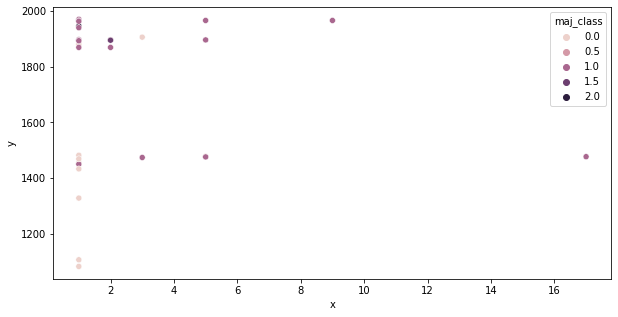

In [ ]:
x_arr=[]
y_arr=[]
for i in range(1,32):
  x=len(globals()['line3_{}_df'.format(i)])
  x_arr.append(x)
  y=len(globals()['non_null_cols3_{}'.format(i)])
  y_arr.append(y)
dfsss = pd.DataFrame({'x': x_arr, 'y': y_arr,'maj_class': maj_clss})
plt.figure(figsize=(10,5))
sns.scatterplot(x='x',y='y',hue='maj_class',data=dfsss)

In [ ]:
train_x = train_df[non_null_cols3_31]
test_x=test_df[non_null_cols3_31]
train_x

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_132,X_133,X_134,X_135,...,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,month
0,1,0.533433,T050304,A_31,7813.0,7813.0,0.19,0.20,0.19,0.2,...,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,NaN,6
1,2,0.541819,T050307,A_31,NaN,NaN,0.20,0.21,0.20,0.2,...,383.0,367.735849,353.0,38.89,42.82,43.92,35.34,72.55,NaN,6
2,1,0.531267,T050304,A_31,7815.0,7815.0,0.19,0.20,0.19,0.2,...,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35,NaN,6
3,2,0.537325,T050307,A_31,NaN,NaN,0.20,0.21,0.20,0.2,...,384.0,369.188679,353.0,37.74,39.17,52.17,30.58,71.78,NaN,6
4,1,0.531590,T050304,A_31,7817.0,7817.0,0.19,0.20,0.18,0.2,...,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,0.526546,T100306,T_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
594,0,0.524022,T050304,A_31,14810.0,14810.0,0.19,0.20,0.19,0.2,...,384.0,369.811321,353.0,49.47,53.07,50.89,55.10,66.49,1.0,9
595,0,0.521289,T050304,A_31,14813.0,14813.0,0.19,0.20,0.19,0.2,...,383.0,367.018868,352.0,NaN,NaN,NaN,NaN,NaN,1.0,9
596,1,0.531375,T100304,O_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [ ]:
train_x3 = train_x[train_x['LINE']=='T050304']
train_x3

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_132,X_133,X_134,X_135,...,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,month
0,1,0.533433,T050304,A_31,7813.0,7813.0,0.19,0.2,0.19,0.2,...,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,NaN,6
2,1,0.531267,T050304,A_31,7815.0,7815.0,0.19,0.2,0.19,0.2,...,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35,NaN,6
4,1,0.531590,T050304,A_31,7817.0,7817.0,0.19,0.2,0.18,0.2,...,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97,NaN,6
6,1,0.533665,T050304,A_31,7820.0,7820.0,0.19,0.2,0.19,0.2,...,384.0,368.425926,353.0,32.50,41.42,38.36,30.83,76.93,NaN,6
8,1,0.531821,T050304,A_31,7822.0,7822.0,0.19,0.2,0.19,0.2,...,393.0,373.500000,353.0,42.25,43.17,55.60,33.26,78.50,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0,0.523465,T050304,A_31,11864.0,11864.0,0.19,0.2,0.19,0.2,...,384.0,367.333333,352.0,NaN,NaN,NaN,NaN,NaN,1.0,9
582,0,0.522233,T050304,A_31,11898.0,11898.0,0.18,0.2,0.18,0.2,...,384.0,367.037037,352.0,50.88,53.23,52.44,56.28,66.83,1.0,9
583,0,0.522340,T050304,A_31,11920.0,11920.0,0.19,0.2,0.19,0.2,...,394.0,371.943396,353.0,51.71,59.64,54.61,57.05,63.18,1.0,9
594,0,0.524022,T050304,A_31,14810.0,14810.0,0.19,0.2,0.19,0.2,...,384.0,369.811321,353.0,49.47,53.07,50.89,55.10,66.49,1.0,9


In [ ]:
train_x3['month']

0      6
2      6
4      6
6      6
8      6
      ..
581    9
582    9
583    9
594    9
595    9
Name: month, Length: 78, dtype: int64

ValueError: ignored

In [ ]:
non_null_cols3_31

['Y_Class',
 'Y_Quality',
 'LINE',
 'PRODUCT_CODE',
 'X_128',
 'X_129',
 'X_132',
 'X_133',
 'X_134',
 'X_135',
 'X_136',
 'X_137',
 'X_138',
 'X_139',
 'X_140',
 'X_141',
 'X_142',
 'X_143',
 'X_144',
 'X_145',
 'X_146',
 'X_147',
 'X_148',
 'X_149',
 'X_150',
 'X_151',
 'X_152',
 'X_153',
 'X_154',
 'X_155',
 'X_156',
 'X_157',
 'X_158',
 'X_159',
 'X_160',
 'X_161',
 'X_162',
 'X_163',
 'X_164',
 'X_165',
 'X_166',
 'X_167',
 'X_168',
 'X_169',
 'X_170',
 'X_171',
 'X_172',
 'X_173',
 'X_174',
 'X_175',
 'X_176',
 'X_177',
 'X_178',
 'X_179',
 'X_180',
 'X_181',
 'X_182',
 'X_183',
 'X_184',
 'X_185',
 'X_186',
 'X_187',
 'X_188',
 'X_189',
 'X_190',
 'X_191',
 'X_192',
 'X_193',
 'X_194',
 'X_195',
 'X_196',
 'X_197',
 'X_198',
 'X_199',
 'X_200',
 'X_201',
 'X_202',
 'X_203',
 'X_204',
 'X_205',
 'X_206',
 'X_207',
 'X_208',
 'X_209',
 'X_210',
 'X_211',
 'X_212',
 'X_213',
 'X_214',
 'X_215',
 'X_216',
 'X_217',
 'X_218',
 'X_219',
 'X_220',
 'X_221',
 'X_222',
 'X_223',
 'X_224'

In [ ]:
train_x3

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_132,X_133,X_134,X_135,...,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,month
0,1,0.533433,T050304,A_31,7813.0,7813.0,0.19,0.2,0.19,0.2,...,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,NaN,6
2,1,0.531267,T050304,A_31,7815.0,7815.0,0.19,0.2,0.19,0.2,...,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35,NaN,6
4,1,0.531590,T050304,A_31,7817.0,7817.0,0.19,0.2,0.18,0.2,...,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97,NaN,6
6,1,0.533665,T050304,A_31,7820.0,7820.0,0.19,0.2,0.19,0.2,...,384.0,368.425926,353.0,32.50,41.42,38.36,30.83,76.93,NaN,6
8,1,0.531821,T050304,A_31,7822.0,7822.0,0.19,0.2,0.19,0.2,...,393.0,373.500000,353.0,42.25,43.17,55.60,33.26,78.50,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0,0.523465,T050304,A_31,11864.0,11864.0,0.19,0.2,0.19,0.2,...,384.0,367.333333,352.0,NaN,NaN,NaN,NaN,NaN,1.0,9
582,0,0.522233,T050304,A_31,11898.0,11898.0,0.18,0.2,0.18,0.2,...,384.0,367.037037,352.0,50.88,53.23,52.44,56.28,66.83,1.0,9
583,0,0.522340,T050304,A_31,11920.0,11920.0,0.19,0.2,0.19,0.2,...,394.0,371.943396,353.0,51.71,59.64,54.61,57.05,63.18,1.0,9
594,0,0.524022,T050304,A_31,14810.0,14810.0,0.19,0.2,0.19,0.2,...,384.0,369.811321,353.0,49.47,53.07,50.89,55.10,66.49,1.0,9


In [ ]:
mode_list=[]
for c in train_x3.columns[5:]:
  mode_list.append(train_x3[c].median())

for i,c in enumerate(train_x3.columns[5:]):
  train_x3[c].fillna(mode_list[i],inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
x_train3, x_val3= train_test_split(train_x3[non_null_cols3_31], test_size=0.2,random_state=37,stratify=train_x3['Y_Class'])
x_val3

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_132,X_133,X_134,X_135,...,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,month
360,0,0.524606,T050304,A_31,24728.0,24728.0,0.20,0.20,0.20,0.2,...,384.0,369.698113,353.0,48.40,60.71,53.14,49.39,62.83,1.0,8
14,1,0.531254,T050304,A_31,7830.0,7830.0,0.19,0.20,0.19,0.2,...,394.0,372.830189,352.0,40.42,38.33,40.14,30.72,76.52,1.0,6
478,0,0.520252,T050304,A_31,5539.0,5539.0,0.19,0.20,0.19,0.2,...,384.0,367.407407,354.0,54.66,54.44,42.39,56.79,64.93,1.0,8
6,1,0.533665,T050304,A_31,7820.0,7820.0,0.19,0.20,0.19,0.2,...,384.0,368.425926,353.0,32.50,41.42,38.36,30.83,76.93,1.0,6
320,1,0.526868,T050304,A_31,22322.0,22322.0,0.20,0.21,0.20,0.2,...,383.0,366.481481,352.0,55.91,56.14,40.27,56.86,61.74,1.0,7
21,2,0.544129,T050304,A_31,8949.0,8949.0,0.19,0.20,0.18,0.2,...,384.0,368.407407,352.0,53.81,56.14,51.33,56.21,65.14,1.0,6
557,2,0.559463,T050304,A_31,851.0,851.0,0.19,0.20,0.19,0.2,...,393.0,376.698113,362.0,50.87,57.13,53.07,56.21,67.22,1.0,8
574,1,0.529416,T050304,A_31,9423.0,9423.0,0.19,0.20,0.19,0.2,...,384.0,369.433962,352.0,52.19,60.88,52.97,45.46,62.83,1.0,9
367,0,0.525046,T050304,A_31,25105.0,25105.0,0.20,0.21,0.20,0.2,...,384.0,368.849057,353.0,52.39,57.23,36.81,51.47,65.14,1.0,8
368,1,0.528186,T050304,A_31,25153.0,25153.0,0.20,0.21,0.20,0.2,...,384.0,360.358491,342.0,50.23,59.32,40.60,53.06,65.26,1.0,8


In [ ]:
x_val3['Y_Quality']

360    0.524606
14     0.531254
478    0.520252
6      0.533665
320    0.526868
21     0.544129
557    0.559463
574    0.529416
367    0.525046
368    0.528186
540    0.513751
573    0.526948
337    0.530900
111    0.518960
361    0.517494
97     0.531679
Name: Y_Quality, dtype: float64

In [ ]:
x_train3, x_val3= train_test_split(x_train3, test_size=0.2,random_state=37)
yy_train3 = x_train3['Y_Class']
y_train3 = x_train3['Y_Quality']
x_train3 = x_train3.drop(columns=['Y_Quality','Y_Class'])

yy_val3 = x_val3['Y_Class']
y_val3 = x_val3['Y_Quality']
x_val3 = x_val3.drop(columns=['Y_Quality','Y_Class'])

In [ ]:
x_train3

,LINE,PRODUCT_CODE,X_128,X_129,X_132,X_133,X_134,X_135,X_136,X_137,...,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,month
433,T050304,A_31,2095.0,2095.0,0.19,0.21,0.19,0.2,61.0,62.0,...,384.0,368.333333,353.0,53.81,56.14,51.33,56.21,65.14,1.0,8
453,T050304,A_31,3538.0,3538.0,0.20,0.21,0.20,0.2,107.0,107.0,...,383.0,363.641509,342.0,49.79,53.00,53.74,50.09,62.77,1.0,8
304,T050304,A_31,21873.0,21873.0,0.19,0.21,0.19,0.2,705.0,705.0,...,384.0,368.407407,352.0,54.41,54.78,40.34,55.31,61.67,1.0,7
576,T050304,A_31,9467.0,9467.0,0.19,0.20,0.19,0.2,192.0,192.0,...,383.0,359.462963,342.0,55.74,56.61,40.51,57.22,62.05,1.0,9
20,T050304,A_31,7837.0,7837.0,0.19,0.20,0.19,0.2,228.0,228.0,...,384.0,367.851852,352.0,53.81,56.14,51.33,56.21,65.14,1.0,6
132,T050304,A_31,5595.0,5595.0,0.20,0.21,0.20,0.2,200.0,200.0,...,384.0,367.000000,352.0,53.81,56.14,51.33,56.21,65.14,1.0,7
250,T050304,A_31,16669.0,16669.0,0.20,0.21,0.20,0.2,550.0,550.0,...,373.0,358.490566,343.0,53.81,56.14,51.33,56.21,65.14,1.0,7
303,T050304,A_31,21863.0,21863.0,0.20,0.21,0.20,0.2,705.0,705.0,...,384.0,367.886793,354.0,58.07,55.23,51.33,56.78,63.48,1.0,7
357,T050304,A_31,24448.0,24448.0,0.19,0.21,0.19,0.2,811.0,811.0,...,384.0,367.555556,352.0,54.53,59.33,50.85,55.33,65.87,1.0,8
255,T050304,A_31,17441.0,17441.0,0.20,0.21,0.20,0.2,571.0,571.0,...,384.0,368.528302,352.0,60.24,56.16,54.52,56.42,66.85,1.0,7


In [ ]:
import catboost
clf3 = catboost.CatBoostRegressor(learning_rate=0.05, iterations=500, verbose=0)
clf3.fit(x_train3, y_train3, early_stopping_rounds=100, cat_features=['PRODUCT_CODE', 'LINE'])


In [ ]:
a = train_df[['Y_Class','Y_Quality']].groupby('Y_Class').agg(['mean', 'min', 'max', 'count'])
a

Y_Quality                          
             mean       min       max count
Y_Class                                    
0        0.520837  0.500856  0.525067    88
1        0.530253  0.525086  0.534843   407
2        0.542031  0.534951  0.578841   103

In [ ]:
from sklearn.metrics import f1_score

pre_preds = clf3.predict(x_val3)
print(clf3.score(x_val3,y_val3))

preds=[]
for p in pre_preds:
  if p<=a[('Y_Quality','max')][0]:
    preds.append(0)
  elif p<=a[('Y_Quality','min')][2]:
    preds.append(1)
  else:
    preds.append(2)
print(f1_score(yy_val3, preds, average='macro' ))

0.3417190717968107
0.3904761904761904


In [ ]:
non_null_cols3_1

['Y_Class',
 'Y_Quality',
 'LINE',
 'PRODUCT_CODE',
 'X_128',
 'X_129',
 'X_132',
 'X_133',
 'X_134',
 'X_135',
 'X_136',
 'X_137',
 'X_138',
 'X_139',
 'X_140',
 'X_141',
 'X_142',
 'X_143',
 'X_144',
 'X_145',
 'X_146',
 'X_147',
 'X_148',
 'X_149',
 'X_150',
 'X_151',
 'X_152',
 'X_153',
 'X_154',
 'X_155',
 'X_156',
 'X_157',
 'X_158',
 'X_159',
 'X_160',
 'X_161',
 'X_162',
 'X_163',
 'X_164',
 'X_165',
 'X_166',
 'X_167',
 'X_168',
 'X_169',
 'X_170',
 'X_171',
 'X_172',
 'X_173',
 'X_174',
 'X_175',
 'X_176',
 'X_177',
 'X_178',
 'X_179',
 'X_180',
 'X_181',
 'X_182',
 'X_183',
 'X_184',
 'X_185',
 'X_186',
 'X_187',
 'X_188',
 'X_189',
 'X_190',
 'X_191',
 'X_192',
 'X_193',
 'X_194',
 'X_195',
 'X_196',
 'X_197',
 'X_198',
 'X_199',
 'X_200',
 'X_201',
 'X_202',
 'X_203',
 'X_204',
 'X_205',
 'X_206',
 'X_207',
 'X_208',
 'X_209',
 'X_210',
 'X_211',
 'X_212',
 'X_213',
 'X_214',
 'X_215',
 'X_216',
 'X_217',
 'X_218',
 'X_219',
 'X_220',
 'X_221',
 'X_222',
 'X_223',
 'X_224'

In [ ]:
train_x

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_132,X_133,X_134,X_135,...,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,month
0,1,0.533433,T050304,A_31,7813.0,7813.0,0.19,0.20,0.19,0.2,...,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,NaN,6
1,2,0.541819,T050307,A_31,NaN,NaN,0.20,0.21,0.20,0.2,...,383.0,367.735849,353.0,38.89,42.82,43.92,35.34,72.55,NaN,6
2,1,0.531267,T050304,A_31,7815.0,7815.0,0.19,0.20,0.19,0.2,...,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35,NaN,6
3,2,0.537325,T050307,A_31,NaN,NaN,0.20,0.21,0.20,0.2,...,384.0,369.188679,353.0,37.74,39.17,52.17,30.58,71.78,NaN,6
4,1,0.531590,T050304,A_31,7817.0,7817.0,0.19,0.20,0.18,0.2,...,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,0.526546,T100306,T_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
594,0,0.524022,T050304,A_31,14810.0,14810.0,0.19,0.20,0.19,0.2,...,384.0,369.811321,353.0,49.47,53.07,50.89,55.10,66.49,1.0,9
595,0,0.521289,T050304,A_31,14813.0,14813.0,0.19,0.20,0.19,0.2,...,383.0,367.018868,352.0,NaN,NaN,NaN,NaN,NaN,1.0,9
596,1,0.531375,T100304,O_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [ ]:
from sklearn.model_selection import train_test_split
import catboost
from sklearn.metrics import f1_score
f1score_list=[]
for k in range(1,32):
  colss = globals()['non_null_cols3_{}'.format(k)]
  train_x = train_df[colss]
  train_x3= train_x[train_x['LINE']=='T050304']#3번라인만 뽑기
  #결측대체
  mode_list=[]
  for c in train_x3.columns[4:]:
    mode_list.append(train_x3[c].median())
  for i,c in enumerate(train_x3.columns[4:]):
    train_x3[c].fillna(mode_list[i],inplace=True)
  #validation split
  x_train3, x_val3= train_test_split(train_x3[globals()['non_null_cols3_{}'.format(k)]], test_size=0.2,random_state=37,stratify=train_x3['Y_Class'])
  x_train3, x_val3= train_test_split(x_train3, test_size=0.2,random_state=37)
  yy_train3 = x_train3['Y_Class']
  y_train3 = x_train3['Y_Quality']
  x_train3 = x_train3.drop(columns=['Y_Quality','Y_Class'])
  yy_val3 = x_val3['Y_Class']
  y_val3 = x_val3['Y_Quality']
  x_val3 = x_val3.drop(columns=['Y_Quality','Y_Class'])
  #fit
  clf3 = catboost.CatBoostRegressor(learning_rate=0.05, iterations=500, verbose=0)
  clf3.fit(x_train3, y_train3, early_stopping_rounds=100, cat_features=['PRODUCT_CODE', 'LINE'])
  #threshold
  a = train_df[['Y_Class','Y_Quality']].groupby('Y_Class').agg(['mean', 'min', 'max', 'count'])
  #f1scoring
  pre_preds = clf3.predict(x_val3)
  preds=[]
  for p in pre_preds:
    if p<=a[('Y_Quality','max')][0]:
      preds.append(0)
    elif p<=a[('Y_Quality','min')][2]:
      preds.append(1)
    else:
      preds.append(2)

  f1score_list.append(f1_score(yy_val3, preds, average='macro'))


f1score_list




[0.3259259259259259,
 0.4444444444444444,
 0.3904761904761904,
 0.375,
 0.3904761904761904,
 0.3904761904761904,
 0.4444444444444444,
 0.4444444444444444,
 0.3904761904761904,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.3904761904761904,
 0.4444444444444444,
 0.3904761904761904,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.4444444444444444,
 0.3904761904761904]

In [ ]:
colsss= list(set(non_null_cols3_1).intersection(non_null_cols3_2).intersection(non_null_cols3_3).intersection(non_null_cols3_4).intersection(non_null_cols3_5).intersection(non_null_cols3_6).intersection(non_null_cols3_7).intersection(non_null_cols3_8).intersection(non_null_cols3_9).intersection(non_null_cols3_10).intersection(non_null_cols3_11).intersection(non_null_cols3_12).intersection(non_null_cols3_13).intersection(non_null_cols3_14).intersection(non_null_cols3_15).intersection(non_null_cols3_16).intersection(non_null_cols3_17).intersection(non_null_cols3_18).intersection(non_null_cols3_19).intersection(non_null_cols3_20).intersection(non_null_cols3_21).intersection(non_null_cols3_22).intersection(non_null_cols3_23).intersection(non_null_cols3_24).intersection(non_null_cols3_25).intersection(non_null_cols3_26).intersection(non_null_cols3_27).intersection(non_null_cols3_28).intersection(non_null_cols3_29).intersection(non_null_cols3_30).intersection(non_null_cols3_31))
colsss

['X_1102',
 'X_2713',
 'X_1144',
 'X_2834',
 'X_1824',
 'X_1552',
 'X_1776',
 'X_1109',
 'X_1784',
 'X_168',
 'X_1116',
 'X_1783',
 'X_1786',
 'X_223',
 'X_1716',
 'X_1841',
 'X_2744',
 'X_2487',
 'X_166',
 'X_1881',
 'X_2428',
 'X_1932',
 'X_1484',
 'X_154',
 'X_1505',
 'X_2865',
 'X_230',
 'X_2741',
 'X_1119',
 'X_1135',
 'X_1082',
 'X_1945',
 'X_1322',
 'X_1327',
 'X_2709',
 'X_217',
 'X_1768',
 'X_1097',
 'X_1864',
 'X_2447',
 'X_2442',
 'X_2793',
 'X_1925',
 'X_2492',
 'X_2757',
 'X_240',
 'X_1478',
 'X_2493',
 'X_2809',
 'X_2413',
 'X_242',
 'X_1509',
 'X_1773',
 'X_2828',
 'X_1721',
 'X_1193',
 'X_1328',
 'X_172',
 'X_1497',
 'X_2772',
 'X_1215',
 'X_2502',
 'X_184',
 'X_1850',
 'X_2706',
 'X_1928',
 'X_1805',
 'X_244',
 'X_1771',
 'X_2410',
 'X_185',
 'X_1516',
 'X_1918',
 'X_2824',
 'X_1528',
 'X_1090',
 'X_128',
 'X_243',
 'X_1930',
 'X_1506',
 'X_1869',
 'X_1781',
 'X_229',
 'X_1729',
 'X_1208',
 'X_1742',
 'X_147',
 'X_1125',
 'X_1546',
 'X_2503',
 'X_2478',
 'X_170',
 'Y_Q

In [ ]:
non_null_cols3_2

['Y_Class',
 'Y_Quality',
 'LINE',
 'PRODUCT_CODE',
 'X_128',
 'X_129',
 'X_132',
 'X_133',
 'X_134',
 'X_135',
 'X_136',
 'X_137',
 'X_138',
 'X_139',
 'X_140',
 'X_141',
 'X_142',
 'X_143',
 'X_144',
 'X_145',
 'X_146',
 'X_147',
 'X_148',
 'X_149',
 'X_150',
 'X_151',
 'X_152',
 'X_153',
 'X_154',
 'X_155',
 'X_156',
 'X_157',
 'X_158',
 'X_159',
 'X_160',
 'X_161',
 'X_162',
 'X_163',
 'X_164',
 'X_165',
 'X_166',
 'X_167',
 'X_168',
 'X_169',
 'X_170',
 'X_171',
 'X_172',
 'X_173',
 'X_174',
 'X_175',
 'X_176',
 'X_177',
 'X_178',
 'X_179',
 'X_180',
 'X_181',
 'X_182',
 'X_183',
 'X_184',
 'X_185',
 'X_186',
 'X_187',
 'X_188',
 'X_189',
 'X_190',
 'X_191',
 'X_192',
 'X_193',
 'X_194',
 'X_195',
 'X_196',
 'X_197',
 'X_198',
 'X_199',
 'X_200',
 'X_201',
 'X_202',
 'X_203',
 'X_204',
 'X_205',
 'X_206',
 'X_207',
 'X_208',
 'X_209',
 'X_210',
 'X_211',
 'X_212',
 'X_213',
 'X_214',
 'X_215',
 'X_216',
 'X_217',
 'X_218',
 'X_219',
 'X_220',
 'X_221',
 'X_222',
 'X_223',
 'X_224'

In [ ]:
train_df

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,...,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875,month
0,TRAIN_000,1,0.533433,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN,6
1,TRAIN_001,2,0.541819,T050307,A_31,NaN,NaN,NaN,NaN,NaN,...,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN,6
2,TRAIN_002,1,0.531267,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN,6
3,TRAIN_003,2,0.537325,T050307,A_31,NaN,NaN,NaN,NaN,NaN,...,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN,6
4,TRAIN_004,1,0.531590,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,T100306,T_31,2.0,95.0,0.0,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
594,TRAIN_594,0,0.524022,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN,9
595,TRAIN_595,0,0.521289,T050304,A_31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,9
596,TRAIN_596,1,0.531375,T100304,O_31,40.0,94.0,0.0,45.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [ ]:
train_x['LINE']

0      T050304
1      T050307
2      T050304
3      T050307
4      T050304
        ...   
593    T100306
594    T050304
595    T050304
596    T100304
597    T100306
Name: LINE, Length: 598, dtype: object

In [ ]:
train_x = train_df[non_null_cols3_2]
train_x3= train_x[train_x['LINE']=='T050304']
train_x3

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_128,X_129,X_132,X_133,X_134,X_135,...,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,month
0,1,0.533433,T050304,A_31,7813.0,7813.0,0.19,0.2,0.19,0.2,...,189.0,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,6
2,1,0.531267,T050304,A_31,7815.0,7815.0,0.19,0.2,0.19,0.2,...,165.5,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35,6
4,1,0.531590,T050304,A_31,7817.0,7817.0,0.19,0.2,0.18,0.2,...,182.6,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97,6
6,1,0.533665,T050304,A_31,7820.0,7820.0,0.19,0.2,0.19,0.2,...,176.9,384.0,368.425926,353.0,32.50,41.42,38.36,30.83,76.93,6
8,1,0.531821,T050304,A_31,7822.0,7822.0,0.19,0.2,0.19,0.2,...,173.8,393.0,373.500000,353.0,42.25,43.17,55.60,33.26,78.50,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0,0.523465,T050304,A_31,11864.0,11864.0,0.19,0.2,0.19,0.2,...,176.0,384.0,367.333333,352.0,NaN,NaN,NaN,NaN,NaN,9
582,0,0.522233,T050304,A_31,11898.0,11898.0,0.18,0.2,0.18,0.2,...,174.0,384.0,367.037037,352.0,50.88,53.23,52.44,56.28,66.83,9
583,0,0.522340,T050304,A_31,11920.0,11920.0,0.19,0.2,0.19,0.2,...,181.6,394.0,371.943396,353.0,51.71,59.64,54.61,57.05,63.18,9
594,0,0.524022,T050304,A_31,14810.0,14810.0,0.19,0.2,0.19,0.2,...,168.7,384.0,369.811321,353.0,49.47,53.07,50.89,55.10,66.49,9


In [ ]:
colsss

['X_1102',
 'X_2713',
 'X_1144',
 'X_2834',
 'X_1824',
 'X_1552',
 'X_1776',
 'X_1109',
 'X_1784',
 'X_168',
 'X_1116',
 'X_1783',
 'X_1786',
 'X_223',
 'X_1716',
 'X_1841',
 'X_2744',
 'X_2487',
 'X_166',
 'X_1881',
 'X_2428',
 'X_1932',
 'X_1484',
 'X_154',
 'X_1505',
 'X_2865',
 'X_230',
 'X_2741',
 'X_1119',
 'X_1135',
 'X_1082',
 'X_1945',
 'X_1322',
 'X_1327',
 'X_2709',
 'X_217',
 'X_1768',
 'X_1097',
 'X_1864',
 'X_2447',
 'X_2442',
 'X_2793',
 'X_1925',
 'X_2492',
 'X_2757',
 'X_240',
 'X_1478',
 'X_2493',
 'X_2809',
 'X_2413',
 'X_242',
 'X_1509',
 'X_1773',
 'X_2828',
 'X_1721',
 'X_1193',
 'X_1328',
 'X_172',
 'X_1497',
 'X_2772',
 'X_1215',
 'X_2502',
 'X_184',
 'X_1850',
 'X_2706',
 'X_1928',
 'X_1805',
 'X_244',
 'X_1771',
 'X_2410',
 'X_185',
 'X_1516',
 'X_1918',
 'X_2824',
 'X_1528',
 'X_1090',
 'X_128',
 'X_243',
 'X_1930',
 'X_1506',
 'X_1869',
 'X_1781',
 'X_229',
 'X_1729',
 'X_1208',
 'X_1742',
 'X_147',
 'X_1125',
 'X_1546',
 'X_2503',
 'X_2478',
 'X_170',
 'Y_Q

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_x = train_df[non_null_cols3_14]

train_x3= train_x[train_x['LINE']=='T050304']#3번라인만 뽑기
  #결측대체
mode_list=[]
for c in train_x3.columns[~train_x3.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]:
  mode_list.append(train_x3[c].median())
for i,c in enumerate(train_x3.columns[~train_x3.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]):
  train_x3[c].fillna(mode_list[i],inplace=True)
  #validation split
x_train3, x_val3= train_test_split(train_x3[colsss], test_size=0.2,random_state=37,stratify=train_x3['Y_Class'])
x_train3, x_val3= train_test_split(x_train3, test_size=0.2,random_state=37)
yy_train3 = x_train3['Y_Class']
y_train3 = x_train3['Y_Quality']
x_train3 = x_train3.drop(columns=['Y_Quality','Y_Class'])
yy_val3 = x_val3['Y_Class']
y_val3 = x_val3['Y_Quality']
x_val3 = x_val3.drop(columns=['Y_Quality','Y_Class'])
#fit
clf3 = catboost.CatBoostClassifier(learning_rate=0.05, iterations=500, verbose=0)
clf3.fit(x_train3, yy_train3, early_stopping_rounds=100, cat_features=['PRODUCT_CODE', 'LINE'])
#threshold
a = train_df[['Y_Class','Y_Quality']].groupby('Y_Class').agg(['mean', 'min', 'max', 'count'])
#f1scoring
pre_preds = clf3.predict(x_val3)
preds=[]
for p in pre_preds:
  if p<=a[('Y_Quality','max')][0]:
    preds.append(0)
  elif p<=a[('Y_Quality','min')][2]:
    preds.append(1)
  else:
    preds.append(2)

f1_score(yy_val3, pre_preds, average='macro')

0.4444444444444444

In [ ]:
train_x = train_df[colsss]


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier


rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
train_x3= train_x[train_x['LINE']=='T050304']#3번라인만 뽑기

#결측대체
mode_list=[]
for c in train_x3.columns[~train_x3.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]:
  mode_list.append(train_x3[c].median())
for i,c in enumerate(train_x3.columns[~train_x3.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]):
  train_x3[c].fillna(mode_list[i],inplace=True)

yy_train3 = train_x3['Y_Class']
train_x3 = train_x3.drop(columns=['Y_Class', 'Y_Quality','LINE','PRODUCT_CODE'])

f1_list = []
for fold, (train_index, val_index) in enumerate(tqdm(rskfold.split(train_x3, yy_train3))):
    x_trn, x_val, y_trn, y_val = train_x3.iloc[train_index], train_x3.iloc[val_index], yy_train3.iloc[train_index], yy_train3.iloc[val_index]

    xgb = XGBClassifier(verbose=0) # cpu -> thread_count=5
    xgb.fit(x_trn, y_trn, early_stopping_rounds=100, eval_set=[(x_trn, y_trn), (x_val, y_val)])
    f1_list.append(f1_score(y_val, xgb.predict(x_val), average='macro'))

print(f'{min(f1_list)} ~ {max(f1_list)}')
print('mean :', np.mean(f1_list))

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier


rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
train_x3= train_x[train_x['LINE']=='T050304']#3번라인만 뽑기

#결측대체
mode_list=[]
for c in train_x3.columns[~train_x3.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]:
  mode_list.append(train_x3[c].mode())
for i,c in enumerate(train_x3.columns[~train_x3.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]):
  train_x3[c].fillna(mode_list[i],inplace=True)

yy_train3 = train_x3['Y_Class']
train_x3 = train_x3.drop(columns=['Y_Class', 'Y_Quality','LINE','PRODUCT_CODE'])

f1_list = []
for fold, (train_index, val_index) in enumerate(tqdm(rskfold.split(train_x3, yy_train3))):
    x_trn, x_val, y_trn, y_val = train_x3.iloc[train_index], train_x3.iloc[val_index], yy_train3.iloc[train_index], yy_train3.iloc[val_index]

    xgb = XGBClassifier(verbose=0) # cpu -> thread_count=5
    xgb.fit(x_trn, y_trn, early_stopping_rounds=100, eval_set=[(x_trn, y_trn), (x_val, y_val)])
    f1_list.append(f1_score(y_val, xgb.predict(x_val), average='macro'))

print(f'{min(f1_list)} ~ {max(f1_list)}')
print('mean :', np.mean(f1_list))

0it [00:00, ?it/s]

[0]	validation_0-merror:0	validation_1-merror:0.5
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0	validation_1-merror:0.5625
[2]	validation_0-merror:0	validation_1-merror:0.5625
[3]	validation_0-merror:0	validation_1-merror:0.5625
[4]	validation_0-merror:0	validation_1-merror:0.5
[5]	validation_0-merror:0	validation_1-merror:0.5
[6]	validation_0-merror:0	validation_1-merror:0.5
[7]	validation_0-merror:0	validation_1-merror:0.5
[8]	validation_0-merror:0	validation_1-merror:0.4375
[9]	validation_0-merror:0	validation_1-merror:0.4375
[10]	validation_0-merror:0	validation_1-merror:0.4375
[11]	validation_0-merror:0	validation_1-merror:0.4375
[12]	validation_0-merror:0	validation_1-merror:0.4375
[13]	validation_0-merror:0	validation_1-merror:0.4375
[14]	validation_0-merror:0	validation_1-merror:0.4375
[15]	validation_0-merror:0	validation_1-merror:0.37

1it [00:02,  2.27s/it]

[0]	validation_0-merror:0.016129	validation_1-merror:0.3125
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0	validation_1-merror:0.375
[2]	validation_0-merror:0	validation_1-merror:0.375
[3]	validation_0-merror:0	validation_1-merror:0.375
[4]	validation_0-merror:0	validation_1-merror:0.375
[5]	validation_0-merror:0	validation_1-merror:0.375
[6]	validation_0-merror:0	validation_1-merror:0.375
[7]	validation_0-merror:0	validation_1-merror:0.3125
[8]	validation_0-merror:0	validation_1-merror:0.3125
[9]	validation_0-merror:0	validation_1-merror:0.3125
[10]	validation_0-merror:0	validation_1-merror:0.3125
[11]	validation_0-merror:0	validation_1-merror:0.25
[12]	validation_0-merror:0	validation_1-merror:0.25
[13]	validation_0-merror:0	validation_1-merror:0.25
[14]	validation_0-merror:0	validation_1-merror:0.25
[15]	validation_0-merror:0	validation_1-mer

2it [00:04,  2.51s/it]

[0]	validation_0-merror:0.032258	validation_1-merror:0.375
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0	validation_1-merror:0.25
[2]	validation_0-merror:0	validation_1-merror:0.25
[3]	validation_0-merror:0	validation_1-merror:0.25
[4]	validation_0-merror:0	validation_1-merror:0.25
[5]	validation_0-merror:0	validation_1-merror:0.25
[6]	validation_0-merror:0	validation_1-merror:0.25
[7]	validation_0-merror:0	validation_1-merror:0.25
[8]	validation_0-merror:0	validation_1-merror:0.25
[9]	validation_0-merror:0	validation_1-merror:0.1875
[10]	validation_0-merror:0	validation_1-merror:0.25
[11]	validation_0-merror:0	validation_1-merror:0.1875
[12]	validation_0-merror:0	validation_1-merror:0.1875
[13]	validation_0-merror:0	validation_1-merror:0.1875
[14]	validation_0-merror:0	validation_1-merror:0.1875
[15]	validation_0-merror:0	validation_1-merror:0

3it [00:07,  2.61s/it]

[0]	validation_0-merror:0.015873	validation_1-merror:0.333333
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.015873	validation_1-merror:0.333333
[2]	validation_0-merror:0.015873	validation_1-merror:0.333333
[3]	validation_0-merror:0.015873	validation_1-merror:0.333333
[4]	validation_0-merror:0.015873	validation_1-merror:0.333333
[5]	validation_0-merror:0.015873	validation_1-merror:0.333333
[6]	validation_0-merror:0	validation_1-merror:0.333333
[7]	validation_0-merror:0	validation_1-merror:0.333333
[8]	validation_0-merror:0	validation_1-merror:0.333333
[9]	validation_0-merror:0	validation_1-merror:0.333333
[10]	validation_0-merror:0	validation_1-merror:0.333333
[11]	validation_0-merror:0	validation_1-merror:0.266667
[12]	validation_0-merror:0	validation_1-merror:0.266667
[13]	validation_0-merror:0	validation_1-merror:0.266667
[14]	validation_0-me

4it [00:09,  2.18s/it]

[0]	validation_0-merror:0.031746	validation_1-merror:0.333333
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.015873	validation_1-merror:0.333333
[2]	validation_0-merror:0.015873	validation_1-merror:0.333333
[3]	validation_0-merror:0.015873	validation_1-merror:0.333333
[4]	validation_0-merror:0.015873	validation_1-merror:0.333333
[5]	validation_0-merror:0.015873	validation_1-merror:0.333333
[6]	validation_0-merror:0.015873	validation_1-merror:0.333333
[7]	validation_0-merror:0.015873	validation_1-merror:0.333333
[8]	validation_0-merror:0.015873	validation_1-merror:0.333333
[9]	validation_0-merror:0.015873	validation_1-merror:0.333333
[10]	validation_0-merror:0	validation_1-merror:0.333333
[11]	validation_0-merror:0	validation_1-merror:0.333333
[12]	validation_0-merror:0	validation_1-merror:0.333333
[13]	validation_0-merror:0	validation_1-merror:0

5it [00:11,  2.07s/it]

[0]	validation_0-merror:0.032258	validation_1-merror:0.4375
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0	validation_1-merror:0.5
[2]	validation_0-merror:0.016129	validation_1-merror:0.5
[3]	validation_0-merror:0	validation_1-merror:0.5
[4]	validation_0-merror:0	validation_1-merror:0.5
[5]	validation_0-merror:0	validation_1-merror:0.5
[6]	validation_0-merror:0	validation_1-merror:0.5
[7]	validation_0-merror:0	validation_1-merror:0.5
[8]	validation_0-merror:0	validation_1-merror:0.5
[9]	validation_0-merror:0	validation_1-merror:0.5
[10]	validation_0-merror:0	validation_1-merror:0.5
[11]	validation_0-merror:0	validation_1-merror:0.5
[12]	validation_0-merror:0	validation_1-merror:0.5
[13]	validation_0-merror:0	validation_1-merror:0.5
[14]	validation_0-merror:0	validation_1-merror:0.5
[15]	validation_0-merror:0	validation_1-merror:0.5
[16]	validati

6it [00:13,  2.05s/it]

[0]	validation_0-merror:0	validation_1-merror:0.4375
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.016129	validation_1-merror:0.4375
[2]	validation_0-merror:0	validation_1-merror:0.375
[3]	validation_0-merror:0	validation_1-merror:0.375
[4]	validation_0-merror:0	validation_1-merror:0.375
[5]	validation_0-merror:0	validation_1-merror:0.375
[6]	validation_0-merror:0	validation_1-merror:0.375
[7]	validation_0-merror:0	validation_1-merror:0.3125
[8]	validation_0-merror:0	validation_1-merror:0.3125
[9]	validation_0-merror:0	validation_1-merror:0.375
[10]	validation_0-merror:0	validation_1-merror:0.3125
[11]	validation_0-merror:0	validation_1-merror:0.375
[12]	validation_0-merror:0	validation_1-merror:0.375
[13]	validation_0-merror:0	validation_1-merror:0.375
[14]	validation_0-merror:0	validation_1-merror:0.375
[15]	validation_0-merror:0	validation_1

7it [00:15,  2.05s/it]

[0]	validation_0-merror:0.032258	validation_1-merror:0.625
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.032258	validation_1-merror:0.375
[2]	validation_0-merror:0.032258	validation_1-merror:0.375
[3]	validation_0-merror:0.016129	validation_1-merror:0.4375
[4]	validation_0-merror:0.016129	validation_1-merror:0.4375
[5]	validation_0-merror:0.016129	validation_1-merror:0.4375
[6]	validation_0-merror:0.016129	validation_1-merror:0.4375
[7]	validation_0-merror:0.016129	validation_1-merror:0.4375
[8]	validation_0-merror:0	validation_1-merror:0.375
[9]	validation_0-merror:0	validation_1-merror:0.375
[10]	validation_0-merror:0	validation_1-merror:0.375
[11]	validation_0-merror:0	validation_1-merror:0.375
[12]	validation_0-merror:0	validation_1-merror:0.375
[13]	validation_0-merror:0	validation_1-merror:0.375
[14]	validation_0-merror:0	validation_1-mer

8it [00:16,  1.91s/it]

[0]	validation_0-merror:0.031746	validation_1-merror:0.4
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.015873	validation_1-merror:0.333333
[2]	validation_0-merror:0.015873	validation_1-merror:0.333333
[3]	validation_0-merror:0.015873	validation_1-merror:0.333333
[4]	validation_0-merror:0.015873	validation_1-merror:0.4
[5]	validation_0-merror:0.015873	validation_1-merror:0.4
[6]	validation_0-merror:0	validation_1-merror:0.333333
[7]	validation_0-merror:0	validation_1-merror:0.333333
[8]	validation_0-merror:0	validation_1-merror:0.333333
[9]	validation_0-merror:0	validation_1-merror:0.333333
[10]	validation_0-merror:0	validation_1-merror:0.333333
[11]	validation_0-merror:0	validation_1-merror:0.333333
[12]	validation_0-merror:0	validation_1-merror:0.333333
[13]	validation_0-merror:0	validation_1-merror:0.333333
[14]	validation_0-merror:0	validati

9it [00:19,  2.24s/it]

[0]	validation_0-merror:0.063492	validation_1-merror:0.333333
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.063492	validation_1-merror:0.333333
[2]	validation_0-merror:0.063492	validation_1-merror:0.333333
[3]	validation_0-merror:0.063492	validation_1-merror:0.333333
[4]	validation_0-merror:0.047619	validation_1-merror:0.266667
[5]	validation_0-merror:0.047619	validation_1-merror:0.266667
[6]	validation_0-merror:0.047619	validation_1-merror:0.266667
[7]	validation_0-merror:0.015873	validation_1-merror:0.266667
[8]	validation_0-merror:0.015873	validation_1-merror:0.266667
[9]	validation_0-merror:0.015873	validation_1-merror:0.266667
[10]	validation_0-merror:0.015873	validation_1-merror:0.266667
[11]	validation_0-merror:0.015873	validation_1-merror:0.266667
[12]	validation_0-merror:0.015873	validation_1-merror:0.266667
[13]	validation_0-merror:0	

10it [00:22,  2.50s/it]

[0]	validation_0-merror:0	validation_1-merror:0.25
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0	validation_1-merror:0.375
[2]	validation_0-merror:0	validation_1-merror:0.375
[3]	validation_0-merror:0	validation_1-merror:0.3125
[4]	validation_0-merror:0	validation_1-merror:0.3125
[5]	validation_0-merror:0	validation_1-merror:0.3125
[6]	validation_0-merror:0	validation_1-merror:0.3125
[7]	validation_0-merror:0	validation_1-merror:0.375
[8]	validation_0-merror:0	validation_1-merror:0.375
[9]	validation_0-merror:0	validation_1-merror:0.375
[10]	validation_0-merror:0	validation_1-merror:0.375
[11]	validation_0-merror:0	validation_1-merror:0.375
[12]	validation_0-merror:0	validation_1-merror:0.375
[13]	validation_0-merror:0	validation_1-merror:0.375
[14]	validation_0-merror:0	validation_1-merror:0.375
[15]	validation_0-merror:0	validation_1-merror:0

11it [00:24,  2.31s/it]

[0]	validation_0-merror:0.016129	validation_1-merror:0.5
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.016129	validation_1-merror:0.5625
[2]	validation_0-merror:0.016129	validation_1-merror:0.5625
[3]	validation_0-merror:0.016129	validation_1-merror:0.5625
[4]	validation_0-merror:0.016129	validation_1-merror:0.5625
[5]	validation_0-merror:0.016129	validation_1-merror:0.5625
[6]	validation_0-merror:0.016129	validation_1-merror:0.5625
[7]	validation_0-merror:0.016129	validation_1-merror:0.5625
[8]	validation_0-merror:0.016129	validation_1-merror:0.5625
[9]	validation_0-merror:0.016129	validation_1-merror:0.5625
[10]	validation_0-merror:0.016129	validation_1-merror:0.5625
[11]	validation_0-merror:0.016129	validation_1-merror:0.5
[12]	validation_0-merror:0	validation_1-merror:0.5625
[13]	validation_0-merror:0	validation_1-merror:0.5625
[14]	validat

12it [00:26,  2.16s/it]

[0]	validation_0-merror:0.048387	validation_1-merror:0.4375
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.016129	validation_1-merror:0.375
[2]	validation_0-merror:0.016129	validation_1-merror:0.3125
[3]	validation_0-merror:0.016129	validation_1-merror:0.3125
[4]	validation_0-merror:0.016129	validation_1-merror:0.3125
[5]	validation_0-merror:0	validation_1-merror:0.375
[6]	validation_0-merror:0	validation_1-merror:0.3125
[7]	validation_0-merror:0	validation_1-merror:0.375
[8]	validation_0-merror:0	validation_1-merror:0.375
[9]	validation_0-merror:0	validation_1-merror:0.3125
[10]	validation_0-merror:0	validation_1-merror:0.3125
[11]	validation_0-merror:0	validation_1-merror:0.3125
[12]	validation_0-merror:0	validation_1-merror:0.3125
[13]	validation_0-merror:0	validation_1-merror:0.3125
[14]	validation_0-merror:0	validation_1-merror:0.3125
[15]	

13it [00:28,  2.10s/it]

[0]	validation_0-merror:0.079365	validation_1-merror:0.2
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.015873	validation_1-merror:0.2
[2]	validation_0-merror:0.015873	validation_1-merror:0.2
[3]	validation_0-merror:0	validation_1-merror:0.2
[4]	validation_0-merror:0.015873	validation_1-merror:0.2
[5]	validation_0-merror:0	validation_1-merror:0.2
[6]	validation_0-merror:0	validation_1-merror:0.2
[7]	validation_0-merror:0	validation_1-merror:0.2
[8]	validation_0-merror:0	validation_1-merror:0.2
[9]	validation_0-merror:0	validation_1-merror:0.133333
[10]	validation_0-merror:0	validation_1-merror:0.133333
[11]	validation_0-merror:0	validation_1-merror:0.133333
[12]	validation_0-merror:0	validation_1-merror:0.133333
[13]	validation_0-merror:0	validation_1-merror:0.133333
[14]	validation_0-merror:0	validation_1-merror:0.133333
[15]	validation_0-merro

14it [00:30,  2.11s/it]

[0]	validation_0-merror:0.031746	validation_1-merror:0.266667
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.015873	validation_1-merror:0.333333
[2]	validation_0-merror:0.015873	validation_1-merror:0.266667
[3]	validation_0-merror:0.015873	validation_1-merror:0.333333
[4]	validation_0-merror:0.015873	validation_1-merror:0.266667
[5]	validation_0-merror:0.015873	validation_1-merror:0.266667
[6]	validation_0-merror:0	validation_1-merror:0.266667
[7]	validation_0-merror:0	validation_1-merror:0.266667
[8]	validation_0-merror:0	validation_1-merror:0.266667
[9]	validation_0-merror:0	validation_1-merror:0.266667
[10]	validation_0-merror:0	validation_1-merror:0.266667
[11]	validation_0-merror:0	validation_1-merror:0.266667
[12]	validation_0-merror:0	validation_1-merror:0.266667
[13]	validation_0-merror:0	validation_1-merror:0.266667
[14]	validation_0-me

15it [00:32,  2.16s/it]

0.3571428571428572 ~ 0.811111111111111
mean : 0.6352423166406655


#4번 T050307, 42개, A_31

In [ ]:
non_null_counts_4 = group_line4_df.notnull().sum()

# select only those columns with non-null values
non_null_cols_4 = non_null_counts_4[non_null_counts_4 > 0].index.tolist()

# print the resulting list of non-null columns
print(non_null_cols_4)

['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_130', 'X_131', 'X_132', 'X_133', 'X_134', 'X_135', 'X_136', 'X_137', 'X_138', 'X_139', 'X_140', 'X_141', 'X_142', 'X_143', 'X_144', 'X_145', 'X_146', 'X_147', 'X_148', 'X_149', 'X_150', 'X_151', 'X_152', 'X_153', 'X_154', 'X_155', 'X_156', 'X_157', 'X_158', 'X_159', 'X_160', 'X_161', 'X_162', 'X_163', 'X_164', 'X_165', 'X_166', 'X_167', 'X_168', 'X_169', 'X_170', 'X_171', 'X_172', 'X_173', 'X_174', 'X_175', 'X_176', 'X_177', 'X_178', 'X_179', 'X_180', 'X_181', 'X_182', 'X_183', 'X_184', 'X_185', 'X_186', 'X_187', 'X_188', 'X_189', 'X_190', 'X_191', 'X_192', 'X_193', 'X_194', 'X_195', 'X_196', 'X_197', 'X_198', 'X_199', 'X_200', 'X_201', 'X_202', 'X_203', 'X_204', 'X_205', 'X_206', 'X_207', 'X_208', 'X_209', 'X_210', 'X_211', 'X_212', 'X_213', 'X_214', 'X_215', 'X_216', 'X_217', 'X_218', 'X_219', 'X_220', 'X_221', 'X_222', 'X_223', 'X_224', 'X_225', 'X_226', 'X_227', 'X_228', 'X_229', 'X_230', 'X_231', 'X_232', 'X_233', '

In [ ]:
len(non_null_cols_4)

1981

In [ ]:
len(list(set(non_null_cols_4).intersection(non_null_cols_3)))

1962

In [ ]:
group_line4_df.loc[:,non_null_cols_4]

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_130,X_131,X_132,X_133,X_134,...,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,month
1,TRAIN_001,2,0.541819,T050307,A_31,19854.0,19854.0,0.20,0.21,0.20,...,383.0,367.735849,353.0,38.89,42.82,43.92,35.34,72.55,NaN,6
3,TRAIN_003,2,0.537325,T050307,A_31,19856.0,19856.0,0.20,0.21,0.20,...,384.0,369.188679,353.0,37.74,39.17,52.17,30.58,71.78,NaN,6
5,TRAIN_005,2,0.537833,T050307,A_31,19859.0,19859.0,0.20,0.21,0.20,...,384.0,368.622641,352.0,38.16,51.25,56.01,37.41,71.37,NaN,6
7,TRAIN_007,2,0.540003,T050307,A_31,19861.0,19861.0,0.20,0.21,0.20,...,393.0,370.283019,353.0,39.00,35.95,59.51,30.49,72.77,NaN,6
9,TRAIN_009,2,0.538049,T050307,A_31,19864.0,19864.0,0.20,0.21,0.20,...,393.0,372.870370,353.0,34.40,35.88,50.36,38.45,71.42,NaN,6
11,TRAIN_011,2,0.539149,T050307,A_31,19866.0,19866.0,0.20,0.21,0.20,...,394.0,374.425926,352.0,39.16,35.49,52.27,31.45,72.46,NaN,6
13,TRAIN_013,2,0.538508,T050307,A_31,19869.0,19869.0,0.20,0.21,0.20,...,393.0,374.075472,354.0,40.42,34.33,41.98,40.34,72.77,NaN,6
15,TRAIN_015,2,0.539254,T050307,A_31,19871.0,19871.0,0.20,0.21,0.20,...,387.0,369.264151,353.0,38.03,44.53,41.54,37.20,72.46,NaN,6
17,TRAIN_017,2,0.538854,T050307,A_31,19874.0,19874.0,0.20,0.21,0.20,...,384.0,369.169811,353.0,33.16,33.26,55.97,35.17,71.40,NaN,6
19,TRAIN_019,2,0.539235,T050307,A_31,19876.0,19876.0,0.20,0.21,0.20,...,384.0,369.037736,353.0,NaN,NaN,NaN,NaN,NaN,NaN,6


In [ ]:
grouped4 = group_line4_df.groupby(group_line4_df.isnull().apply(tuple, axis=1))
cnt=0
for name, group in grouped4:
    cnt+=1
    globals()['line4_{}_df'.format(cnt)] = grouped4.get_group(name)

In [ ]:
cnt

18

In [ ]:
non_null_cols4_1 = line4_1_df.columns[line4_1_df.notnull().any()].tolist()

# print the resulting list of non-null columns
print(non_null_cols3_1)

['Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_128', 'X_129', 'X_132', 'X_133', 'X_134', 'X_135', 'X_136', 'X_137', 'X_138', 'X_139', 'X_140', 'X_141', 'X_142', 'X_143', 'X_144', 'X_145', 'X_146', 'X_147', 'X_148', 'X_149', 'X_150', 'X_151', 'X_152', 'X_153', 'X_154', 'X_155', 'X_156', 'X_157', 'X_158', 'X_159', 'X_160', 'X_161', 'X_162', 'X_163', 'X_164', 'X_165', 'X_166', 'X_167', 'X_168', 'X_169', 'X_170', 'X_171', 'X_172', 'X_173', 'X_174', 'X_175', 'X_176', 'X_177', 'X_178', 'X_179', 'X_180', 'X_181', 'X_182', 'X_183', 'X_184', 'X_185', 'X_186', 'X_187', 'X_188', 'X_189', 'X_190', 'X_191', 'X_192', 'X_193', 'X_194', 'X_195', 'X_196', 'X_197', 'X_198', 'X_199', 'X_200', 'X_201', 'X_202', 'X_203', 'X_204', 'X_205', 'X_206', 'X_207', 'X_208', 'X_209', 'X_210', 'X_211', 'X_212', 'X_213', 'X_214', 'X_215', 'X_216', 'X_217', 'X_218', 'X_219', 'X_220', 'X_221', 'X_222', 'X_223', 'X_224', 'X_225', 'X_226', 'X_227', 'X_228', 'X_229', 'X_230', 'X_231', 'X_232', 'X_233', 'X_234', 'X_235

In [ ]:
for i in range(1,19):
  globals()['non_null_cols4_{}'.format(i)] = globals()['line4_{}_df'.format(i)].columns[globals()['line4_{}_df'.format(i)].notnull().any()].tolist()
  del globals()['non_null_cols4_{}'.format(i)][globals()['non_null_cols4_{}'.format(i)].index('PRODUCT_ID')]

In [ ]:
non_null_cols4_1

In [ ]:
for i in range(1,19):
  print('{}번째 그룹의 비결측열개수는 : '.format(i),len(globals()['non_null_cols4_{}'.format(i)]))

1번째 그룹의 비결측열개수는 :  1979
2번째 그룹의 비결측열개수는 :  1954
3번째 그룹의 비결측열개수는 :  1953
4번째 그룹의 비결측열개수는 :  1979
5번째 그룹의 비결측열개수는 :  1953
6번째 그룹의 비결측열개수는 :  1979
7번째 그룹의 비결측열개수는 :  1910
8번째 그룹의 비결측열개수는 :  1488
9번째 그룹의 비결측열개수는 :  1884
10번째 그룹의 비결측열개수는 :  1487
11번째 그룹의 비결측열개수는 :  1883
12번째 그룹의 비결측열개수는 :  1461
13번째 그룹의 비결측열개수는 :  1909
14번째 그룹의 비결측열개수는 :  1908
15번째 그룹의 비결측열개수는 :  1486
16번째 그룹의 비결측열개수는 :  1460
17번째 그룹의 비결측열개수는 :  1485
18번째 그룹의 비결측열개수는 :  1458


In [ ]:
for i in range(1,19):
  print('{}번째 그룹의 데이터수는'.format(i), len(globals()['line4_{}_df'.format(i)]))

1번째 그룹의 데이터수는 9
2번째 그룹의 데이터수는 1
3번째 그룹의 데이터수는 1
4번째 그룹의 데이터수는 1
5번째 그룹의 데이터수는 1
6번째 그룹의 데이터수는 1
7번째 그룹의 데이터수는 4
8번째 그룹의 데이터수는 5
9번째 그룹의 데이터수는 1
10번째 그룹의 데이터수는 7
11번째 그룹의 데이터수는 1
12번째 그룹의 데이터수는 2
13번째 그룹의 데이터수는 2
14번째 그룹의 데이터수는 1
15번째 그룹의 데이터수는 1
16번째 그룹의 데이터수는 1
17번째 그룹의 데이터수는 2
18번째 그룹의 데이터수는 1


In [ ]:
cols3= list(set(non_null_cols3_1).intersection(non_null_cols3_2).intersection(non_null_cols3_3).intersection(non_null_cols3_4).intersection(non_null_cols3_5).intersection(non_null_cols3_6).intersection(non_null_cols3_7).intersection(non_null_cols3_8).intersection(non_null_cols3_9).intersection(non_null_cols3_10).intersection(non_null_cols3_11).intersection(non_null_cols3_12).intersection(non_null_cols3_13).intersection(non_null_cols3_14).intersection(non_null_cols3_15).intersection(non_null_cols3_16).intersection(non_null_cols3_17).intersection(non_null_cols3_18).intersection(non_null_cols3_19).intersection(non_null_cols3_20).intersection(non_null_cols3_21).intersection(non_null_cols3_22).intersection(non_null_cols3_23).intersection(non_null_cols3_24).intersection(non_null_cols3_25).intersection(non_null_cols3_26).intersection(non_null_cols3_27).intersection(non_null_cols3_28).intersection(non_null_cols3_29).intersection(non_null_cols3_30).intersection(non_null_cols3_31))
cols4= list(set(non_null_cols4_1).intersection(non_null_cols4_2).intersection(non_null_cols4_3).intersection(non_null_cols4_4).intersection(non_null_cols4_5).intersection(non_null_cols4_6).intersection(non_null_cols4_7).intersection(non_null_cols4_8).intersection(non_null_cols4_9).intersection(non_null_cols4_10).intersection(non_null_cols4_11).intersection(non_null_cols4_12).intersection(non_null_cols4_13).intersection(non_null_cols4_14).intersection(non_null_cols4_15).intersection(non_null_cols4_16).intersection(non_null_cols4_17).intersection(non_null_cols4_18))

In [ ]:
len(list(set(non_null_cols4_1).intersection(non_null_cols4_10)))

1486

In [ ]:
cols_34 = list(set(non_null_cols3_3).union(non_null_cols4_1))

In [ ]:
#가장 많이 가지고 있는 친구들을 각 그룹에서 뽑고, 그다음에 두 그룹간의 교집합
len(list(set(non_null_cols3_3).intersection(non_null_cols4_1)))

1960

In [ ]:
col_34 = list(set(non_null_cols3_3).intersection(non_null_cols4_1))

In [ ]:
train_x = train_df[col_34]
test_x=test_df[col_34]
train_x

,X_1102,X_1952,X_1664,X_1657,X_969,X_1588,X_2206,X_2834,X_1566,X_1824,...,X_1964,X_1690,X_2296,X_1247,X_197,X_2536,X_1207,X_1371,X_1564,X_2517
0,383.0,0.000023,12.900000,10.1,1.0,507.0,54.9,50.5,0.0,0.370735,...,0.000020,4.50,47.3,22.0,51.4,50.5,2.0,18.0,8.0,50.2
1,383.0,0.000016,12.928125,10.1,1.0,507.0,56.9,52.0,0.0,0.000000,...,0.000020,4.00,57.4,22.0,53.8,52.0,3.0,12.0,8.0,53.6
2,383.0,0.000019,13.003226,9.9,1.0,506.0,54.9,50.5,0.0,0.358298,...,0.000018,3.99,47.3,21.0,51.4,50.5,3.0,13.0,8.0,50.2
3,384.0,0.000016,13.168750,9.8,1.0,507.0,56.9,52.0,0.0,0.000000,...,0.000020,3.49,57.4,22.0,53.8,52.0,3.0,14.0,0.0,53.6
4,383.0,0.000018,12.806452,9.6,1.0,499.0,54.9,50.5,0.0,0.344788,...,0.000020,4.52,47.3,22.0,51.4,50.5,4.0,22.0,9.0,50.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,384.0,0.000015,15.277419,8.8,1.0,506.0,NaN,50.5,0.0,0.216576,...,0.000017,3.99,NaN,24.0,51.4,50.5,4.0,18.0,9.0,50.2
595,383.0,NaN,14.822581,9.0,1.0,507.0,NaN,50.5,0.0,0.227609,...,NaN,4.01,NaN,24.0,51.4,50.5,3.0,10.0,9.0,50.2
596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_x34 = train_x[train_x['LINE'].isin(['T050304','T050307'])]
train_x34

,X_1102,X_1952,X_1664,X_1657,X_969,X_1588,X_2206,X_2834,X_1566,X_1824,...,X_1964,X_1690,X_2296,X_1247,X_197,X_2536,X_1207,X_1371,X_1564,X_2517
0,383.0,0.000023,12.900000,10.1,1.0,507.0,54.9,50.5,0.0,0.370735,...,0.000020,4.50,47.3,22.0,51.4,50.5,2.0,18.0,8.0,50.2
1,383.0,0.000016,12.928125,10.1,1.0,507.0,56.9,52.0,0.0,0.000000,...,0.000020,4.00,57.4,22.0,53.8,52.0,3.0,12.0,8.0,53.6
2,383.0,0.000019,13.003226,9.9,1.0,506.0,54.9,50.5,0.0,0.358298,...,0.000018,3.99,47.3,21.0,51.4,50.5,3.0,13.0,8.0,50.2
3,384.0,0.000016,13.168750,9.8,1.0,507.0,56.9,52.0,0.0,0.000000,...,0.000020,3.49,57.4,22.0,53.8,52.0,3.0,14.0,0.0,53.6
4,383.0,0.000018,12.806452,9.6,1.0,499.0,54.9,50.5,0.0,0.344788,...,0.000020,4.52,47.3,22.0,51.4,50.5,4.0,22.0,9.0,50.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,384.0,NaN,NaN,NaN,NaN,NaN,NaN,50.5,NaN,0.197242,...,NaN,4.00,NaN,NaN,51.4,50.5,4.0,NaN,8.0,50.2
582,384.0,0.000016,14.387097,9.0,1.0,506.0,NaN,50.5,0.0,0.196818,...,0.000019,NaN,NaN,23.0,51.4,50.5,3.0,15.0,NaN,50.2
583,394.0,0.000016,NaN,NaN,NaN,NaN,NaN,50.5,NaN,0.161818,...,0.000017,4.01,NaN,NaN,51.4,50.5,3.0,NaN,8.0,50.2
594,384.0,0.000015,15.277419,8.8,1.0,506.0,NaN,50.5,0.0,0.216576,...,0.000017,3.99,NaN,24.0,51.4,50.5,4.0,18.0,9.0,50.2


In [ ]:
train_x34['month']

0      6
1      6
2      6
3      6
4      6
      ..
581    9
582    9
583    9
594    9
595    9
Name: month, Length: 120, dtype: int64

In [ ]:
cols_34

['X_1102',
 'X_1952',
 'X_1664',
 'X_1657',
 'X_969',
 'X_1069',
 'X_1977',
 'X_1588',
 'X_2206',
 'X_2065',
 'X_2834',
 'X_2245',
 'X_1566',
 'X_1824',
 'X_982',
 'X_1109',
 'X_1786',
 'X_1783',
 'X_2258',
 'X_1683',
 'X_1841',
 'X_998',
 'X_1170',
 'X_166',
 'X_1881',
 'X_2557',
 'X_1484',
 'X_154',
 'X_1505',
 'X_951',
 'X_230',
 'X_2213',
 'X_1135',
 'X_2270',
 'X_1559',
 'X_1638',
 'X_1082',
 'X_2543',
 'X_1945',
 'X_1322',
 'X_1327',
 'X_2617',
 'X_1768',
 'X_1658',
 'X_984',
 'X_1864',
 'X_2447',
 'X_2234',
 'X_2202',
 'X_1925',
 'X_2492',
 'X_2259',
 'X_2870',
 'X_2757',
 'X_1449',
 'X_2295',
 'X_1436',
 'X_1478',
 'X_1640',
 'X_2205',
 'X_1773',
 'X_1317',
 'X_2544',
 'X_2186',
 'X_2007',
 'X_2773',
 'X_1328',
 'X_1596',
 'X_2204',
 'X_2772',
 'X_172',
 'X_1497',
 'X_2582',
 'X_1215',
 'X_2502',
 'X_1850',
 'X_1928',
 'X_1805',
 'X_2545',
 'X_244',
 'X_1918',
 'X_1528',
 'X_2175',
 'X_2034',
 'X_1930',
 'X_2016',
 'X_2561',
 'X_1781',
 'X_2387',
 'X_1208',
 'X_2393',
 'X_1742'

In [ ]:
train_x34

,X_1102,X_1952,X_1664,X_1657,X_969,X_1588,X_2206,X_2834,X_1566,X_1824,...,X_1964,X_1690,X_2296,X_1247,X_197,X_2536,X_1207,X_1371,X_1564,X_2517
0,383.0,0.000023,12.900000,10.1,1.0,507.0,54.9,50.5,0.0,0.370735,...,0.000020,4.50,47.3,22.0,51.4,50.5,2.0,18.0,8.0,50.2
1,383.0,0.000016,12.928125,10.1,1.0,507.0,56.9,52.0,0.0,0.000000,...,0.000020,4.00,57.4,22.0,53.8,52.0,3.0,12.0,8.0,53.6
2,383.0,0.000019,13.003226,9.9,1.0,506.0,54.9,50.5,0.0,0.358298,...,0.000018,3.99,47.3,21.0,51.4,50.5,3.0,13.0,8.0,50.2
3,384.0,0.000016,13.168750,9.8,1.0,507.0,56.9,52.0,0.0,0.000000,...,0.000020,3.49,57.4,22.0,53.8,52.0,3.0,14.0,0.0,53.6
4,383.0,0.000018,12.806452,9.6,1.0,499.0,54.9,50.5,0.0,0.344788,...,0.000020,4.52,47.3,22.0,51.4,50.5,4.0,22.0,9.0,50.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,384.0,NaN,NaN,NaN,NaN,NaN,NaN,50.5,NaN,0.197242,...,NaN,4.00,NaN,NaN,51.4,50.5,4.0,NaN,8.0,50.2
582,384.0,0.000016,14.387097,9.0,1.0,506.0,NaN,50.5,0.0,0.196818,...,0.000019,NaN,NaN,23.0,51.4,50.5,3.0,15.0,NaN,50.2
583,394.0,0.000016,NaN,NaN,NaN,NaN,NaN,50.5,NaN,0.161818,...,0.000017,4.01,NaN,NaN,51.4,50.5,3.0,NaN,8.0,50.2
594,384.0,0.000015,15.277419,8.8,1.0,506.0,NaN,50.5,0.0,0.216576,...,0.000017,3.99,NaN,24.0,51.4,50.5,4.0,18.0,9.0,50.2


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier


rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
train_x34 = train_x[train_x['LINE'].isin(['T050304','T050307'])]

#결측대체
mode_list=[]
for c in train_x34.columns[~train_x34.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]:
  mode_list.append(train_x34[c].mode())
for i,c in enumerate(train_x34.columns[~train_x34.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]):
  train_x34[c].fillna(mode_list[i],inplace=True)

yy_train34 = train_x34['Y_Class']
train_x34 = train_x34.drop(columns=['Y_Class', 'Y_Quality','LINE','PRODUCT_CODE'])

f1_list = []
for fold, (train_index, val_index) in enumerate(tqdm(rskfold.split(train_x34, yy_train34))):
    x_trn, x_val, y_trn, y_val = train_x34.iloc[train_index], train_x34.iloc[val_index], yy_train34.iloc[train_index], yy_train34.iloc[val_index]

    xgb = XGBClassifier(verbose=0) # cpu -> thread_count=5
    xgb.fit(x_trn, y_trn, early_stopping_rounds=100, eval_set=[(x_trn, y_trn), (x_val, y_val)])
    f1_list.append(f1_score(y_val, xgb.predict(x_val), average='macro'))

print(f'{min(f1_list)} ~ {max(f1_list)}')
print('mean :', np.mean(f1_list))

0it [00:00, ?it/s]

[0]	validation_0-merror:0.0625	validation_1-merror:0.125
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.041667	validation_1-merror:0.125
[2]	validation_0-merror:0.03125	validation_1-merror:0.166667
[3]	validation_0-merror:0.03125	validation_1-merror:0.208333
[4]	validation_0-merror:0.03125	validation_1-merror:0.25
[5]	validation_0-merror:0	validation_1-merror:0.25
[6]	validation_0-merror:0	validation_1-merror:0.208333
[7]	validation_0-merror:0	validation_1-merror:0.208333
[8]	validation_0-merror:0	validation_1-merror:0.208333
[9]	validation_0-merror:0	validation_1-merror:0.208333
[10]	validation_0-merror:0	validation_1-merror:0.083333
[11]	validation_0-merror:0	validation_1-merror:0.125
[12]	validation_0-merror:0	validation_1-merror:0.125
[13]	validation_0-merror:0	validation_1-merror:0.125
[14]	validation_0-merror:0	validation_1-merror:0.166667

1it [00:07,  7.75s/it]

[0]	validation_0-merror:0.03125	validation_1-merror:0.375
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.020833	validation_1-merror:0.375
[2]	validation_0-merror:0.010417	validation_1-merror:0.291667
[3]	validation_0-merror:0	validation_1-merror:0.291667
[4]	validation_0-merror:0	validation_1-merror:0.291667
[5]	validation_0-merror:0	validation_1-merror:0.291667
[6]	validation_0-merror:0	validation_1-merror:0.291667
[7]	validation_0-merror:0	validation_1-merror:0.291667
[8]	validation_0-merror:0	validation_1-merror:0.291667
[9]	validation_0-merror:0	validation_1-merror:0.291667
[10]	validation_0-merror:0	validation_1-merror:0.25
[11]	validation_0-merror:0	validation_1-merror:0.25
[12]	validation_0-merror:0	validation_1-merror:0.25
[13]	validation_0-merror:0	validation_1-merror:0.25
[14]	validation_0-merror:0	validation_1-merror:0.25
[15]	validat

2it [00:11,  5.52s/it]

[0]	validation_0-merror:0.072917	validation_1-merror:0.333333
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.0625	validation_1-merror:0.333333
[2]	validation_0-merror:0.052083	validation_1-merror:0.375
[3]	validation_0-merror:0.041667	validation_1-merror:0.375
[4]	validation_0-merror:0.041667	validation_1-merror:0.333333
[5]	validation_0-merror:0.03125	validation_1-merror:0.416667
[6]	validation_0-merror:0.03125	validation_1-merror:0.416667
[7]	validation_0-merror:0.010417	validation_1-merror:0.375
[8]	validation_0-merror:0.010417	validation_1-merror:0.416667
[9]	validation_0-merror:0	validation_1-merror:0.416667
[10]	validation_0-merror:0	validation_1-merror:0.375
[11]	validation_0-merror:0	validation_1-merror:0.416667
[12]	validation_0-merror:0	validation_1-merror:0.375
[13]	validation_0-merror:0	validation_1-merror:0.375
[14]	validation_0-mer

3it [00:15,  4.85s/it]

[0]	validation_0-merror:0.083333	validation_1-merror:0.291667
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.0625	validation_1-merror:0.291667
[2]	validation_0-merror:0.052083	validation_1-merror:0.25
[3]	validation_0-merror:0.052083	validation_1-merror:0.291667
[4]	validation_0-merror:0.041667	validation_1-merror:0.291667
[5]	validation_0-merror:0.020833	validation_1-merror:0.291667
[6]	validation_0-merror:0.010417	validation_1-merror:0.25
[7]	validation_0-merror:0.010417	validation_1-merror:0.291667
[8]	validation_0-merror:0	validation_1-merror:0.25
[9]	validation_0-merror:0	validation_1-merror:0.291667
[10]	validation_0-merror:0	validation_1-merror:0.291667
[11]	validation_0-merror:0	validation_1-merror:0.291667
[12]	validation_0-merror:0	validation_1-merror:0.291667
[13]	validation_0-merror:0	validation_1-merror:0.291667
[14]	validation_0-me

4it [00:21,  5.03s/it]

[0]	validation_0-merror:0	validation_1-merror:0.291667
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.010417	validation_1-merror:0.333333
[2]	validation_0-merror:0.010417	validation_1-merror:0.333333
[3]	validation_0-merror:0.010417	validation_1-merror:0.375
[4]	validation_0-merror:0.010417	validation_1-merror:0.333333
[5]	validation_0-merror:0.010417	validation_1-merror:0.333333
[6]	validation_0-merror:0.010417	validation_1-merror:0.333333
[7]	validation_0-merror:0.010417	validation_1-merror:0.375
[8]	validation_0-merror:0.010417	validation_1-merror:0.375
[9]	validation_0-merror:0.010417	validation_1-merror:0.333333
[10]	validation_0-merror:0	validation_1-merror:0.333333
[11]	validation_0-merror:0	validation_1-merror:0.333333
[12]	validation_0-merror:0	validation_1-merror:0.291667
[13]	validation_0-merror:0	validation_1-merror:0.25
[14]	validat

5it [00:25,  4.76s/it]

[0]	validation_0-merror:0.052083	validation_1-merror:0.458333
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.03125	validation_1-merror:0.5
[2]	validation_0-merror:0.041667	validation_1-merror:0.416667
[3]	validation_0-merror:0.03125	validation_1-merror:0.5
[4]	validation_0-merror:0.020833	validation_1-merror:0.416667
[5]	validation_0-merror:0.010417	validation_1-merror:0.458333
[6]	validation_0-merror:0.010417	validation_1-merror:0.458333
[7]	validation_0-merror:0.010417	validation_1-merror:0.375
[8]	validation_0-merror:0.010417	validation_1-merror:0.375
[9]	validation_0-merror:0.010417	validation_1-merror:0.291667
[10]	validation_0-merror:0.010417	validation_1-merror:0.291667
[11]	validation_0-merror:0	validation_1-merror:0.333333
[12]	validation_0-merror:0	validation_1-merror:0.333333
[13]	validation_0-merror:0	validation_1-merror:0.375
[14]	v

6it [00:29,  4.52s/it]

[0]	validation_0-merror:0.03125	validation_1-merror:0.416667
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.03125	validation_1-merror:0.458333
[2]	validation_0-merror:0.03125	validation_1-merror:0.375
[3]	validation_0-merror:0.020833	validation_1-merror:0.458333
[4]	validation_0-merror:0.020833	validation_1-merror:0.458333
[5]	validation_0-merror:0.020833	validation_1-merror:0.416667
[6]	validation_0-merror:0.020833	validation_1-merror:0.375
[7]	validation_0-merror:0.010417	validation_1-merror:0.416667
[8]	validation_0-merror:0.010417	validation_1-merror:0.416667
[9]	validation_0-merror:0.010417	validation_1-merror:0.416667
[10]	validation_0-merror:0.010417	validation_1-merror:0.416667
[11]	validation_0-merror:0.010417	validation_1-merror:0.375
[12]	validation_0-merror:0.010417	validation_1-merror:0.375
[13]	validation_0-merror:0	validation_1-me

7it [00:34,  4.57s/it]

[0]	validation_0-merror:0.0625	validation_1-merror:0.375
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.041667	validation_1-merror:0.291667
[2]	validation_0-merror:0.052083	validation_1-merror:0.291667
[3]	validation_0-merror:0.03125	validation_1-merror:0.333333
[4]	validation_0-merror:0.03125	validation_1-merror:0.25
[5]	validation_0-merror:0.03125	validation_1-merror:0.25
[6]	validation_0-merror:0.010417	validation_1-merror:0.291667
[7]	validation_0-merror:0.010417	validation_1-merror:0.291667
[8]	validation_0-merror:0.010417	validation_1-merror:0.291667
[9]	validation_0-merror:0.010417	validation_1-merror:0.291667
[10]	validation_0-merror:0.010417	validation_1-merror:0.291667
[11]	validation_0-merror:0.010417	validation_1-merror:0.25
[12]	validation_0-merror:0.010417	validation_1-merror:0.25
[13]	validation_0-merror:0	validation_1-merror:0.25

8it [00:39,  4.71s/it]

[0]	validation_0-merror:0.072917	validation_1-merror:0.416667
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.0625	validation_1-merror:0.375
[2]	validation_0-merror:0.0625	validation_1-merror:0.375
[3]	validation_0-merror:0.041667	validation_1-merror:0.416667
[4]	validation_0-merror:0.03125	validation_1-merror:0.375
[5]	validation_0-merror:0.03125	validation_1-merror:0.416667
[6]	validation_0-merror:0.03125	validation_1-merror:0.416667
[7]	validation_0-merror:0.03125	validation_1-merror:0.416667
[8]	validation_0-merror:0.03125	validation_1-merror:0.416667
[9]	validation_0-merror:0.010417	validation_1-merror:0.416667
[10]	validation_0-merror:0.010417	validation_1-merror:0.416667
[11]	validation_0-merror:0.010417	validation_1-merror:0.416667
[12]	validation_0-merror:0	validation_1-merror:0.416667
[13]	validation_0-merror:0	validation_1-merror:0.375

9it [00:43,  4.52s/it]

[0]	validation_0-merror:0.072917	validation_1-merror:0.333333
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.0625	validation_1-merror:0.375
[2]	validation_0-merror:0.052083	validation_1-merror:0.416667
[3]	validation_0-merror:0.052083	validation_1-merror:0.416667
[4]	validation_0-merror:0.041667	validation_1-merror:0.375
[5]	validation_0-merror:0.03125	validation_1-merror:0.333333
[6]	validation_0-merror:0.020833	validation_1-merror:0.333333
[7]	validation_0-merror:0.020833	validation_1-merror:0.333333
[8]	validation_0-merror:0	validation_1-merror:0.333333
[9]	validation_0-merror:0	validation_1-merror:0.333333
[10]	validation_0-merror:0	validation_1-merror:0.333333
[11]	validation_0-merror:0	validation_1-merror:0.333333
[12]	validation_0-merror:0	validation_1-merror:0.333333
[13]	validation_0-merror:0	validation_1-merror:0.333333
[14]	validation

10it [00:47,  4.46s/it]

[0]	validation_0-merror:0.041667	validation_1-merror:0.291667
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.010417	validation_1-merror:0.166667
[2]	validation_0-merror:0.010417	validation_1-merror:0.125
[3]	validation_0-merror:0.010417	validation_1-merror:0.166667
[4]	validation_0-merror:0.020833	validation_1-merror:0.208333
[5]	validation_0-merror:0.020833	validation_1-merror:0.208333
[6]	validation_0-merror:0.020833	validation_1-merror:0.208333
[7]	validation_0-merror:0.010417	validation_1-merror:0.208333
[8]	validation_0-merror:0	validation_1-merror:0.208333
[9]	validation_0-merror:0	validation_1-merror:0.208333
[10]	validation_0-merror:0	validation_1-merror:0.208333
[11]	validation_0-merror:0	validation_1-merror:0.208333
[12]	validation_0-merror:0	validation_1-merror:0.208333
[13]	validation_0-merror:0	validation_1-merror:0.208333
[14]	vali

11it [00:53,  4.78s/it]

[0]	validation_0-merror:0.03125	validation_1-merror:0.458333
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.03125	validation_1-merror:0.375
[2]	validation_0-merror:0.020833	validation_1-merror:0.416667
[3]	validation_0-merror:0.020833	validation_1-merror:0.333333
[4]	validation_0-merror:0.020833	validation_1-merror:0.25
[5]	validation_0-merror:0.03125	validation_1-merror:0.25
[6]	validation_0-merror:0.03125	validation_1-merror:0.291667
[7]	validation_0-merror:0.010417	validation_1-merror:0.291667
[8]	validation_0-merror:0.010417	validation_1-merror:0.291667
[9]	validation_0-merror:0.010417	validation_1-merror:0.291667
[10]	validation_0-merror:0	validation_1-merror:0.291667
[11]	validation_0-merror:0	validation_1-merror:0.291667
[12]	validation_0-merror:0	validation_1-merror:0.291667
[13]	validation_0-merror:0	validation_1-merror:0.291667
[14]	va

12it [00:57,  4.57s/it]

[0]	validation_0-merror:0.010417	validation_1-merror:0.291667
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0	validation_1-merror:0.333333
[2]	validation_0-merror:0	validation_1-merror:0.291667
[3]	validation_0-merror:0	validation_1-merror:0.291667
[4]	validation_0-merror:0	validation_1-merror:0.291667
[5]	validation_0-merror:0	validation_1-merror:0.291667
[6]	validation_0-merror:0	validation_1-merror:0.333333
[7]	validation_0-merror:0	validation_1-merror:0.291667
[8]	validation_0-merror:0	validation_1-merror:0.333333
[9]	validation_0-merror:0	validation_1-merror:0.25
[10]	validation_0-merror:0	validation_1-merror:0.25
[11]	validation_0-merror:0	validation_1-merror:0.291667
[12]	validation_0-merror:0	validation_1-merror:0.333333
[13]	validation_0-merror:0	validation_1-merror:0.25
[14]	validation_0-merror:0	validation_1-merror:0.208333
[15]	valida

13it [01:01,  4.41s/it]

[0]	validation_0-merror:0.03125	validation_1-merror:0.458333
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.041667	validation_1-merror:0.416667
[2]	validation_0-merror:0.052083	validation_1-merror:0.416667
[3]	validation_0-merror:0.03125	validation_1-merror:0.416667
[4]	validation_0-merror:0.020833	validation_1-merror:0.416667
[5]	validation_0-merror:0.010417	validation_1-merror:0.416667
[6]	validation_0-merror:0.010417	validation_1-merror:0.375
[7]	validation_0-merror:0.010417	validation_1-merror:0.375
[8]	validation_0-merror:0	validation_1-merror:0.375
[9]	validation_0-merror:0	validation_1-merror:0.333333
[10]	validation_0-merror:0	validation_1-merror:0.333333
[11]	validation_0-merror:0	validation_1-merror:0.333333
[12]	validation_0-merror:0	validation_1-merror:0.333333
[13]	validation_0-merror:0	validation_1-merror:0.333333
[14]	validation_0

14it [01:06,  4.82s/it]

[0]	validation_0-merror:0.041667	validation_1-merror:0.25
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.03125	validation_1-merror:0.333333
[2]	validation_0-merror:0.020833	validation_1-merror:0.333333
[3]	validation_0-merror:0.020833	validation_1-merror:0.333333
[4]	validation_0-merror:0.010417	validation_1-merror:0.416667
[5]	validation_0-merror:0.010417	validation_1-merror:0.375
[6]	validation_0-merror:0	validation_1-merror:0.291667
[7]	validation_0-merror:0	validation_1-merror:0.291667
[8]	validation_0-merror:0	validation_1-merror:0.291667
[9]	validation_0-merror:0	validation_1-merror:0.333333
[10]	validation_0-merror:0	validation_1-merror:0.333333
[11]	validation_0-merror:0	validation_1-merror:0.333333
[12]	validation_0-merror:0	validation_1-merror:0.333333
[13]	validation_0-merror:0	validation_1-merror:0.291667
[14]	validation_0-merror:0	v

15it [01:10,  4.72s/it]

0.6563279857397505 ~ 0.9177140941846824
mean : 0.7842316562388801


#5번 T100304, 175개, T/O_31

In [ ]:
non_null_counts_5 = group_line5_df.notnull().sum()

# select only those columns with non-null values
non_null_cols_5 = non_null_counts_5[non_null_counts_5 > 0].index.tolist()

# print the resulting list of non-null columns
print(non_null_cols_5)

['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56', 'X_57', 'X_58', 'X_59', 'X_60', 'X_61', 'X_62', 'X_63', 'X_64', 'X_65', 'X_66', 'X_67', 'X_68', 'X_69', 'X_70', 'X_71', 'X_72', 'X_73', 'X_74', 'X_75', 'X_76', 'X_77', 'X_78', 'X_79', 'X_80', 'X_81', 'X_82', 'X_83', 'X_84', 'X_85', 'X_86', 'X_87', 'X_88', 'X_89', 'X_90', 'X_91', 'X_92', 'X_96', 'X_97', 'X_98', 'X_99', 'X_100', 'X_101', 'X_102', 'X_103', 'X_105', 'X_106', 'X_107', 'X_108', 'X_109', 'X_110', 'X_111', 'X_112', 'X_113', 'X_114', 'X_115', 'X_116', 'X_117', 'X_118', 'X_119', 'X_120'

In [ ]:
train_df = pd.read_csv('./drive/MyDrive/open/train.csv')
train_df['month'] = pd.to_datetime(train_df['TIMESTAMP']).dt.strftime('%m')
train_df=train_df.drop(columns=['TIMESTAMP'])
train_df['month']=train_df['month'].astype(int)


In [ ]:
train_df['month'].dtype

dtype('int64')

In [ ]:
len(non_null_cols_5)

677

In [ ]:
group_line5_df.loc[:,non_null_cols_5]

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,...,X_925,X_926,X_927,X_928,X_929,X_930,X_931,X_932,X_933,month
22,TRAIN_022,0,0.517719,T100304,T_31,2.0,102.0,0.0,45.0,11.0,...,162.8,157.235484,150.9,326.0,309.290909,290.0,13.7,13.443333,13.2,6
23,TRAIN_023,0,0.519090,T100304,T_31,2.0,102.0,0.0,45.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
25,TRAIN_025,1,0.529362,T100304,T_31,2.0,97.0,0.0,45.0,11.0,...,157.1,154.074194,150.9,327.0,310.854546,298.0,13.7,13.454839,13.2,6
29,TRAIN_029,1,0.532405,T100304,T_31,2.0,100.0,0.0,45.0,11.0,...,161.3,156.038710,149.1,327.0,312.109091,298.0,13.7,13.422581,13.2,6
37,TRAIN_037,1,0.533110,T100304,T_31,2.0,100.0,0.0,45.0,11.0,...,162.9,155.829032,148.4,327.0,312.254546,298.0,13.7,13.456667,13.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,TRAIN_561,0,0.522148,T100304,T_31,2.0,98.0,0.0,45.0,11.0,...,162.6,156.932258,151.1,317.0,303.527273,289.0,13.7,13.470000,13.3,9
569,TRAIN_569,1,0.530533,T100304,O_31,4.0,98.0,0.0,45.0,11.0,...,160.0,155.541935,149.8,327.0,312.018182,298.0,13.6,13.458065,13.3,9
571,TRAIN_571,1,0.525916,T100304,O_31,4.0,100.0,0.0,45.0,11.0,...,165.7,159.864516,148.7,326.0,311.763636,298.0,13.7,13.425806,13.2,9
592,TRAIN_592,1,0.528349,T100304,T_31,2.0,98.0,0.0,45.0,10.0,...,156.6,152.535484,147.6,326.0,312.472727,298.0,13.6,13.361290,13.2,9


In [ ]:
grouped5 = group_line5_df.groupby(group_line5_df.isnull().apply(tuple, axis=1))
cnt=0
for name, group in grouped5:
    cnt+=1
    globals()['line5_{}_df'.format(cnt)] = grouped5.get_group(name)

In [ ]:
cnt

5

In [ ]:
for i in range(1,6):
  globals()['non_null_cols5_{}'.format(i)] = globals()['line5_{}_df'.format(i)].columns[globals()['line5_{}_df'.format(i)].notnull().any()].tolist()
  del globals()['non_null_cols5_{}'.format(i)][globals()['non_null_cols5_{}'.format(i)].index('PRODUCT_ID')]

In [ ]:
for i in range(1,6):
  print('{}번째 그룹의 비결측열개수는 : '.format(i),len(globals()['non_null_cols5_{}'.format(i)]))

1번째 그룹의 비결측열개수는 :  671
2번째 그룹의 비결측열개수는 :  666
3번째 그룹의 비결측열개수는 :  661
4번째 그룹의 비결측열개수는 :  655
5번째 그룹의 비결측열개수는 :  257


In [ ]:
for i in range(1,6):
  print('{}번째 그룹의 데이터수는'.format(i), len(globals()['line5_{}_df'.format(i)]))

1번째 그룹의 데이터수는 48
2번째 그룹의 데이터수는 2
3번째 그룹의 데이터수는 123
4번째 그룹의 데이터수는 1
5번째 그룹의 데이터수는 1


In [ ]:
len(list(set(non_null_cols5_1).intersection(non_null_cols5_3)))

661

In [ ]:
cols_5 = non_null_cols5_1

#del non_null_cols_5[non_null_cols_5.index('PRODUCT_ID')]

In [ ]:
train_x = train_df[cols_5]
train_x

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,...,X_925,X_926,X_927,X_928,X_929,X_930,X_931,X_932,X_933,month
0,1,0.533433,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,2,0.541819,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2,1,0.531267,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,2,0.537325,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,1,0.531590,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,0.526546,T100306,T_31,2.0,95.0,0.0,45.0,10.0,0.0,...,161.2,155.438710,149.0,327.0,313.363636,298.0,13.6,13.351613,13.2,9
594,0,0.524022,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
595,0,0.521289,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
596,1,0.531375,T100304,O_31,40.0,94.0,0.0,45.0,11.0,0.0,...,179.5,173.190323,168.6,321.0,303.036364,289.0,13.6,13.406667,13.2,9


In [ ]:
train_x5 = train_x[train_x['LINE']=='T100304']
train_x5

,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,...,X_925,X_926,X_927,X_928,X_929,X_930,X_931,X_932,X_933,month
22,0,0.517719,T100304,T_31,2.0,102.0,0.0,45.0,11.0,0.0,...,162.8,157.235484,150.9,326.0,309.290909,290.0,13.7,13.443333,13.2,6
23,0,0.519090,T100304,T_31,2.0,102.0,0.0,45.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
25,1,0.529362,T100304,T_31,2.0,97.0,0.0,45.0,11.0,0.0,...,157.1,154.074194,150.9,327.0,310.854546,298.0,13.7,13.454839,13.2,6
29,1,0.532405,T100304,T_31,2.0,100.0,0.0,45.0,11.0,0.0,...,161.3,156.038710,149.1,327.0,312.109091,298.0,13.7,13.422581,13.2,6
37,1,0.533110,T100304,T_31,2.0,100.0,0.0,45.0,11.0,0.0,...,162.9,155.829032,148.4,327.0,312.254546,298.0,13.7,13.456667,13.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,0,0.522148,T100304,T_31,2.0,98.0,0.0,45.0,11.0,0.0,...,162.6,156.932258,151.1,317.0,303.527273,289.0,13.7,13.470000,13.3,9
569,1,0.530533,T100304,O_31,4.0,98.0,0.0,45.0,11.0,0.0,...,160.0,155.541935,149.8,327.0,312.018182,298.0,13.6,13.458065,13.3,9
571,1,0.525916,T100304,O_31,4.0,100.0,0.0,45.0,11.0,0.0,...,165.7,159.864516,148.7,326.0,311.763636,298.0,13.7,13.425806,13.2,9
592,1,0.528349,T100304,T_31,2.0,98.0,0.0,45.0,10.0,0.0,...,156.6,152.535484,147.6,326.0,312.472727,298.0,13.6,13.361290,13.2,9


In [ ]:
train_x5['month']

22     6
23     6
25     6
29     6
37     6
      ..
561    9
569    9
571    9
592    9
596    9
Name: month, Length: 175, dtype: int64

In [ ]:
train_x5['Y_Class'].value_counts()

1    144
0     17
2     14
Name: Y_Class, dtype: int64

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier


rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
train_x5 = train_x[train_x['LINE']=='T100304']

#결측대체
mode_list=[]
for c in train_x5.columns[~train_x5.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]:
  mode_list.append(train_x5[c].median())
for i,c in enumerate(train_x5.columns[~train_x5.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]):
  train_x5[c].fillna(mode_list[i],inplace=True)

yy_train5 = train_x5['Y_Class']
train_x5 = train_x5.drop(columns=['Y_Class', 'Y_Quality','LINE','PRODUCT_CODE'])

from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                   classes=np.unique(yy_train5),
                                                   y=yy_train5)

class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}


f1_list = []
for fold, (train_index, val_index) in enumerate(tqdm(rskfold.split(train_x5, yy_train5))):
    x_trn, x_val, y_trn, y_val = train_x5.iloc[train_index], train_x5.iloc[val_index], yy_train5.iloc[train_index], yy_train5.iloc[val_index]

    xgb = XGBClassifier(verbose=0,scale_pos_weight = 5 ) # cpu -> thread_count=5
    xgb.set_params(class_weight=class_weights_dict)

    xgb.fit(x_trn, y_trn, early_stopping_rounds=100, eval_set=[(x_trn, y_trn), (x_val, y_val)])
    f1_list.append(f1_score(y_val, xgb.predict(x_val), average='macro'))

print(f'{min(f1_list)} ~ {max(f1_list)}')
print('mean :', np.mean(f1_list))

0it [00:00, ?it/s]

[0]	validation_0-merror:0.1	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.107143	validation_1-merror:0.171429
[2]	validation_0-merror:0.092857	validation_1-merror:0.171429
[3]	validation_0-merror:0.078571	validation_1-merror:0.171429
[4]	validation_0-merror:0.071429	validation_1-merror:0.171429
[5]	validation_0-merror:0.071429	validation_1-merror:0.2
[6]	validation_0-merror:0.064286	validation_1-merror:0.2
[7]	validation_0-merror:0.064286	validation_1-merror:0.2
[8]	validation_0-merror:0.064286	validation_1-merror:0.2
[9]	validation_0-merror:0.042857	validation_1-merror:0.2
[10]	validation_0-merror:0.05	validation_1-merror:0.2
[11]	validation_0-merror:0.042857	validation_1-merror:0.2
[12]	validation_0-merror:0.042857	validation_1-merror:0.2
[13]	validation_0-merror:0.042857	validation_1-merror:0.2
[14]	validation_0-

1it [00:04,  4.53s/it]

[0]	validation_0-merror:0.107143	validation_1-merror:0.285714
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.1	validation_1-merror:0.257143
[2]	validation_0-merror:0.085714	validation_1-merror:0.257143
[3]	validation_0-merror:0.085714	validation_1-merror:0.2
[4]	validation_0-merror:0.092857	validation_1-merror:0.171429
[5]	validation_0-merror:0.092857	validation_1-merror:0.2
[6]	validation_0-merror:0.085714	validation_1-merror:0.171429
[7]	validation_0-merror:0.085714	validation_1-merror:0.171429
[8]	validation_0-merror:0.085714	validation_1-merror:0.171429
[9]	validation_0-merror:0.078571	validation_1-merror:0.2
[10]	validation_0-merror:0.057143	validation_1-merror:0.2
[11]	validation_0-merror:0.057143	validation_1-merror:0.2
[12]	validation_0-merror:0.057143	validation_1-merror:0.2
[13]	validation_0-merror:0.042857	validation_1-merror:0.2
[14]

2it [00:07,  3.86s/it]

[0]	validation_0-merror:0.092857	validation_1-merror:0.228571
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.1	validation_1-merror:0.228571
[2]	validation_0-merror:0.1	validation_1-merror:0.228571
[3]	validation_0-merror:0.107143	validation_1-merror:0.171429
[4]	validation_0-merror:0.1	validation_1-merror:0.171429
[5]	validation_0-merror:0.1	validation_1-merror:0.171429
[6]	validation_0-merror:0.085714	validation_1-merror:0.142857
[7]	validation_0-merror:0.064286	validation_1-merror:0.171429
[8]	validation_0-merror:0.064286	validation_1-merror:0.171429
[9]	validation_0-merror:0.035714	validation_1-merror:0.171429
[10]	validation_0-merror:0.035714	validation_1-merror:0.142857
[11]	validation_0-merror:0.035714	validation_1-merror:0.142857
[12]	validation_0-merror:0.035714	validation_1-merror:0.171429
[13]	validation_0-merror:0.035714	validation_1-

3it [00:09,  3.03s/it]

[0]	validation_0-merror:0.092857	validation_1-merror:0.228571
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.071429	validation_1-merror:0.2
[2]	validation_0-merror:0.064286	validation_1-merror:0.2
[3]	validation_0-merror:0.064286	validation_1-merror:0.171429
[4]	validation_0-merror:0.057143	validation_1-merror:0.171429
[5]	validation_0-merror:0.064286	validation_1-merror:0.171429
[6]	validation_0-merror:0.057143	validation_1-merror:0.171429
[7]	validation_0-merror:0.064286	validation_1-merror:0.228571
[8]	validation_0-merror:0.064286	validation_1-merror:0.228571
[9]	validation_0-merror:0.057143	validation_1-merror:0.228571
[10]	validation_0-merror:0.057143	validation_1-merror:0.257143
[11]	validation_0-merror:0.057143	validation_1-merror:0.257143
[12]	validation_0-merror:0.042857	validation_1-merror:0.228571
[13]	validation_0-merror:0.021429	val

4it [00:11,  2.57s/it]

[0]	validation_0-merror:0.107143	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.107143	validation_1-merror:0.171429
[2]	validation_0-merror:0.107143	validation_1-merror:0.171429
[3]	validation_0-merror:0.092857	validation_1-merror:0.171429
[4]	validation_0-merror:0.092857	validation_1-merror:0.171429
[5]	validation_0-merror:0.092857	validation_1-merror:0.171429
[6]	validation_0-merror:0.085714	validation_1-merror:0.171429
[7]	validation_0-merror:0.078571	validation_1-merror:0.171429
[8]	validation_0-merror:0.064286	validation_1-merror:0.171429
[9]	validation_0-merror:0.064286	validation_1-merror:0.171429
[10]	validation_0-merror:0.042857	validation_1-merror:0.171429
[11]	validation_0-merror:0.042857	validation_1-merror:0.171429
[12]	validation_0-merror:0.035714	validation_1-merror:0.171429
[13]	validation_0-merror:0.

5it [00:13,  2.32s/it]

[0]	validation_0-merror:0.107143	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.085714	validation_1-merror:0.228571
[2]	validation_0-merror:0.078571	validation_1-merror:0.228571
[3]	validation_0-merror:0.078571	validation_1-merror:0.228571
[4]	validation_0-merror:0.064286	validation_1-merror:0.2
[5]	validation_0-merror:0.057143	validation_1-merror:0.2
[6]	validation_0-merror:0.057143	validation_1-merror:0.2
[7]	validation_0-merror:0.05	validation_1-merror:0.2
[8]	validation_0-merror:0.05	validation_1-merror:0.2
[9]	validation_0-merror:0.042857	validation_1-merror:0.2
[10]	validation_0-merror:0.035714	validation_1-merror:0.2
[11]	validation_0-merror:0.021429	validation_1-merror:0.2
[12]	validation_0-merror:0.021429	validation_1-merror:0.2
[13]	validation_0-merror:0.021429	validation_1-merror:0.2
[14]	validation_0-merr

6it [00:16,  2.34s/it]

[0]	validation_0-merror:0.092857	validation_1-merror:0.228571
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.078571	validation_1-merror:0.285714
[2]	validation_0-merror:0.064286	validation_1-merror:0.285714
[3]	validation_0-merror:0.071429	validation_1-merror:0.285714
[4]	validation_0-merror:0.064286	validation_1-merror:0.285714
[5]	validation_0-merror:0.078571	validation_1-merror:0.257143
[6]	validation_0-merror:0.064286	validation_1-merror:0.257143
[7]	validation_0-merror:0.071429	validation_1-merror:0.228571
[8]	validation_0-merror:0.064286	validation_1-merror:0.228571
[9]	validation_0-merror:0.064286	validation_1-merror:0.228571
[10]	validation_0-merror:0.057143	validation_1-merror:0.228571
[11]	validation_0-merror:0.057143	validation_1-merror:0.228571
[12]	validation_0-merror:0.05	validation_1-merror:0.257143
[13]	validation_0-merror:0.0428

7it [00:18,  2.42s/it]

[0]	validation_0-merror:0.1	validation_1-merror:0.2
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.1	validation_1-merror:0.2
[2]	validation_0-merror:0.085714	validation_1-merror:0.2
[3]	validation_0-merror:0.085714	validation_1-merror:0.2
[4]	validation_0-merror:0.078571	validation_1-merror:0.2
[5]	validation_0-merror:0.078571	validation_1-merror:0.2
[6]	validation_0-merror:0.071429	validation_1-merror:0.2
[7]	validation_0-merror:0.064286	validation_1-merror:0.2
[8]	validation_0-merror:0.064286	validation_1-merror:0.2
[9]	validation_0-merror:0.064286	validation_1-merror:0.2
[10]	validation_0-merror:0.057143	validation_1-merror:0.2
[11]	validation_0-merror:0.057143	validation_1-merror:0.2
[12]	validation_0-merror:0.057143	validation_1-merror:0.2
[13]	validation_0-merror:0.057143	validation_1-merror:0.2
[14]	validation_0-merror:0.05	validation_1-m

8it [00:20,  2.34s/it]

[0]	validation_0-merror:0.078571	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.078571	validation_1-merror:0.171429
[2]	validation_0-merror:0.071429	validation_1-merror:0.2
[3]	validation_0-merror:0.071429	validation_1-merror:0.2
[4]	validation_0-merror:0.071429	validation_1-merror:0.2
[5]	validation_0-merror:0.064286	validation_1-merror:0.228571
[6]	validation_0-merror:0.057143	validation_1-merror:0.228571
[7]	validation_0-merror:0.057143	validation_1-merror:0.228571
[8]	validation_0-merror:0.05	validation_1-merror:0.228571
[9]	validation_0-merror:0.05	validation_1-merror:0.228571
[10]	validation_0-merror:0.05	validation_1-merror:0.228571
[11]	validation_0-merror:0.05	validation_1-merror:0.228571
[12]	validation_0-merror:0.05	validation_1-merror:0.228571
[13]	validation_0-merror:0.042857	validation_1-merror:0.228571

9it [00:22,  2.19s/it]

[0]	validation_0-merror:0.1	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.1	validation_1-merror:0.171429
[2]	validation_0-merror:0.078571	validation_1-merror:0.171429
[3]	validation_0-merror:0.071429	validation_1-merror:0.171429
[4]	validation_0-merror:0.064286	validation_1-merror:0.171429
[5]	validation_0-merror:0.057143	validation_1-merror:0.171429
[6]	validation_0-merror:0.057143	validation_1-merror:0.171429
[7]	validation_0-merror:0.042857	validation_1-merror:0.171429
[8]	validation_0-merror:0.05	validation_1-merror:0.171429
[9]	validation_0-merror:0.028571	validation_1-merror:0.171429
[10]	validation_0-merror:0.035714	validation_1-merror:0.171429
[11]	validation_0-merror:0.028571	validation_1-merror:0.171429
[12]	validation_0-merror:0.021429	validation_1-merror:0.171429
[13]	validation_0-merror:0.021429	validat

10it [00:24,  2.09s/it]

[0]	validation_0-merror:0.121429	validation_1-merror:0.2
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.128571	validation_1-merror:0.2
[2]	validation_0-merror:0.128571	validation_1-merror:0.2
[3]	validation_0-merror:0.128571	validation_1-merror:0.2
[4]	validation_0-merror:0.114286	validation_1-merror:0.171429
[5]	validation_0-merror:0.092857	validation_1-merror:0.171429
[6]	validation_0-merror:0.085714	validation_1-merror:0.171429
[7]	validation_0-merror:0.078571	validation_1-merror:0.171429
[8]	validation_0-merror:0.078571	validation_1-merror:0.171429
[9]	validation_0-merror:0.071429	validation_1-merror:0.142857
[10]	validation_0-merror:0.071429	validation_1-merror:0.142857
[11]	validation_0-merror:0.071429	validation_1-merror:0.142857
[12]	validation_0-merror:0.071429	validation_1-merror:0.142857
[13]	validation_0-merror:0.064286	validation_1-

11it [00:26,  2.04s/it]

[0]	validation_0-merror:0.107143	validation_1-merror:0.2
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.085714	validation_1-merror:0.171429
[2]	validation_0-merror:0.071429	validation_1-merror:0.2
[3]	validation_0-merror:0.078571	validation_1-merror:0.2
[4]	validation_0-merror:0.064286	validation_1-merror:0.2
[5]	validation_0-merror:0.064286	validation_1-merror:0.171429
[6]	validation_0-merror:0.057143	validation_1-merror:0.2
[7]	validation_0-merror:0.05	validation_1-merror:0.2
[8]	validation_0-merror:0.05	validation_1-merror:0.171429
[9]	validation_0-merror:0.042857	validation_1-merror:0.171429
[10]	validation_0-merror:0.035714	validation_1-merror:0.171429
[11]	validation_0-merror:0.021429	validation_1-merror:0.171429
[12]	validation_0-merror:0.021429	validation_1-merror:0.171429
[13]	validation_0-merror:0.014286	validation_1-merror:0.171429
[1

12it [00:28,  1.99s/it]

[0]	validation_0-merror:0.085714	validation_1-merror:0.2
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.078571	validation_1-merror:0.228571
[2]	validation_0-merror:0.071429	validation_1-merror:0.228571
[3]	validation_0-merror:0.057143	validation_1-merror:0.257143
[4]	validation_0-merror:0.05	validation_1-merror:0.257143
[5]	validation_0-merror:0.042857	validation_1-merror:0.257143
[6]	validation_0-merror:0.028571	validation_1-merror:0.257143
[7]	validation_0-merror:0.021429	validation_1-merror:0.257143
[8]	validation_0-merror:0.014286	validation_1-merror:0.257143
[9]	validation_0-merror:0.014286	validation_1-merror:0.257143
[10]	validation_0-merror:0.014286	validation_1-merror:0.257143
[11]	validation_0-merror:0.014286	validation_1-merror:0.228571
[12]	validation_0-merror:0.014286	validation_1-merror:0.228571
[13]	validation_0-merror:0.007143	va

13it [00:30,  2.02s/it]

[0]	validation_0-merror:0.085714	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.078571	validation_1-merror:0.171429
[2]	validation_0-merror:0.078571	validation_1-merror:0.171429
[3]	validation_0-merror:0.078571	validation_1-merror:0.171429
[4]	validation_0-merror:0.085714	validation_1-merror:0.171429
[5]	validation_0-merror:0.071429	validation_1-merror:0.171429
[6]	validation_0-merror:0.071429	validation_1-merror:0.171429
[7]	validation_0-merror:0.064286	validation_1-merror:0.171429
[8]	validation_0-merror:0.05	validation_1-merror:0.171429
[9]	validation_0-merror:0.035714	validation_1-merror:0.171429
[10]	validation_0-merror:0.042857	validation_1-merror:0.171429
[11]	validation_0-merror:0.035714	validation_1-merror:0.171429
[12]	validation_0-merror:0.035714	validation_1-merror:0.171429
[13]	validation_0-merror:0.0285

14it [00:32,  2.17s/it]

[0]	validation_0-merror:0.114286	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.085714	validation_1-merror:0.285714
[2]	validation_0-merror:0.085714	validation_1-merror:0.285714
[3]	validation_0-merror:0.085714	validation_1-merror:0.285714
[4]	validation_0-merror:0.092857	validation_1-merror:0.171429
[5]	validation_0-merror:0.1	validation_1-merror:0.171429
[6]	validation_0-merror:0.092857	validation_1-merror:0.171429
[7]	validation_0-merror:0.085714	validation_1-merror:0.171429
[8]	validation_0-merror:0.085714	validation_1-merror:0.171429
[9]	validation_0-merror:0.085714	validation_1-merror:0.171429
[10]	validation_0-merror:0.071429	validation_1-merror:0.171429
[11]	validation_0-merror:0.057143	validation_1-merror:0.171429
[12]	validation_0-merror:0.05	validation_1-merror:0.2
[13]	validation_0-merror:0.05	validation_

15it [00:35,  2.37s/it]

0.2903225806451613 ~ 0.578494623655914
mean : 0.3812280963759458


#6번 T100306, 174개, T/O_31

In [ ]:
non_null_counts_6 = group_line6_df.notnull().sum()

# select only those columns with non-null values
non_null_cols_6 = non_null_counts_6[non_null_counts_6 > 0].index.tolist()

# print the resulting list of non-null columns
print(non_null_cols_6)

['PRODUCT_ID', 'Y_Class', 'Y_Quality', 'LINE', 'PRODUCT_CODE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56', 'X_57', 'X_58', 'X_59', 'X_60', 'X_61', 'X_62', 'X_63', 'X_64', 'X_65', 'X_66', 'X_67', 'X_68', 'X_69', 'X_70', 'X_71', 'X_72', 'X_73', 'X_74', 'X_75', 'X_76', 'X_77', 'X_78', 'X_79', 'X_80', 'X_81', 'X_82', 'X_83', 'X_84', 'X_85', 'X_86', 'X_87', 'X_88', 'X_89', 'X_90', 'X_91', 'X_93', 'X_94', 'X_95', 'X_96', 'X_97', 'X_98', 'X_99', 'X_100', 'X_101', 'X_102', 'X_103', 'X_104', 'X_105', 'X_106', 'X_107', 'X_108', 'X_109', 'X_110', 'X_111', 'X_112', 'X_116', 'X_117', 'X_118', 'X_119', 'X_120', 

In [ ]:
len(non_null_cols_5)

677

In [ ]:
len(non_null_cols_6)

677

In [ ]:
list(set(non_null_cols_6)-set(non_null_cols_5))

['X_104', 'X_95', 'X_126', 'X_127', 'X_94', 'X_93']

In [ ]:
group_line6_df.loc[:,non_null_cols_6]

,PRODUCT_ID,Y_Class,Y_Quality,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,...,X_925,X_926,X_927,X_928,X_929,X_930,X_931,X_932,X_933,month
26,TRAIN_026,1,0.531992,T100306,T_31,2.0,95.0,0.0,45.0,10.0,...,158.5,151.096774,146.5,327.0,313.618182,299.0,13.7,13.461290,13.3,6
30,TRAIN_030,1,0.528646,T100306,T_31,2.0,88.0,0.0,45.0,10.0,...,161.1,153.574194,147.6,327.0,313.109091,297.0,13.7,13.376667,13.2,6
36,TRAIN_036,1,0.529633,T100306,T_31,2.0,91.0,0.0,45.0,10.0,...,157.7,151.890323,146.1,327.0,309.636364,292.0,13.7,13.454839,13.3,6
42,TRAIN_042,1,0.530965,T100306,T_31,2.0,95.0,0.0,45.0,10.0,...,160.3,155.129032,151.0,327.0,312.553571,298.0,13.7,13.503333,13.3,6
43,TRAIN_043,1,0.529498,T100306,T_31,2.0,95.0,0.0,45.0,10.0,...,165.1,159.100000,155.0,326.0,305.370370,288.0,13.7,13.446667,13.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,TRAIN_589,1,0.529510,T100306,T_31,1.0,94.0,0.0,45.0,10.0,...,159.9,154.309677,149.1,326.0,311.272727,298.0,13.7,13.483871,13.3,9
590,TRAIN_590,1,0.529948,T100306,T_31,1.0,89.0,0.0,45.0,10.0,...,158.1,154.812903,150.0,327.0,313.400000,299.0,13.6,13.393548,13.2,9
591,TRAIN_591,1,0.529308,T100306,T_31,1.0,87.0,0.0,45.0,10.0,...,159.6,154.777419,147.7,326.0,313.472727,298.0,13.6,13.400000,13.2,9
593,TRAIN_593,1,0.526546,T100306,T_31,2.0,95.0,0.0,45.0,10.0,...,161.2,155.438710,149.0,327.0,313.363636,298.0,13.6,13.351613,13.2,9


In [ ]:
grouped6 = group_line6_df.groupby(group_line6_df.isnull().apply(tuple, axis=1))
cnt=0
for name, group in grouped6:
    cnt+=1
    globals()['line6_{}_df'.format(cnt)] = grouped6.get_group(name)

In [ ]:
cnt

3

In [ ]:
for i in range(1,4):
  globals()['non_null_cols6_{}'.format(i)] = globals()['line6_{}_df'.format(i)].columns[globals()['line6_{}_df'.format(i)].notnull().any()].tolist()
  del globals()['non_null_cols6_{}'.format(i)][globals()['non_null_cols6_{}'.format(i)].index('PRODUCT_ID')]

In [ ]:
for i in range(1,4):
  print('{}번째 그룹의 비결측열개수는 : '.format(i),len(globals()['non_null_cols6_{}'.format(i)]))

1번째 그룹의 비결측열개수는 :  671
2번째 그룹의 비결측열개수는 :  666
3번째 그룹의 비결측열개수는 :  661


In [ ]:
for i in range(1,4):
  print('{}번째 그룹의 데이터수는'.format(i), len(globals()['line6_{}_df'.format(i)]))

1번째 그룹의 데이터수는 38
2번째 그룹의 데이터수는 8
3번째 그룹의 데이터수는 128


In [ ]:
len(list(set(non_null_cols6_1).intersection(non_null_cols6_3)))

661

In [ ]:
len(list(set(non_null_cols5_3).intersection(non_null_cols6_3)))

655

In [ ]:
cols_6 = list(set(non_null_cols6_1).intersection(non_null_cols6_3))

In [ ]:
train_x = train_df[cols_6]
test_x=test_df[cols_6]
train_x

,X_461,X_689,X_127,X_431,X_34,X_630,X_405,X_728,X_476,X_433,...,X_829,X_29,X_598,X_773,X_58,X_448,X_39,X_641,X_65,X_560
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,408.306122,0.0,6608.0,1.0,155.0,0.04,34.0,8.122449,25.0,1.0,...,7.4,155.0,0.2,0.0,73.7,2556.0,2.0,0.0,67.6,12.0
594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,408.800000,0.1,NaN,1.0,155.0,0.03,33.0,8.560000,20.0,1.0,...,7.4,155.0,0.4,0.0,75.0,2553.0,1.0,0.0,64.3,14.0


In [ ]:
train_x6 = train_x[train_x['LINE']=='T100306']
train_x6

,X_461,X_689,X_127,X_431,X_34,X_630,X_405,X_728,X_476,X_433,...,X_829,X_29,X_598,X_773,X_58,X_448,X_39,X_641,X_65,X_560
26,411.306122,0.0,6047.0,1.0,155.0,0.03,35.0,10.285714,22.0,1.0,...,6.9,155.0,0.3,0.0,80.2,2534.0,2.0,0.0,66.0,11.0
30,412.204082,0.0,6269.0,1.0,155.0,0.04,33.0,10.306122,19.0,1.0,...,7.4,155.0,0.4,0.0,80.2,2540.0,2.0,0.0,66.0,12.0
36,409.530612,0.0,6573.0,1.0,155.0,0.03,32.0,10.224490,19.0,1.0,...,7.4,155.0,0.2,0.0,80.2,2539.0,2.0,0.0,66.0,12.0
42,409.571429,0.0,6817.0,1.0,155.0,0.04,34.0,10.122449,20.0,1.0,...,7.4,155.0,0.2,0.0,80.2,2536.0,2.0,0.0,66.0,12.0
43,409.489796,0.1,6844.0,1.0,155.0,0.04,32.0,10.510204,19.0,1.0,...,6.9,155.0,0.3,0.0,79.7,2531.0,2.0,0.0,66.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,409.163265,0.0,5738.0,1.0,155.0,0.03,33.0,8.489796,20.0,1.0,...,6.9,155.0,0.2,0.0,73.7,2533.0,2.0,0.0,67.6,14.0
590,408.875000,0.0,6199.0,1.0,155.0,0.04,34.0,8.791667,20.0,1.0,...,7.4,155.0,0.4,0.0,73.7,2545.0,2.0,0.0,67.6,12.0
591,409.489796,0.0,6230.0,1.0,155.0,0.03,35.0,8.346939,22.0,1.0,...,7.4,155.0,0.3,0.0,73.7,2550.0,2.0,0.0,67.6,12.0
593,408.306122,0.0,6608.0,1.0,155.0,0.04,34.0,8.122449,25.0,1.0,...,7.4,155.0,0.2,0.0,73.7,2556.0,2.0,0.0,67.6,12.0


In [ ]:
train_x6['month']

26     6
30     6
36     6
42     6
43     6
      ..
589    9
590    9
591    9
593    9
597    9
Name: month, Length: 174, dtype: int64

In [ ]:
train_x6

,X_461,X_689,X_127,X_431,X_34,X_630,X_405,X_728,X_476,X_433,...,X_829,X_29,X_598,X_773,X_58,X_448,X_39,X_641,X_65,X_560
26,411.306122,0.0,6047.0,1.0,155.0,0.03,35.0,10.285714,22.0,1.0,...,6.9,155.0,0.3,0.0,80.2,2534.0,2.0,0.0,66.0,11.0
30,412.204082,0.0,6269.0,1.0,155.0,0.04,33.0,10.306122,19.0,1.0,...,7.4,155.0,0.4,0.0,80.2,2540.0,2.0,0.0,66.0,12.0
36,409.530612,0.0,6573.0,1.0,155.0,0.03,32.0,10.224490,19.0,1.0,...,7.4,155.0,0.2,0.0,80.2,2539.0,2.0,0.0,66.0,12.0
42,409.571429,0.0,6817.0,1.0,155.0,0.04,34.0,10.122449,20.0,1.0,...,7.4,155.0,0.2,0.0,80.2,2536.0,2.0,0.0,66.0,12.0
43,409.489796,0.1,6844.0,1.0,155.0,0.04,32.0,10.510204,19.0,1.0,...,6.9,155.0,0.3,0.0,79.7,2531.0,2.0,0.0,66.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,409.163265,0.0,5738.0,1.0,155.0,0.03,33.0,8.489796,20.0,1.0,...,6.9,155.0,0.2,0.0,73.7,2533.0,2.0,0.0,67.6,14.0
590,408.875000,0.0,6199.0,1.0,155.0,0.04,34.0,8.791667,20.0,1.0,...,7.4,155.0,0.4,0.0,73.7,2545.0,2.0,0.0,67.6,12.0
591,409.489796,0.0,6230.0,1.0,155.0,0.03,35.0,8.346939,22.0,1.0,...,7.4,155.0,0.3,0.0,73.7,2550.0,2.0,0.0,67.6,12.0
593,408.306122,0.0,6608.0,1.0,155.0,0.04,34.0,8.122449,25.0,1.0,...,7.4,155.0,0.2,0.0,73.7,2556.0,2.0,0.0,67.6,12.0


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier


rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
train_x6 = train_x[train_x['LINE']=='T100306']

#결측대체
mode_list=[]
for c in train_x6.columns[~train_x6.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]:
  mode_list.append(train_x6[c].mode())
for i,c in enumerate(train_x6.columns[~train_x6.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]):
  train_x6[c].fillna(mode_list[i],inplace=True)

yy_train6 = train_x6['Y_Class']
train_x6= train_x6.drop(columns=['Y_Class', 'Y_Quality','LINE','PRODUCT_CODE'])

f1_list = []
for fold, (train_index, val_index) in enumerate(tqdm(rskfold.split(train_x6, yy_train6))):
    x_trn, x_val, y_trn, y_val = train_x6.iloc[train_index], train_x6.iloc[val_index], yy_train6.iloc[train_index], yy_train6.iloc[val_index]

    xgb = XGBClassifier(verbose=0) # cpu -> thread_count=5
    xgb.fit(x_trn, y_trn, early_stopping_rounds=100, eval_set=[(x_trn, y_trn), (x_val, y_val)])
    f1_list.append(f1_score(y_val, xgb.predict(x_val), average='macro'))

print(f'{min(f1_list)} ~ {max(f1_list)}')
print('mean :', np.mean(f1_list))

0it [00:00, ?it/s]

[0]	validation_0-merror:0.086331	validation_1-merror:0.2
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.093525	validation_1-merror:0.2
[2]	validation_0-merror:0.093525	validation_1-merror:0.2
[3]	validation_0-merror:0.093525	validation_1-merror:0.2
[4]	validation_0-merror:0.093525	validation_1-merror:0.2
[5]	validation_0-merror:0.093525	validation_1-merror:0.2
[6]	validation_0-merror:0.093525	validation_1-merror:0.2
[7]	validation_0-merror:0.086331	validation_1-merror:0.2
[8]	validation_0-merror:0.086331	validation_1-merror:0.2
[9]	validation_0-merror:0.079137	validation_1-merror:0.2
[10]	validation_0-merror:0.079137	validation_1-merror:0.2
[11]	validation_0-merror:0.071942	validation_1-merror:0.2
[12]	validation_0-merror:0.071942	validation_1-merror:0.2
[13]	validation_0-merror:0.064748	validation_1-merror:0.2
[14]	validation_0-merror:0.064748	

1it [00:04,  4.49s/it]

[0]	validation_0-merror:0.093525	validation_1-merror:0.142857
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.093525	validation_1-merror:0.142857
[2]	validation_0-merror:0.093525	validation_1-merror:0.142857
[3]	validation_0-merror:0.079137	validation_1-merror:0.142857
[4]	validation_0-merror:0.071942	validation_1-merror:0.142857
[5]	validation_0-merror:0.071942	validation_1-merror:0.142857
[6]	validation_0-merror:0.064748	validation_1-merror:0.142857
[7]	validation_0-merror:0.064748	validation_1-merror:0.142857
[8]	validation_0-merror:0.064748	validation_1-merror:0.142857
[9]	validation_0-merror:0.057554	validation_1-merror:0.142857
[10]	validation_0-merror:0.05036	validation_1-merror:0.142857
[11]	validation_0-merror:0.05036	validation_1-merror:0.142857
[12]	validation_0-merror:0.05036	validation_1-merror:0.142857
[13]	validation_0-merror:0.043

2it [00:08,  4.22s/it]

[0]	validation_0-merror:0.071942	validation_1-merror:0.257143
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.071942	validation_1-merror:0.285714
[2]	validation_0-merror:0.05036	validation_1-merror:0.2
[3]	validation_0-merror:0.05036	validation_1-merror:0.2
[4]	validation_0-merror:0.043165	validation_1-merror:0.171429
[5]	validation_0-merror:0.043165	validation_1-merror:0.171429
[6]	validation_0-merror:0.05036	validation_1-merror:0.2
[7]	validation_0-merror:0.043165	validation_1-merror:0.2
[8]	validation_0-merror:0.035971	validation_1-merror:0.2
[9]	validation_0-merror:0.028777	validation_1-merror:0.2
[10]	validation_0-merror:0.021583	validation_1-merror:0.2
[11]	validation_0-merror:0.021583	validation_1-merror:0.2
[12]	validation_0-merror:0.021583	validation_1-merror:0.2
[13]	validation_0-merror:0.014388	validation_1-merror:0.2
[14]	validation_0

3it [00:12,  4.02s/it]

[0]	validation_0-merror:0.100719	validation_1-merror:0.114286
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.093525	validation_1-merror:0.114286
[2]	validation_0-merror:0.093525	validation_1-merror:0.114286
[3]	validation_0-merror:0.079137	validation_1-merror:0.142857
[4]	validation_0-merror:0.057554	validation_1-merror:0.142857
[5]	validation_0-merror:0.057554	validation_1-merror:0.142857
[6]	validation_0-merror:0.057554	validation_1-merror:0.142857
[7]	validation_0-merror:0.05036	validation_1-merror:0.142857
[8]	validation_0-merror:0.05036	validation_1-merror:0.142857
[9]	validation_0-merror:0.05036	validation_1-merror:0.142857
[10]	validation_0-merror:0.035971	validation_1-merror:0.142857
[11]	validation_0-merror:0.035971	validation_1-merror:0.142857
[12]	validation_0-merror:0.021583	validation_1-merror:0.142857
[13]	validation_0-merror:0.021

4it [00:14,  3.17s/it]

[0]	validation_0-merror:0.1	validation_1-merror:0.117647
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.1	validation_1-merror:0.117647
[2]	validation_0-merror:0.1	validation_1-merror:0.117647
[3]	validation_0-merror:0.092857	validation_1-merror:0.117647
[4]	validation_0-merror:0.092857	validation_1-merror:0.117647
[5]	validation_0-merror:0.092857	validation_1-merror:0.117647
[6]	validation_0-merror:0.092857	validation_1-merror:0.117647
[7]	validation_0-merror:0.071429	validation_1-merror:0.147059
[8]	validation_0-merror:0.078571	validation_1-merror:0.147059
[9]	validation_0-merror:0.064286	validation_1-merror:0.176471
[10]	validation_0-merror:0.057143	validation_1-merror:0.147059
[11]	validation_0-merror:0.05	validation_1-merror:0.176471
[12]	validation_0-merror:0.05	validation_1-merror:0.147059
[13]	validation_0-merror:0.042857	validation_1-mer

5it [00:16,  2.71s/it]

[0]	validation_0-merror:0.100719	validation_1-merror:0.142857
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.071942	validation_1-merror:0.2
[2]	validation_0-merror:0.064748	validation_1-merror:0.171429
[3]	validation_0-merror:0.079137	validation_1-merror:0.171429
[4]	validation_0-merror:0.079137	validation_1-merror:0.171429
[5]	validation_0-merror:0.057554	validation_1-merror:0.142857
[6]	validation_0-merror:0.057554	validation_1-merror:0.171429
[7]	validation_0-merror:0.05036	validation_1-merror:0.171429
[8]	validation_0-merror:0.05036	validation_1-merror:0.171429
[9]	validation_0-merror:0.05036	validation_1-merror:0.171429
[10]	validation_0-merror:0.035971	validation_1-merror:0.171429
[11]	validation_0-merror:0.035971	validation_1-merror:0.171429
[12]	validation_0-merror:0.035971	validation_1-merror:0.171429
[13]	validation_0-merror:0.035971	v

6it [00:18,  2.45s/it]

[0]	validation_0-merror:0.093525	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.071942	validation_1-merror:0.142857
[2]	validation_0-merror:0.071942	validation_1-merror:0.142857
[3]	validation_0-merror:0.071942	validation_1-merror:0.142857
[4]	validation_0-merror:0.071942	validation_1-merror:0.142857
[5]	validation_0-merror:0.071942	validation_1-merror:0.142857
[6]	validation_0-merror:0.071942	validation_1-merror:0.142857
[7]	validation_0-merror:0.071942	validation_1-merror:0.142857
[8]	validation_0-merror:0.064748	validation_1-merror:0.142857
[9]	validation_0-merror:0.064748	validation_1-merror:0.142857
[10]	validation_0-merror:0.064748	validation_1-merror:0.142857
[11]	validation_0-merror:0.05036	validation_1-merror:0.142857
[12]	validation_0-merror:0.05036	validation_1-merror:0.171429
[13]	validation_0-merror:0.03

7it [00:20,  2.48s/it]

[0]	validation_0-merror:0.071942	validation_1-merror:0.371429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.071942	validation_1-merror:0.371429
[2]	validation_0-merror:0.071942	validation_1-merror:0.371429
[3]	validation_0-merror:0.071942	validation_1-merror:0.371429
[4]	validation_0-merror:0.057554	validation_1-merror:0.342857
[5]	validation_0-merror:0.05036	validation_1-merror:0.342857
[6]	validation_0-merror:0.05036	validation_1-merror:0.342857
[7]	validation_0-merror:0.05036	validation_1-merror:0.342857
[8]	validation_0-merror:0.05036	validation_1-merror:0.342857
[9]	validation_0-merror:0.05036	validation_1-merror:0.342857
[10]	validation_0-merror:0.05036	validation_1-merror:0.342857
[11]	validation_0-merror:0.05036	validation_1-merror:0.342857
[12]	validation_0-merror:0.043165	validation_1-merror:0.342857
[13]	validation_0-merror:0.043165	

8it [00:23,  2.54s/it]

[0]	validation_0-merror:0.093525	validation_1-merror:0.142857
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.093525	validation_1-merror:0.142857
[2]	validation_0-merror:0.086331	validation_1-merror:0.171429
[3]	validation_0-merror:0.086331	validation_1-merror:0.171429
[4]	validation_0-merror:0.086331	validation_1-merror:0.171429
[5]	validation_0-merror:0.086331	validation_1-merror:0.171429
[6]	validation_0-merror:0.086331	validation_1-merror:0.171429
[7]	validation_0-merror:0.086331	validation_1-merror:0.171429
[8]	validation_0-merror:0.079137	validation_1-merror:0.171429
[9]	validation_0-merror:0.071942	validation_1-merror:0.171429
[10]	validation_0-merror:0.071942	validation_1-merror:0.171429
[11]	validation_0-merror:0.071942	validation_1-merror:0.171429
[12]	validation_0-merror:0.064748	validation_1-merror:0.171429
[13]	validation_0-merror:0.

9it [00:25,  2.33s/it]

[0]	validation_0-merror:0.1	validation_1-merror:0.147059
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.085714	validation_1-merror:0.147059
[2]	validation_0-merror:0.085714	validation_1-merror:0.147059
[3]	validation_0-merror:0.078571	validation_1-merror:0.147059
[4]	validation_0-merror:0.078571	validation_1-merror:0.147059
[5]	validation_0-merror:0.085714	validation_1-merror:0.147059
[6]	validation_0-merror:0.071429	validation_1-merror:0.147059
[7]	validation_0-merror:0.064286	validation_1-merror:0.147059
[8]	validation_0-merror:0.05	validation_1-merror:0.147059
[9]	validation_0-merror:0.05	validation_1-merror:0.147059
[10]	validation_0-merror:0.035714	validation_1-merror:0.147059
[11]	validation_0-merror:0.035714	validation_1-merror:0.147059
[12]	validation_0-merror:0.035714	validation_1-merror:0.147059
[13]	validation_0-merror:0.028571	valida

10it [00:26,  2.20s/it]

[0]	validation_0-merror:0.093525	validation_1-merror:0.2
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.071942	validation_1-merror:0.228571
[2]	validation_0-merror:0.079137	validation_1-merror:0.2
[3]	validation_0-merror:0.064748	validation_1-merror:0.228571
[4]	validation_0-merror:0.064748	validation_1-merror:0.228571
[5]	validation_0-merror:0.064748	validation_1-merror:0.257143
[6]	validation_0-merror:0.064748	validation_1-merror:0.257143
[7]	validation_0-merror:0.064748	validation_1-merror:0.257143
[8]	validation_0-merror:0.057554	validation_1-merror:0.228571
[9]	validation_0-merror:0.057554	validation_1-merror:0.228571
[10]	validation_0-merror:0.057554	validation_1-merror:0.228571
[11]	validation_0-merror:0.057554	validation_1-merror:0.228571
[12]	validation_0-merror:0.057554	validation_1-merror:0.228571
[13]	validation_0-merror:0.043165	val

11it [00:28,  2.10s/it]

[0]	validation_0-merror:0.093525	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.086331	validation_1-merror:0.171429
[2]	validation_0-merror:0.086331	validation_1-merror:0.171429
[3]	validation_0-merror:0.079137	validation_1-merror:0.171429
[4]	validation_0-merror:0.086331	validation_1-merror:0.171429
[5]	validation_0-merror:0.079137	validation_1-merror:0.171429
[6]	validation_0-merror:0.079137	validation_1-merror:0.171429
[7]	validation_0-merror:0.079137	validation_1-merror:0.171429
[8]	validation_0-merror:0.079137	validation_1-merror:0.171429
[9]	validation_0-merror:0.071942	validation_1-merror:0.171429
[10]	validation_0-merror:0.057554	validation_1-merror:0.171429
[11]	validation_0-merror:0.057554	validation_1-merror:0.171429
[12]	validation_0-merror:0.043165	validation_1-merror:0.171429
[13]	validation_0-merror:0.

12it [00:30,  2.04s/it]

[0]	validation_0-merror:0.086331	validation_1-merror:0.142857
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.086331	validation_1-merror:0.142857
[2]	validation_0-merror:0.079137	validation_1-merror:0.142857
[3]	validation_0-merror:0.064748	validation_1-merror:0.142857
[4]	validation_0-merror:0.064748	validation_1-merror:0.142857
[5]	validation_0-merror:0.064748	validation_1-merror:0.142857
[6]	validation_0-merror:0.064748	validation_1-merror:0.142857
[7]	validation_0-merror:0.064748	validation_1-merror:0.142857
[8]	validation_0-merror:0.064748	validation_1-merror:0.142857
[9]	validation_0-merror:0.057554	validation_1-merror:0.171429
[10]	validation_0-merror:0.064748	validation_1-merror:0.171429
[11]	validation_0-merror:0.064748	validation_1-merror:0.142857
[12]	validation_0-merror:0.057554	validation_1-merror:0.142857
[13]	validation_0-merror:0.

13it [00:32,  2.05s/it]

[0]	validation_0-merror:0.093525	validation_1-merror:0.142857
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.093525	validation_1-merror:0.142857
[2]	validation_0-merror:0.093525	validation_1-merror:0.142857
[3]	validation_0-merror:0.086331	validation_1-merror:0.142857
[4]	validation_0-merror:0.079137	validation_1-merror:0.142857
[5]	validation_0-merror:0.079137	validation_1-merror:0.142857
[6]	validation_0-merror:0.064748	validation_1-merror:0.142857
[7]	validation_0-merror:0.064748	validation_1-merror:0.142857
[8]	validation_0-merror:0.064748	validation_1-merror:0.171429
[9]	validation_0-merror:0.064748	validation_1-merror:0.142857
[10]	validation_0-merror:0.05036	validation_1-merror:0.142857
[11]	validation_0-merror:0.043165	validation_1-merror:0.142857
[12]	validation_0-merror:0.028777	validation_1-merror:0.142857
[13]	validation_0-merror:0.0

14it [00:35,  2.23s/it]

[0]	validation_0-merror:0.085714	validation_1-merror:0.147059
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.064286	validation_1-merror:0.147059
[2]	validation_0-merror:0.064286	validation_1-merror:0.147059
[3]	validation_0-merror:0.064286	validation_1-merror:0.147059
[4]	validation_0-merror:0.078571	validation_1-merror:0.147059
[5]	validation_0-merror:0.064286	validation_1-merror:0.147059
[6]	validation_0-merror:0.064286	validation_1-merror:0.147059
[7]	validation_0-merror:0.064286	validation_1-merror:0.147059
[8]	validation_0-merror:0.064286	validation_1-merror:0.147059
[9]	validation_0-merror:0.064286	validation_1-merror:0.147059
[10]	validation_0-merror:0.05	validation_1-merror:0.147059
[11]	validation_0-merror:0.042857	validation_1-merror:0.147059
[12]	validation_0-merror:0.028571	validation_1-merror:0.147059
[13]	validation_0-merror:0.0285

15it [00:38,  2.55s/it]

0.3020833333333333 ~ 0.5340501792114695
mean : 0.4070155437853304


# 5번,6번

In [ ]:
cols_56 = list(set(non_null_cols6_3).union(non_null_cols5_3))

In [ ]:
len(list(set(non_null_cols3_1)))

In [ ]:
len(cols_56)

665

In [ ]:
train_x = train_df[cols_56]


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier


rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
train_x56 = train_x[train_x['LINE'].isin(['T100304','T100306'])]

#결측대체
mode_list=[]
for c in train_x56.columns[~train_x56.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]:
  mode_list.append(train_x56[c].mode())
for i,c in enumerate(train_x56.columns[~train_x56.columns.isin(['Y_Quality','Y_Class','LINE','PRODUCT_CODE'])]):
  train_x56[c].fillna(mode_list[i],inplace=True)

yy_train56 = train_x56['Y_Class']
train_x56= train_x56.drop(columns=['Y_Class', 'Y_Quality','LINE','PRODUCT_CODE'])

f1_list = []
for fold, (train_index, val_index) in enumerate(tqdm(rskfold.split(train_x6, yy_train6))):
    x_trn, x_val, y_trn, y_val = train_x56.iloc[train_index], train_x56.iloc[val_index], yy_train56.iloc[train_index], yy_train56.iloc[val_index]

    xgb = XGBClassifier(verbose=0) # cpu -> thread_count=5
    xgb.fit(x_trn, y_trn, early_stopping_rounds=100, eval_set=[(x_trn, y_trn), (x_val, y_val)])
    f1_list.append(f1_score(y_val, xgb.predict(x_val), average='macro'))

print(f'{min(f1_list)} ~ {max(f1_list)}')
print('mean :', np.mean(f1_list))

0it [00:00, ?it/s]

[0]	validation_0-merror:0.093525	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.093525	validation_1-merror:0.114286
[2]	validation_0-merror:0.093525	validation_1-merror:0.114286
[3]	validation_0-merror:0.093525	validation_1-merror:0.114286
[4]	validation_0-merror:0.086331	validation_1-merror:0.114286
[5]	validation_0-merror:0.086331	validation_1-merror:0.114286
[6]	validation_0-merror:0.086331	validation_1-merror:0.114286
[7]	validation_0-merror:0.079137	validation_1-merror:0.114286
[8]	validation_0-merror:0.079137	validation_1-merror:0.114286
[9]	validation_0-merror:0.079137	validation_1-merror:0.114286
[10]	validation_0-merror:0.079137	validation_1-merror:0.114286
[11]	validation_0-merror:0.071942	validation_1-merror:0.085714
[12]	validation_0-merror:0.071942	validation_1-merror:0.085714
[13]	validation_0-merror:0.

1it [00:02,  2.50s/it]

[0]	validation_0-merror:0.071942	validation_1-merror:0.142857
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.071942	validation_1-merror:0.142857
[2]	validation_0-merror:0.064748	validation_1-merror:0.142857
[3]	validation_0-merror:0.064748	validation_1-merror:0.171429
[4]	validation_0-merror:0.064748	validation_1-merror:0.171429
[5]	validation_0-merror:0.064748	validation_1-merror:0.171429
[6]	validation_0-merror:0.064748	validation_1-merror:0.171429
[7]	validation_0-merror:0.064748	validation_1-merror:0.171429
[8]	validation_0-merror:0.064748	validation_1-merror:0.171429
[9]	validation_0-merror:0.064748	validation_1-merror:0.171429
[10]	validation_0-merror:0.043165	validation_1-merror:0.171429
[11]	validation_0-merror:0.035971	validation_1-merror:0.2
[12]	validation_0-merror:0.035971	validation_1-merror:0.2
[13]	validation_0-merror:0.035971	val

2it [00:04,  2.46s/it]

[0]	validation_0-merror:0.071942	validation_1-merror:0.228571
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.064748	validation_1-merror:0.228571
[2]	validation_0-merror:0.064748	validation_1-merror:0.228571
[3]	validation_0-merror:0.064748	validation_1-merror:0.228571
[4]	validation_0-merror:0.064748	validation_1-merror:0.228571
[5]	validation_0-merror:0.064748	validation_1-merror:0.228571
[6]	validation_0-merror:0.064748	validation_1-merror:0.228571
[7]	validation_0-merror:0.064748	validation_1-merror:0.228571
[8]	validation_0-merror:0.064748	validation_1-merror:0.228571
[9]	validation_0-merror:0.064748	validation_1-merror:0.228571
[10]	validation_0-merror:0.05036	validation_1-merror:0.2
[11]	validation_0-merror:0.05036	validation_1-merror:0.2
[12]	validation_0-merror:0.05036	validation_1-merror:0.2
[13]	validation_0-merror:0.05036	validation_1

3it [00:08,  2.90s/it]

[0]	validation_0-merror:0.064748	validation_1-merror:0.228571
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.064748	validation_1-merror:0.228571
[2]	validation_0-merror:0.057554	validation_1-merror:0.2
[3]	validation_0-merror:0.064748	validation_1-merror:0.2
[4]	validation_0-merror:0.064748	validation_1-merror:0.2
[5]	validation_0-merror:0.064748	validation_1-merror:0.2
[6]	validation_0-merror:0.064748	validation_1-merror:0.2
[7]	validation_0-merror:0.064748	validation_1-merror:0.2
[8]	validation_0-merror:0.064748	validation_1-merror:0.2
[9]	validation_0-merror:0.057554	validation_1-merror:0.2
[10]	validation_0-merror:0.057554	validation_1-merror:0.2
[11]	validation_0-merror:0.05036	validation_1-merror:0.2
[12]	validation_0-merror:0.043165	validation_1-merror:0.2
[13]	validation_0-merror:0.043165	validation_1-merror:0.228571
[14]	validation_0-me

4it [00:10,  2.71s/it]

[0]	validation_0-merror:0.1	validation_1-merror:0.088235
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.1	validation_1-merror:0.088235
[2]	validation_0-merror:0.1	validation_1-merror:0.088235
[3]	validation_0-merror:0.1	validation_1-merror:0.088235
[4]	validation_0-merror:0.085714	validation_1-merror:0.088235
[5]	validation_0-merror:0.078571	validation_1-merror:0.058824
[6]	validation_0-merror:0.078571	validation_1-merror:0.058824
[7]	validation_0-merror:0.078571	validation_1-merror:0.058824
[8]	validation_0-merror:0.078571	validation_1-merror:0.058824
[9]	validation_0-merror:0.064286	validation_1-merror:0.029412
[10]	validation_0-merror:0.064286	validation_1-merror:0.029412
[11]	validation_0-merror:0.064286	validation_1-merror:0.029412
[12]	validation_0-merror:0.057143	validation_1-merror:0.029412
[13]	validation_0-merror:0.05	validation_1-merr

5it [00:13,  2.63s/it]

[0]	validation_0-merror:0.079137	validation_1-merror:0.085714
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.086331	validation_1-merror:0.085714
[2]	validation_0-merror:0.079137	validation_1-merror:0.085714
[3]	validation_0-merror:0.079137	validation_1-merror:0.085714
[4]	validation_0-merror:0.079137	validation_1-merror:0.085714
[5]	validation_0-merror:0.079137	validation_1-merror:0.085714
[6]	validation_0-merror:0.079137	validation_1-merror:0.085714
[7]	validation_0-merror:0.071942	validation_1-merror:0.085714
[8]	validation_0-merror:0.071942	validation_1-merror:0.085714
[9]	validation_0-merror:0.071942	validation_1-merror:0.085714
[10]	validation_0-merror:0.071942	validation_1-merror:0.085714
[11]	validation_0-merror:0.071942	validation_1-merror:0.085714
[12]	validation_0-merror:0.071942	validation_1-merror:0.085714
[13]	validation_0-merror:0.

6it [00:15,  2.56s/it]

[0]	validation_0-merror:0.086331	validation_1-merror:0.057143
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.086331	validation_1-merror:0.057143
[2]	validation_0-merror:0.086331	validation_1-merror:0.057143
[3]	validation_0-merror:0.086331	validation_1-merror:0.057143
[4]	validation_0-merror:0.086331	validation_1-merror:0.057143
[5]	validation_0-merror:0.086331	validation_1-merror:0.057143
[6]	validation_0-merror:0.086331	validation_1-merror:0.057143
[7]	validation_0-merror:0.086331	validation_1-merror:0.057143
[8]	validation_0-merror:0.079137	validation_1-merror:0.057143
[9]	validation_0-merror:0.071942	validation_1-merror:0.057143
[10]	validation_0-merror:0.071942	validation_1-merror:0.057143
[11]	validation_0-merror:0.071942	validation_1-merror:0.057143
[12]	validation_0-merror:0.064748	validation_1-merror:0.057143
[13]	validation_0-merror:0.

7it [00:18,  2.54s/it]

[0]	validation_0-merror:0.086331	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.086331	validation_1-merror:0.171429
[2]	validation_0-merror:0.079137	validation_1-merror:0.171429
[3]	validation_0-merror:0.079137	validation_1-merror:0.171429
[4]	validation_0-merror:0.071942	validation_1-merror:0.171429
[5]	validation_0-merror:0.071942	validation_1-merror:0.171429
[6]	validation_0-merror:0.064748	validation_1-merror:0.171429
[7]	validation_0-merror:0.071942	validation_1-merror:0.171429
[8]	validation_0-merror:0.064748	validation_1-merror:0.171429
[9]	validation_0-merror:0.057554	validation_1-merror:0.171429
[10]	validation_0-merror:0.064748	validation_1-merror:0.171429
[11]	validation_0-merror:0.064748	validation_1-merror:0.171429
[12]	validation_0-merror:0.057554	validation_1-merror:0.171429
[13]	validation_0-merror:0.

8it [00:21,  2.86s/it]

[0]	validation_0-merror:0.057554	validation_1-merror:0.171429
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.057554	validation_1-merror:0.171429
[2]	validation_0-merror:0.057554	validation_1-merror:0.171429
[3]	validation_0-merror:0.057554	validation_1-merror:0.171429
[4]	validation_0-merror:0.057554	validation_1-merror:0.171429
[5]	validation_0-merror:0.057554	validation_1-merror:0.171429
[6]	validation_0-merror:0.057554	validation_1-merror:0.171429
[7]	validation_0-merror:0.057554	validation_1-merror:0.171429
[8]	validation_0-merror:0.057554	validation_1-merror:0.171429
[9]	validation_0-merror:0.05036	validation_1-merror:0.171429
[10]	validation_0-merror:0.043165	validation_1-merror:0.2
[11]	validation_0-merror:0.043165	validation_1-merror:0.2
[12]	validation_0-merror:0.043165	validation_1-merror:0.2
[13]	validation_0-merror:0.035971	validatio

9it [00:23,  2.67s/it]

[0]	validation_0-merror:0.078571	validation_1-merror:0.147059
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.064286	validation_1-merror:0.147059
[2]	validation_0-merror:0.071429	validation_1-merror:0.147059
[3]	validation_0-merror:0.071429	validation_1-merror:0.147059
[4]	validation_0-merror:0.064286	validation_1-merror:0.147059
[5]	validation_0-merror:0.057143	validation_1-merror:0.147059
[6]	validation_0-merror:0.064286	validation_1-merror:0.147059
[7]	validation_0-merror:0.057143	validation_1-merror:0.147059
[8]	validation_0-merror:0.057143	validation_1-merror:0.147059
[9]	validation_0-merror:0.057143	validation_1-merror:0.147059
[10]	validation_0-merror:0.05	validation_1-merror:0.147059
[11]	validation_0-merror:0.05	validation_1-merror:0.147059
[12]	validation_0-merror:0.05	validation_1-merror:0.147059
[13]	validation_0-merror:0.035714	valid

10it [00:26,  2.60s/it]

[0]	validation_0-merror:0.107914	validation_1-merror:0.114286
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.107914	validation_1-merror:0.114286
[2]	validation_0-merror:0.107914	validation_1-merror:0.114286
[3]	validation_0-merror:0.107914	validation_1-merror:0.114286
[4]	validation_0-merror:0.107914	validation_1-merror:0.114286
[5]	validation_0-merror:0.107914	validation_1-merror:0.114286
[6]	validation_0-merror:0.107914	validation_1-merror:0.114286
[7]	validation_0-merror:0.107914	validation_1-merror:0.114286
[8]	validation_0-merror:0.107914	validation_1-merror:0.114286
[9]	validation_0-merror:0.093525	validation_1-merror:0.114286
[10]	validation_0-merror:0.086331	validation_1-merror:0.114286
[11]	validation_0-merror:0.086331	validation_1-merror:0.114286
[12]	validation_0-merror:0.079137	validation_1-merror:0.114286
[13]	validation_0-merror:0.

11it [00:28,  2.42s/it]

[0]	validation_0-merror:0.100719	validation_1-merror:0.142857
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.086331	validation_1-merror:0.085714
[2]	validation_0-merror:0.086331	validation_1-merror:0.085714
[3]	validation_0-merror:0.086331	validation_1-merror:0.085714
[4]	validation_0-merror:0.079137	validation_1-merror:0.085714
[5]	validation_0-merror:0.086331	validation_1-merror:0.085714
[6]	validation_0-merror:0.086331	validation_1-merror:0.085714
[7]	validation_0-merror:0.086331	validation_1-merror:0.085714
[8]	validation_0-merror:0.079137	validation_1-merror:0.085714
[9]	validation_0-merror:0.064748	validation_1-merror:0.085714
[10]	validation_0-merror:0.064748	validation_1-merror:0.085714
[11]	validation_0-merror:0.057554	validation_1-merror:0.085714
[12]	validation_0-merror:0.057554	validation_1-merror:0.085714
[13]	validation_0-merror:0.

12it [00:30,  2.44s/it]

[0]	validation_0-merror:0.071942	validation_1-merror:0.2
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.043165	validation_1-merror:0.2
[2]	validation_0-merror:0.043165	validation_1-merror:0.2
[3]	validation_0-merror:0.043165	validation_1-merror:0.2
[4]	validation_0-merror:0.043165	validation_1-merror:0.2
[5]	validation_0-merror:0.043165	validation_1-merror:0.171429
[6]	validation_0-merror:0.043165	validation_1-merror:0.171429
[7]	validation_0-merror:0.05036	validation_1-merror:0.171429
[8]	validation_0-merror:0.043165	validation_1-merror:0.171429
[9]	validation_0-merror:0.05036	validation_1-merror:0.171429
[10]	validation_0-merror:0.05036	validation_1-merror:0.171429
[11]	validation_0-merror:0.043165	validation_1-merror:0.171429
[12]	validation_0-merror:0.043165	validation_1-merror:0.171429
[13]	validation_0-merror:0.043165	validation_1-merror:0

13it [00:33,  2.52s/it]

[0]	validation_0-merror:0.05036	validation_1-merror:0.2
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.057554	validation_1-merror:0.2
[2]	validation_0-merror:0.071942	validation_1-merror:0.171429
[3]	validation_0-merror:0.071942	validation_1-merror:0.171429
[4]	validation_0-merror:0.064748	validation_1-merror:0.171429
[5]	validation_0-merror:0.071942	validation_1-merror:0.171429
[6]	validation_0-merror:0.071942	validation_1-merror:0.171429
[7]	validation_0-merror:0.071942	validation_1-merror:0.171429
[8]	validation_0-merror:0.071942	validation_1-merror:0.171429
[9]	validation_0-merror:0.064748	validation_1-merror:0.171429
[10]	validation_0-merror:0.064748	validation_1-merror:0.171429
[11]	validation_0-merror:0.057554	validation_1-merror:0.171429
[12]	validation_0-merror:0.057554	validation_1-merror:0.171429
[13]	validation_0-merror:0.057554	vali

14it [00:37,  2.82s/it]

[0]	validation_0-merror:0.05	validation_1-merror:0.264706
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 100 rounds.
[1]	validation_0-merror:0.042857	validation_1-merror:0.264706
[2]	validation_0-merror:0.035714	validation_1-merror:0.205882
[3]	validation_0-merror:0.05	validation_1-merror:0.205882
[4]	validation_0-merror:0.05	validation_1-merror:0.235294
[5]	validation_0-merror:0.042857	validation_1-merror:0.176471
[6]	validation_0-merror:0.042857	validation_1-merror:0.176471
[7]	validation_0-merror:0.042857	validation_1-merror:0.176471
[8]	validation_0-merror:0.042857	validation_1-merror:0.176471
[9]	validation_0-merror:0.042857	validation_1-merror:0.176471
[10]	validation_0-merror:0.042857	validation_1-merror:0.176471
[11]	validation_0-merror:0.042857	validation_1-merror:0.235294
[12]	validation_0-merror:0.035714	validation_1-merror:0.235294
[13]	validation_0-merror:0.028571	valid

15it [00:39,  2.65s/it]

0.3020833333333333 ~ 0.9278688524590164
mean : 0.5491869212158424
